# Unveiling Hidden Air Quality Patterns: A Data-Driven Predictive Regression Analysis for Sustainable Air Management

This project presents a data driven approach for the prediction of air quality index. For the purpose of this project we consider the pollution and other relavant data for two Areas of Chennai city (Tamil Nadu, India). One is an industrial area (Manali) and the other is an residential area (Velachery) .

#1. Data Loading and basic preprocessing

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

In [ ]:
# Mount google drive (For google colab only)
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Creating Path variables
PATH_manali_AQI = '/content/drive/MyDrive/TN002.csv'
PATH_velachery_AQI = '/content/drive/MyDrive/TN003.csv'


## Information about the dataset
The data set contains various parameters affecting the air quality index of a particular area. The parameters are given below:

*Note: The parameters are in **bold** text, the description for the parameters are in normal text, the units/formats are in (Brackets)*


1. **From Date** Starting date of data collection (yyyy-mm-dd T hh:mm:ss)
2. **To Date**	Ending date of data collection (yyyy-mm-dd T hh:mm:ss)
3. **PM10**	Particulate Matter 10	(ug/m3)
4. **PM2.5**	Particulate Matter 2.5	(ug/m3)
5. **CO**	Carbon Monoxide	(mg/m3)
6. **NO**	Nitric Oxide	(ug/m3)
7. **NO2**	Nitrogen Dioxide	(ug/m3)
8. **NOx**	Nitrogen Oxides	(ppb)
9. **NH3**	Ammonia	(ug/m3)
10. **SO2**	Sulfur Dioxide	(ug/m3)
11. **Temp**	Temperature	degrees (Celsius)
12. **BP**	Barometric Pressure	(mmHg)
13. **Benzene**	Concentration of Benzene in the air	(ug/m3)
14. **CH4**	Methane	(ug/m3)
15. **Eth-Benzene**	Concentration of Ethylbenzene in the air	(ug/m3)
16. **MP-Xylene**	Concentration of Meta-Para Xylene in the air	(ug/m3)
17. **O Xylene**	Concentration of Ortho-Xylene in the air	(ug/m3)
18. **RH**	Relative Humidity	(%)
19. **SR**	Solar Radiation (W/mt2)
20. **THC**	Total Hydrocarbons	(ug/m3)
21. **Toluene**	Concentration of Toluene in the air	(ug/m3)
22. **VWS**	Wind Speed	(m/s)
23. **WD**	Wind Direction	(deg)
24. **WS**	Wind Speed	(m/s)






In [ ]:
manali_AQI= pd.read_csv(PATH_manali_AQI)
manali_AQI.head()

From Date              To Date  PM2.5 (ug/m3)  PM10 (ug/m3)  \
0  2010-01-01 00:00:00  2010-01-01 01:00:00            NaN           NaN   
1  2010-01-01 01:00:00  2010-01-01 02:00:00            NaN           NaN   
2  2010-01-01 02:00:00  2010-01-01 03:00:00            NaN           NaN   
3  2010-01-01 03:00:00  2010-01-01 04:00:00            NaN           NaN   
4  2010-01-01 04:00:00  2010-01-01 05:00:00            NaN           NaN   

   NO (ug/m3)  NO2 (ug/m3)  NOx (ppb)  NH3 (ug/m3)  SO2 (ug/m3)  CO (mg/m3)  \
0        2.09          NaN        NaN          NaN          NaN         NaN   
1        2.15          NaN        NaN          NaN          NaN         NaN   
2        1.16          NaN        NaN          NaN          NaN         NaN   
3        1.19          NaN        NaN          NaN          NaN         NaN   
4        1.08          NaN        NaN          NaN          NaN         NaN   

   ...  O Xylene (ug/m3)  Temp (degree C)  RH (%)  WS (m/s)  WD (deg)  \
0  ...               NaN              NaN     NaN       NaN       NaN   
1  ...               NaN              NaN     NaN       NaN       NaN   
2  ...               NaN              NaN     NaN       NaN       NaN   
3  ...               NaN              NaN     NaN       NaN       NaN   
4  ...               NaN              NaN     NaN       NaN       NaN   

   SR (W/mt2)  BP (mmHg)  VWS (m/s)  CH4 (ug/m3)  THC (ug/m3)  
0         NaN        NaN        NaN          NaN          NaN  
1         NaN        NaN        NaN          NaN          NaN  
2         NaN        NaN        NaN          NaN          NaN  
3         NaN        NaN        NaN          NaN          NaN  
4         NaN        NaN        NaN          NaN          NaN  

[5 rows x 25 columns]

In [ ]:
velachery_AQI= pd.read_csv(PATH_velachery_AQI)
velachery_AQI.head()

From Date              To Date  PM2.5 (ug/m3)  PM10 (ug/m3)  \
0  2010-01-01 00:00:00  2010-01-01 01:00:00            NaN           NaN   
1  2010-01-01 01:00:00  2010-01-01 02:00:00            NaN           NaN   
2  2010-01-01 02:00:00  2010-01-01 03:00:00            NaN           NaN   
3  2010-01-01 03:00:00  2010-01-01 04:00:00            NaN           NaN   
4  2010-01-01 04:00:00  2010-01-01 05:00:00            NaN           NaN   

   NO (ug/m3)  NO2 (ug/m3)  NOx (ppb)  NH3 (ug/m3)  SO2 (ug/m3)  CO (mg/m3)  \
0         NaN          NaN        NaN          NaN         3.10        0.01   
1         NaN          NaN        NaN          NaN         1.82        0.01   
2         NaN          NaN        NaN          NaN         2.14        0.01   
3         NaN          NaN        NaN          NaN         0.88        0.01   
4         NaN          NaN        NaN          NaN         2.22        0.01   

   ...  Eth-Benzene (ug/m3)  MP-Xylene (ug/m3)  O Xylene (ug/m3)  \
0  ...                  NaN                NaN               NaN   
1  ...                  NaN                NaN               NaN   
2  ...                  NaN                NaN               NaN   
3  ...                  NaN                NaN               NaN   
4  ...                  NaN                NaN               NaN   

   Temp (degree C)  RH (%)  WS (m/s)  WD (deg)  SR (W/mt2)  BP (mmHg)  \
0            28.06   87.65      0.55    293.54        0.92    1006.91   
1            27.86   89.03      0.55    352.56        1.11    1006.42   
2            27.79   89.33      0.56    354.97        1.58    1005.75   
3            27.56   90.61      0.57    341.91        1.15    1005.44   
4            27.50   91.44      0.55    352.95        0.93    1005.64   

   VWS (m/s)  
0       0.68  
1       0.68  
2       0.68  
3       0.68  
4       0.68  

[5 rows x 23 columns]

We drop the "from date" column from the dataset as it will be easy to do the analysis, We consider the values recorded are the values at the "to date" time and date

In [ ]:
manali_AQI = manali_AQI.drop('From Date', axis = 'columns')
velachery_AQI = velachery_AQI.drop('From Date', axis = 'columns')

In [ ]:
manali_AQI.head(1)

To Date  PM2.5 (ug/m3)  PM10 (ug/m3)  NO (ug/m3)  NO2 (ug/m3)  \
0  2010-01-01 01:00:00            NaN           NaN        2.09          NaN   

   NOx (ppb)  NH3 (ug/m3)  SO2 (ug/m3)  CO (mg/m3)  Ozone (ug/m3)  ...  \
0        NaN          NaN          NaN         NaN            NaN  ...   

   O Xylene (ug/m3)  Temp (degree C)  RH (%)  WS (m/s)  WD (deg)  SR (W/mt2)  \
0               NaN              NaN     NaN       NaN       NaN         NaN   

   BP (mmHg)  VWS (m/s)  CH4 (ug/m3)  THC (ug/m3)  
0        NaN        NaN          NaN          NaN  

[1 rows x 24 columns]

In [ ]:
velachery_AQI.head(1)

To Date  PM2.5 (ug/m3)  PM10 (ug/m3)  NO (ug/m3)  NO2 (ug/m3)  \
0  2010-01-01 01:00:00            NaN           NaN         NaN          NaN   

   NOx (ppb)  NH3 (ug/m3)  SO2 (ug/m3)  CO (mg/m3)  Ozone (ug/m3)  ...  \
0        NaN          NaN          3.1        0.01           1.85  ...   

   Eth-Benzene (ug/m3)  MP-Xylene (ug/m3)  O Xylene (ug/m3)  Temp (degree C)  \
0                  NaN                NaN               NaN            28.06   

   RH (%)  WS (m/s)  WD (deg)  SR (W/mt2)  BP (mmHg)  VWS (m/s)  
0   87.65      0.55    293.54        0.92    1006.91       0.68  

[1 rows x 22 columns]

## Data Preprocessing

In [ ]:
#Remaning the from date column to Date_Time and setting that as index
manali_AQI = manali_AQI.rename(columns={'To Date': 'Date_time'}).set_index('Date_time')
velachery_AQI = velachery_AQI.rename(columns={'To Date': 'Date_time'}).set_index('Date_time')

For the purpose of our analysis we consider the data from Jan 2018 to March 2023 on an hourly basis.

In order to calculate AQI we need atleast the past 24 hour data, so for this purpose of we first import the data from Dec 2017 to March 2023 then after preprocessing we drop the dec 2017 data.

In [ ]:
manali_AQI = manali_AQI.loc['2017-12-01 00:00:00':]
velachery_AQI = velachery_AQI.loc['2017-12-01 00:00:00':]

In [ ]:
manali_AQI.head()

PM2.5 (ug/m3)  PM10 (ug/m3)  NO (ug/m3)  NO2 (ug/m3)  \
Date_time                                                                   
2017-12-01 00:00:00          39.58           NaN        9.59        31.13   
2017-12-01 01:00:00          38.39           NaN       13.50        34.77   
2017-12-01 02:00:00          40.14           NaN       10.67        45.86   
2017-12-01 03:00:00          39.76           NaN        8.88        24.98   
2017-12-01 04:00:00          38.77           NaN       15.38        26.65   

                     NOx (ppb)  NH3 (ug/m3)  SO2 (ug/m3)  CO (mg/m3)  \
Date_time                                                              
2017-12-01 00:00:00      21.19       142.76         7.49         NaN   
2017-12-01 01:00:00      25.92       212.45         6.85         NaN   
2017-12-01 02:00:00      29.33        99.51         7.27         NaN   
2017-12-01 03:00:00      17.60       137.19         8.24         NaN   
2017-12-01 04:00:00      23.28       348.00         7.57         NaN   

                     Ozone (ug/m3)  Benzene (ug/m3)  ...  O Xylene (ug/m3)  \
Date_time                                            ...                     
2017-12-01 00:00:00            NaN              NaN  ...               NaN   
2017-12-01 01:00:00            NaN              NaN  ...               NaN   
2017-12-01 02:00:00            NaN              NaN  ...               NaN   
2017-12-01 03:00:00            NaN              NaN  ...               NaN   
2017-12-01 04:00:00            NaN              NaN  ...               NaN   

                     Temp (degree C)  RH (%)  WS (m/s)  WD (deg)  SR (W/mt2)  \
Date_time                                                                      
2017-12-01 00:00:00              NaN   92.25      2.23     27.27         0.0   
2017-12-01 01:00:00              NaN   92.20      2.14     33.04         0.0   
2017-12-01 02:00:00              NaN   92.19      2.35     30.72         0.0   
2017-12-01 03:00:00              NaN   92.21      2.61     45.16         0.0   
2017-12-01 04:00:00              NaN   92.28      1.09     56.18         0.0   

                     BP (mmHg)  VWS (m/s)  CH4 (ug/m3)  THC (ug/m3)  
Date_time                                                            
2017-12-01 00:00:00    1010.02       0.24      1048.83      1814.77  
2017-12-01 01:00:00    1010.65       0.23      1052.05      1820.15  
2017-12-01 02:00:00    1010.50       0.22      1052.27      1820.48  
2017-12-01 03:00:00    1009.72       0.23      1041.20      1801.95  
2017-12-01 04:00:00    1007.15       0.23      1010.88      1751.45  

[5 rows x 23 columns]

In [ ]:
velachery_AQI.head()

PM2.5 (ug/m3)  PM10 (ug/m3)  NO (ug/m3)  NO2 (ug/m3)  \
Date_time                                                                   
2017-12-01 00:00:00          12.89           NaN        2.72        12.55   
2017-12-01 01:00:00          14.16           NaN        2.10        13.65   
2017-12-01 02:00:00          14.16           NaN        2.68        12.04   
2017-12-01 03:00:00          13.34           NaN        2.61        11.86   
2017-12-01 04:00:00          14.80           NaN        2.88        11.78   

                     NOx (ppb)  NH3 (ug/m3)  SO2 (ug/m3)  CO (mg/m3)  \
Date_time                                                              
2017-12-01 00:00:00       7.52          NaN         7.24        0.79   
2017-12-01 01:00:00       7.59          NaN         6.45        0.76   
2017-12-01 02:00:00       7.25          NaN         5.66        0.76   
2017-12-01 03:00:00       7.11          NaN         7.91        0.74   
2017-12-01 04:00:00       7.26          NaN         7.84        0.73   

                     Ozone (ug/m3)  Benzene (ug/m3)  ...  Eth-Benzene (ug/m3)  \
Date_time                                            ...                        
2017-12-01 00:00:00          30.90              0.0  ...                  NaN   
2017-12-01 01:00:00          26.19              0.0  ...                  NaN   
2017-12-01 02:00:00          31.36              0.0  ...                  NaN   
2017-12-01 03:00:00          19.00              0.0  ...                  NaN   
2017-12-01 04:00:00          15.45              0.0  ...                  NaN   

                     MP-Xylene (ug/m3)  O Xylene (ug/m3)  Temp (degree C)  \
Date_time                                                                   
2017-12-01 00:00:00                NaN               NaN              NaN   
2017-12-01 01:00:00                NaN               NaN              NaN   
2017-12-01 02:00:00                NaN               NaN              NaN   
2017-12-01 03:00:00                NaN               NaN              NaN   
2017-12-01 04:00:00                NaN               NaN              NaN   

                     RH (%)  WS (m/s)  WD (deg)  SR (W/mt2)  BP (mmHg)  \
Date_time                                                                
2017-12-01 00:00:00   85.10      1.84     38.84         0.0    1009.57   
2017-12-01 01:00:00   98.79      1.30     47.40         0.0    1009.00   
2017-12-01 02:00:00   99.33      1.26     63.02         0.0    1008.60   
2017-12-01 03:00:00   99.33      1.24     50.44         0.0    1007.90   
2017-12-01 04:00:00   99.33      1.06     24.35         0.0    1007.10   

                     VWS (m/s)  
Date_time                       
2017-12-01 00:00:00       0.23  
2017-12-01 01:00:00       0.18  
2017-12-01 02:00:00       0.19  
2017-12-01 03:00:00       0.17  
2017-12-01 04:00:00       0.15  

[5 rows x 21 columns]

In [ ]:
manali_AQI.columns

Index(['PM2.5 (ug/m3)', 'PM10 (ug/m3)', 'NO (ug/m3)', 'NO2 (ug/m3)',
       'NOx (ppb)', 'NH3 (ug/m3)', 'SO2 (ug/m3)', 'CO (mg/m3)',
       'Ozone (ug/m3)', 'Benzene (ug/m3)', 'Toluene (ug/m3)',
       'Eth-Benzene (ug/m3)', 'MP-Xylene (ug/m3)', 'O Xylene (ug/m3)',
       'Temp (degree C)', 'RH (%)', 'WS (m/s)', 'WD (deg)', 'SR (W/mt2)',
       'BP (mmHg)', 'VWS (m/s)', 'CH4 (ug/m3)', 'THC (ug/m3)'],
      dtype='object')

In [ ]:
velachery_AQI.columns

Index(['PM2.5 (ug/m3)', 'PM10 (ug/m3)', 'NO (ug/m3)', 'NO2 (ug/m3)',
       'NOx (ppb)', 'NH3 (ug/m3)', 'SO2 (ug/m3)', 'CO (mg/m3)',
       'Ozone (ug/m3)', 'Benzene (ug/m3)', 'Toluene (ug/m3)',
       'Eth-Benzene (ug/m3)', 'MP-Xylene (ug/m3)', 'O Xylene (ug/m3)',
       'Temp (degree C)', 'RH (%)', 'WS (m/s)', 'WD (deg)', 'SR (W/mt2)',
       'BP (mmHg)', 'VWS (m/s)'],
      dtype='object')

Comparing the columns of manali_AQI and velachery_AQI we find that the columns 'CH4 (ug/m3)', 'THC (ug/m3)' are only present in manali_AQI and not in velachery_AQI, so dropping the two columns in manali_AQI dataframe.

Note: We only need either one or both of PM2.5 and PM10. Also we need a minimum of three other pollutants to calculate AQI so dropping the columns will have no effect

In [ ]:
#Dropping two columns from manali_AQI dataframe
manali_AQI = manali_AQI.drop(['CH4 (ug/m3)', 'THC (ug/m3)'], axis = 'columns')

In [ ]:
manali_AQI.columns

Index(['PM2.5 (ug/m3)', 'PM10 (ug/m3)', 'NO (ug/m3)', 'NO2 (ug/m3)',
       'NOx (ppb)', 'NH3 (ug/m3)', 'SO2 (ug/m3)', 'CO (mg/m3)',
       'Ozone (ug/m3)', 'Benzene (ug/m3)', 'Toluene (ug/m3)',
       'Eth-Benzene (ug/m3)', 'MP-Xylene (ug/m3)', 'O Xylene (ug/m3)',
       'Temp (degree C)', 'RH (%)', 'WS (m/s)', 'WD (deg)', 'SR (W/mt2)',
       'BP (mmHg)', 'VWS (m/s)'],
      dtype='object')

### Missing value Information

In [ ]:
def missing_values_table(df):
    # Total missing values
    mis_val = df.isnull().sum()

    # Percentage of missing values
    mis_val_percent = 100 * df.isnull().sum() / len(df)

    # Make a table with the results
    mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)

    # Rename the columns
    mis_val_table_ren_columns = mis_val_table.rename(
        columns={0: 'Missing Values', 1: '% of Total Values'})

    # Sort the table by percentage of missing descending
    mis_val_table_ren_columns = mis_val_table_ren_columns.sort_values(
        '% of Total Values', ascending=False).round(1)

    # Print some summary information
    print("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"
          "There are " + str(mis_val_table_ren_columns[
                                  mis_val_table_ren_columns['Missing Values'] != 0].shape[0]) +
          " columns that have missing values.")

    # Return the dataframe with missing information
    return mis_val_table_ren_columns



missing_values= missing_values_table(manali_AQI)
missing_values.style.background_gradient(cmap='Reds')

Your selected dataframe has 21 columns.
There are 21 columns that have missing values.


In [ ]:
missing_values= missing_values_table(velachery_AQI)
missing_values.style.background_gradient(cmap='Reds')

Your selected dataframe has 21 columns.
There are 21 columns that have missing values.


We can drop columns that have a large number of missing values ie More than 50 %

This also considers the values need to calculate the Air quality index. The following are gases primarily used to calculate AQI PM2.5, PM10, SO2, NO2, O3, CO, Pb and NH3.

As per CPCB standard only three or four of the gases values are sufficient to calculate the Air quality index.

The rest of the missing values will be dealt with later.

In [ ]:
manali_AQI = manali_AQI.drop(['Temp (degree C)','Eth-Benzene (ug/m3)', 'MP-Xylene (ug/m3)', 'O Xylene (ug/m3)','Benzene (ug/m3)', 'Toluene (ug/m3)','Ozone (ug/m3)', 'PM10 (ug/m3)'], axis = 'columns')
velachery_AQI = velachery_AQI.drop(['Temp (degree C)','Eth-Benzene (ug/m3)', 'MP-Xylene (ug/m3)', 'O Xylene (ug/m3)','Benzene (ug/m3)', 'Toluene (ug/m3)', 'NH3 (ug/m3)', 'PM10 (ug/m3)'], axis = 'columns')

In [ ]:
manali_AQI.columns

Index(['PM2.5 (ug/m3)', 'NO (ug/m3)', 'NO2 (ug/m3)', 'NOx (ppb)',
       'NH3 (ug/m3)', 'SO2 (ug/m3)', 'CO (mg/m3)', 'RH (%)', 'WS (m/s)',
       'WD (deg)', 'SR (W/mt2)', 'BP (mmHg)', 'VWS (m/s)'],
      dtype='object')

In [ ]:
velachery_AQI.columns

Index(['PM2.5 (ug/m3)', 'NO (ug/m3)', 'NO2 (ug/m3)', 'NOx (ppb)',
       'SO2 (ug/m3)', 'CO (mg/m3)', 'Ozone (ug/m3)', 'RH (%)', 'WS (m/s)',
       'WD (deg)', 'SR (W/mt2)', 'BP (mmHg)', 'VWS (m/s)'],
      dtype='object')

### Mean value imputation

We do mean value imputation, Here we take the mean of the previous 5 days and the next 5 days of the same hour and impute the data

In [ ]:
def fill_missing_values_with_mean(df, column_names, max_days_back=5):
    # Convert the index to datetime
    df.index = pd.to_datetime(df.index)

    # Iterate through rows with missing values
    for timestamp in df[df[column_names].isnull().any(axis=1)].index:
        current_date = timestamp

        # Extract the hour of the current timestamp
        current_hour = current_date.hour

        # Filter rows for the same hour within the specified window
        relevant_rows_before = df[
            (df.index.hour == current_hour) &
            (current_date - df.index <= pd.Timedelta(days=max_days_back)) &
            (current_date - df.index >= pd.Timedelta(days=0))
        ]

        relevant_rows_after = df[
            (df.index.hour == current_hour) &
            (df.index - current_date <= pd.Timedelta(days=max_days_back)) &
            (df.index - current_date >= pd.Timedelta(days=0))
        ]

        # Concatenate relevant rows before and after
        relevant_rows = pd.concat([relevant_rows_before, relevant_rows_after])

        # Calculate the mean for the specific group (hour) within the window
        mean_values = relevant_rows.groupby(relevant_rows.index.date)[column_names].mean()

        # Fill missing values with the calculated mean
        df.loc[timestamp, column_names] = df.loc[timestamp, column_names].fillna(mean_values.iloc[0])

    df.reset_index(drop=False, inplace=True)



fill_missing_values_with_mean(manali_AQI, column_names=manali_AQI.columns)
fill_missing_values_with_mean(velachery_AQI, column_names=velachery_AQI.columns)


In [ ]:
manali_AQI.head()

Date_time  PM2.5 (ug/m3)  NO (ug/m3)  NO2 (ug/m3)  NOx (ppb)  \
0 2017-12-01 00:00:00          39.58        9.59        31.13      21.19   
1 2017-12-01 01:00:00          38.39       13.50        34.77      25.92   
2 2017-12-01 02:00:00          40.14       10.67        45.86      29.33   
3 2017-12-01 03:00:00          39.76        8.88        24.98      17.60   
4 2017-12-01 04:00:00          38.77       15.38        26.65      23.28   

   NH3 (ug/m3)  SO2 (ug/m3)  CO (mg/m3)  RH (%)  WS (m/s)  WD (deg)  \
0       142.76         7.49         NaN   92.25      2.23     27.27   
1       212.45         6.85         NaN   92.20      2.14     33.04   
2        99.51         7.27         NaN   92.19      2.35     30.72   
3       137.19         8.24         NaN   92.21      2.61     45.16   
4       348.00         7.57         NaN   92.28      1.09     56.18   

   SR (W/mt2)  BP (mmHg)  VWS (m/s)  
0         0.0    1010.02       0.24  
1         0.0    1010.65       0.23  
2         0.0    1010.50       0.22  
3         0.0    1009.72       0.23  
4         0.0    1007.15       0.23

In [ ]:
missing_values= missing_values_table(manali_AQI)
missing_values.style.background_gradient(cmap='Reds')

Your selected dataframe has 14 columns.
There are 1 columns that have missing values.


In [ ]:
missing_values= missing_values_table(velachery_AQI)
missing_values.style.background_gradient(cmap='Reds')

Your selected dataframe has 14 columns.
There are 13 columns that have missing values.


Before we proceed to do more data exploration in the dataset we must first calculate and include AQI (Air quality Index) in the dataset. The next section will be focused on calculating the air quality index

#2. Calculation of Air Quality Index

The AQI calculation is done as per CPCB norms. The following steps are followed.
1. Calculate the rolling averages and maximums for each of the gases.
2. Calculate the sub indices for each of the gases.
3. Aggregate the sub indices to find the AQI value

## Calculating rolling averages and maximums

As per CPCB norms for calculation of AQI, first rolling averages and maximums need to be taken.

For Pollutants like PM2.5, PM10, SO2, NO2, NO, NOx, NH3 a rolling average of 24 hours is taken.

For Pollutants like Ozone(O3), CO a rolling maximum of 8 hours is taken.


In [ ]:
def calculate_rolling_averages_and_maxes(input_df):
    df = input_df.copy()  # Make a copy of the input DataFrame to avoid modifying it directly

    # Define the columns for which to calculate rolling averages (24-hour) and rolling max (8-hour)
    columns_to_calculate_24hr_avg = ['PM2.5 (ug/m3)', 'NO (ug/m3)', 'NO2 (ug/m3)',
                                     'NOx (ppb)', 'NH3 (ug/m3)', 'SO2 (ug/m3)']

    columns_to_calculate_8hr_max = ['CO (mg/m3)', 'Ozone (ug/m3)']

    # Calculate rolling averages for PM10, PM2.5, SO2, NOx, NO, NO2, and NH3
    for column in columns_to_calculate_24hr_avg:
        if column in df.columns:
            new_column_name = f"{column}_24hr_avg"
            df[new_column_name] = df[column].rolling(window=24, min_periods=16).mean().values

    # Calculate rolling max for CO and O3
    for column in columns_to_calculate_8hr_max:
        if column in df.columns:
            new_column_name = f"{column}_8hr_max"
            df[new_column_name] = df[column].rolling(window=8, min_periods=1).max().values

    return df


# Apply the function to each DataFrame
manali_AQI = calculate_rolling_averages_and_maxes(manali_AQI)
velachery_AQI = calculate_rolling_averages_and_maxes(velachery_AQI)


In [ ]:
manali_AQI.head()

Date_time  PM2.5 (ug/m3)  NO (ug/m3)  NO2 (ug/m3)  NOx (ppb)  \
0 2017-12-01 00:00:00          39.58        9.59        31.13      21.19   
1 2017-12-01 01:00:00          38.39       13.50        34.77      25.92   
2 2017-12-01 02:00:00          40.14       10.67        45.86      29.33   
3 2017-12-01 03:00:00          39.76        8.88        24.98      17.60   
4 2017-12-01 04:00:00          38.77       15.38        26.65      23.28   

   NH3 (ug/m3)  SO2 (ug/m3)  CO (mg/m3)  RH (%)  WS (m/s)  ...  SR (W/mt2)  \
0       142.76         7.49         NaN   92.25      2.23  ...         0.0   
1       212.45         6.85         NaN   92.20      2.14  ...         0.0   
2        99.51         7.27         NaN   92.19      2.35  ...         0.0   
3       137.19         8.24         NaN   92.21      2.61  ...         0.0   
4       348.00         7.57         NaN   92.28      1.09  ...         0.0   

   BP (mmHg)  VWS (m/s)  PM2.5 (ug/m3)_24hr_avg  NO (ug/m3)_24hr_avg  \
0    1010.02       0.24                     NaN                  NaN   
1    1010.65       0.23                     NaN                  NaN   
2    1010.50       0.22                     NaN                  NaN   
3    1009.72       0.23                     NaN                  NaN   
4    1007.15       0.23                     NaN                  NaN   

   NO2 (ug/m3)_24hr_avg  NOx (ppb)_24hr_avg  NH3 (ug/m3)_24hr_avg  \
0                   NaN                 NaN                   NaN   
1                   NaN                 NaN                   NaN   
2                   NaN                 NaN                   NaN   
3                   NaN                 NaN                   NaN   
4                   NaN                 NaN                   NaN   

   SO2 (ug/m3)_24hr_avg  CO (mg/m3)_8hr_max  
0                   NaN                 NaN  
1                   NaN                 NaN  
2                   NaN                 NaN  
3                   NaN                 NaN  
4                   NaN                 NaN  

[5 rows x 21 columns]

In [ ]:
print(manali_AQI.shape)

(46729, 21)


In [ ]:
velachery_AQI.head()
print(velachery_AQI.shape)

(46729, 21)


## Calculating subindices for each of the gases

### Particulate matter 2.5

In [ ]:
## PM2.5 Sub-Index calculation
def get_PM25_subindex(x):
    if x <= 30:
        return x * 50 / 30
    elif x <= 60:
        return 50 + (x - 30) * 50 / 30
    elif x <= 90:
        return 100 + (x - 60) * 100 / 30
    elif x <= 120:
        return 200 + (x - 90) * 100 / 30
    elif x <= 250:
        return 300 + (x - 120) * 100 / 130
    elif x > 250:
        return 400 + (x - 250) * 100 / 130
    else:
        return 0


### SO2 (Sulphur Dioxide)

In [ ]:
## SO2 Sub-Index calculation
def get_SO2_subindex(x):
    if x <= 40:
        return x * 50 / 40
    elif x <= 80:
        return 50 + (x - 40) * 50 / 40
    elif x <= 380:
        return 100 + (x - 80) * 100 / 300
    elif x <= 800:
        return 200 + (x - 380) * 100 / 420
    elif x <= 1600:
        return 300 + (x - 800) * 100 / 800
    elif x > 1600:
        return 400 + (x - 1600) * 100 / 800
    else:
        return 0


### NOx (Any nitrous oxide ppb)

In [ ]:
## NOx Sub-Index calculation
def get_NOx_subindex(x):
    if x <= 40:
        return x * 50 / 40
    elif x <= 80:
        return 50 + (x - 40) * 50 / 40
    elif x <= 180:
        return 100 + (x - 80) * 100 / 100
    elif x <= 280:
        return 200 + (x - 180) * 100 / 100
    elif x <= 400:
        return 300 + (x - 280) * 100 / 120
    elif x > 400:
        return 400 + (x - 400) * 100 / 120
    else:
        return 0



### NO2 (Nitrogen di oxide)

In [ ]:
## NO2 Sub-Index calculation
def get_NO2_subindex(x):
    if x <= 40:
        return x * 50 / 40
    elif x <= 80:
        return 50 + (x - 40) * 50 / 40
    elif x <= 180:
        return 100 + (x - 80) * 100 / 100
    elif x <= 280:
        return 200 + (x - 180) * 100 / 100
    elif x <= 400:
        return 300 + (x - 280) * 100 / 120
    elif x > 400:
        return 400 + (x - 400) * 100 / 120
    else:
        return 0


### NO (Nitrous Oxide)

In [ ]:
# NO2 Sub-Index calculation
def get_NO_subindex(x):
    if x <= 40:
        return x * 50 / 40
    elif x <= 80:
        return 50 + (x - 40) * 50 / 40
    elif x <= 180:
        return 100 + (x - 80) * 100 / 100
    elif x <= 280:
        return 200 + (x - 180) * 100 / 100
    elif x <= 400:
        return 300 + (x - 280) * 100 / 120
    elif x > 400:
        return 400 + (x - 400) * 100 / 120
    else:
        return 0


### NH3 (Ammonia)

In [ ]:
## NH3 Sub-Index calculation
def get_NH3_subindex(x):
    if x <= 200:
        return x * 50 / 200
    elif x <= 400:
        return 50 + (x - 200) * 50 / 200
    elif x <= 800:
        return 100 + (x - 400) * 100 / 400
    elif x <= 1200:
        return 200 + (x - 800) * 100 / 400
    elif x <= 1800:
        return 300 + (x - 1200) * 100 / 600
    elif x > 1800:
        return 400 + (x - 1800) * 100 / 600
    else:
        return 0


### CO (Carbon Monoxide)

In [ ]:
def get_CO_subindex(x):
    if x <= 1:
        return x * 50 / 1
    elif x <= 2:
        return 50 + (x - 1) * 50 / 1
    elif x <= 10:
        return 100 + (x - 2) * 100 / 8
    elif x <= 17:
        return 200 + (x - 10) * 100 / 7
    elif x <= 34:
        return 300 + (x - 17) * 100 / 17
    elif x > 34:
        return 400 + (x - 34) * 100 / 17
    else:
        return 0


### O3 (Ozone)

In [ ]:
## O3 Sub-Index calculation
def get_O3_subindex(x):
    if x <= 50:
        return x * 50 / 50
    elif x <= 100:
        return 50 + (x - 50) * 50 / 50
    elif x <= 168:
        return 100 + (x - 100) * 100 / 68
    elif x <= 208:
        return 200 + (x - 168) * 100 / 40
    elif x <= 748:
        return 300 + (x - 208) * 100 / 539
    elif x > 748:
        return 400 + (x - 400) * 100 / 539
    else:
        return 0


### Calcution of subindex

In [ ]:
functions_list = ['get_PM25_subindex', 'get_SO2_subindex', 'get_NOx_subindex', 'get_NO2_subindex',
                  'get_NO_subindex', 'get_NH3_subindex', 'get_CO_subindex', 'get_O3_subindex']
# List of gases
pollutant_list = ['PM2.5 (ug/m3)', 'SO2 (ug/m3)', 'NOx (ppb)', 'NO2 (ug/m3)', 'NO (ug/m3)', 'NH3 (ug/m3)', 'CO (mg/m3)', 'Ozone (ug/m3)']
time_intervals = ['24hr_avg'] * 6 + ['8hr_max'] * 2
subindex_columns = [f"{pol}_SubIndex" for pol in pollutant_list]
avg_max_columns = [f"{pol}_{interval}" for pol, interval in zip(pollutant_list, time_intervals)]

def apply_function_to_dataframe(dataframe, function_name, input_column, output_column):
    if input_column in dataframe.columns:
        function = globals()[function_name]
        dataframe[output_column] = dataframe[input_column].apply(function)

dataframes_list = [manali_AQI, velachery_AQI]

for dataframe in dataframes_list:
    for function, input_column, output_column in zip(functions_list, avg_max_columns, subindex_columns):
        apply_function_to_dataframe(dataframe, function, input_column, output_column)

In [ ]:
manali_AQI.columns

Index(['Date_time', 'PM2.5 (ug/m3)', 'NO (ug/m3)', 'NO2 (ug/m3)', 'NOx (ppb)',
       'NH3 (ug/m3)', 'SO2 (ug/m3)', 'CO (mg/m3)', 'RH (%)', 'WS (m/s)',
       'WD (deg)', 'SR (W/mt2)', 'BP (mmHg)', 'VWS (m/s)',
       'PM2.5 (ug/m3)_24hr_avg', 'NO (ug/m3)_24hr_avg', 'NO2 (ug/m3)_24hr_avg',
       'NOx (ppb)_24hr_avg', 'NH3 (ug/m3)_24hr_avg', 'SO2 (ug/m3)_24hr_avg',
       'CO (mg/m3)_8hr_max', 'PM2.5 (ug/m3)_SubIndex', 'SO2 (ug/m3)_SubIndex',
       'NOx (ppb)_SubIndex', 'NO2 (ug/m3)_SubIndex', 'NO (ug/m3)_SubIndex',
       'NH3 (ug/m3)_SubIndex', 'CO (mg/m3)_SubIndex'],
      dtype='object')

## Aggregation of AQI to find AQI index along with AQI bucket value

In [ ]:
## AQI bucketing
def get_AQI_bucket(x):
    if x <= 50:
        return "Good"
    elif x <= 100:
        return "Satisfactory"
    elif x <= 200:
        return "Moderate"
    elif x <= 300:
        return "Poor"
    elif x <= 400:
        return "Very Poor"
    elif x > 400:
        return "Severe"
    else:
        return np.NaN

def Calculate_AQI (df):
  subindex_columns_df = [col for col in df.columns if 'SubIndex' in col]
  df["Checks"] = df[subindex_columns_df].gt(0).astype(int).sum(axis=1)

# Calculation of AQI
  df["AQI_calculated"] = round(df[subindex_columns_df].max(axis = 1))
  df.loc[df["PM2.5 (ug/m3)_SubIndex"] ==np.NaN, "AQI_calculated"] = np.NaN
  df.loc[df.Checks < 3, "AQI_calculated"] = np.NaN

  df["AQI_bucket_calculated"] = df["AQI_calculated"].apply(lambda x: get_AQI_bucket(x))
  df[~df.AQI_calculated.isna()].head()

for data in dataframes_list:
  Calculate_AQI(data)

In [ ]:
manali_AQI.columns

Index(['Date_time', 'PM2.5 (ug/m3)', 'NO (ug/m3)', 'NO2 (ug/m3)', 'NOx (ppb)',
       'NH3 (ug/m3)', 'SO2 (ug/m3)', 'CO (mg/m3)', 'RH (%)', 'WS (m/s)',
       'WD (deg)', 'SR (W/mt2)', 'BP (mmHg)', 'VWS (m/s)',
       'PM2.5 (ug/m3)_24hr_avg', 'NO (ug/m3)_24hr_avg', 'NO2 (ug/m3)_24hr_avg',
       'NOx (ppb)_24hr_avg', 'NH3 (ug/m3)_24hr_avg', 'SO2 (ug/m3)_24hr_avg',
       'CO (mg/m3)_8hr_max', 'PM2.5 (ug/m3)_SubIndex', 'SO2 (ug/m3)_SubIndex',
       'NOx (ppb)_SubIndex', 'NO2 (ug/m3)_SubIndex', 'NO (ug/m3)_SubIndex',
       'NH3 (ug/m3)_SubIndex', 'CO (mg/m3)_SubIndex', 'Checks',
       'AQI_calculated', 'AQI_bucket_calculated'],
      dtype='object')

In [ ]:
velachery_AQI.columns

Index(['Date_time', 'PM2.5 (ug/m3)', 'NO (ug/m3)', 'NO2 (ug/m3)', 'NOx (ppb)',
       'SO2 (ug/m3)', 'CO (mg/m3)', 'Ozone (ug/m3)', 'RH (%)', 'WS (m/s)',
       'WD (deg)', 'SR (W/mt2)', 'BP (mmHg)', 'VWS (m/s)',
       'PM2.5 (ug/m3)_24hr_avg', 'NO (ug/m3)_24hr_avg', 'NO2 (ug/m3)_24hr_avg',
       'NOx (ppb)_24hr_avg', 'SO2 (ug/m3)_24hr_avg', 'CO (mg/m3)_8hr_max',
       'Ozone (ug/m3)_8hr_max', 'PM2.5 (ug/m3)_SubIndex',
       'SO2 (ug/m3)_SubIndex', 'NOx (ppb)_SubIndex', 'NO2 (ug/m3)_SubIndex',
       'NO (ug/m3)_SubIndex', 'CO (mg/m3)_SubIndex', 'Ozone (ug/m3)_SubIndex',
       'Checks', 'AQI_calculated', 'AQI_bucket_calculated'],
      dtype='object')

In [ ]:
manali_AQI.head()

Date_time  PM2.5 (ug/m3)  NO (ug/m3)  NO2 (ug/m3)  NOx (ppb)  \
0 2017-12-01 00:00:00          39.58        9.59        31.13      21.19   
1 2017-12-01 01:00:00          38.39       13.50        34.77      25.92   
2 2017-12-01 02:00:00          40.14       10.67        45.86      29.33   
3 2017-12-01 03:00:00          39.76        8.88        24.98      17.60   
4 2017-12-01 04:00:00          38.77       15.38        26.65      23.28   

   NH3 (ug/m3)  SO2 (ug/m3)  CO (mg/m3)  RH (%)  WS (m/s)  ...  \
0       142.76         7.49         NaN   92.25      2.23  ...   
1       212.45         6.85         NaN   92.20      2.14  ...   
2        99.51         7.27         NaN   92.19      2.35  ...   
3       137.19         8.24         NaN   92.21      2.61  ...   
4       348.00         7.57         NaN   92.28      1.09  ...   

   PM2.5 (ug/m3)_SubIndex  SO2 (ug/m3)_SubIndex  NOx (ppb)_SubIndex  \
0                     0.0                   0.0                 0.0   
1                     0.0                   0.0                 0.0   
2                     0.0                   0.0                 0.0   
3                     0.0                   0.0                 0.0   
4                     0.0                   0.0                 0.0   

   NO2 (ug/m3)_SubIndex  NO (ug/m3)_SubIndex  NH3 (ug/m3)_SubIndex  \
0                   0.0                  0.0                   0.0   
1                   0.0                  0.0                   0.0   
2                   0.0                  0.0                   0.0   
3                   0.0                  0.0                   0.0   
4                   0.0                  0.0                   0.0   

   CO (mg/m3)_SubIndex  Checks  AQI_calculated  AQI_bucket_calculated  
0                  0.0       0             NaN                    NaN  
1                  0.0       0             NaN                    NaN  
2                  0.0       0             NaN                    NaN  
3                  0.0       0             NaN                    NaN  
4                  0.0       0             NaN                    NaN  

[5 rows x 31 columns]

# Data Preprocessing for features




As a part of our data preprocessing we find out the number of missing values in the dataset

Since the preprocessing is done we removing the 2017 data from the dataframe

## Filtering the necessary data for analysis

In [ ]:
#Setting Date_time column as index
manali_AQI = manali_AQI.set_index('Date_time')
velachery_AQI = velachery_AQI.set_index('Date_time')

In [ ]:
#Setting data from 2018 to be our data
manali_AQI = manali_AQI.loc['2018-01-01 00:00:00':'2023-03-31 23:00:00']
velachery_AQI = velachery_AQI.loc['2018-01-01 00:00:00':'2023-03-31 23:00:00']

## Checking for missing values and filling them

In [ ]:
# Check the number of missing values along with their percentage in the dataset
missing_values= missing_values_table(manali_AQI)
missing_values.style.background_gradient(cmap='Reds')

Your selected dataframe has 30 columns.
There are 2 columns that have missing values.


In [ ]:
missing_values= missing_values_table(velachery_AQI)
missing_values.style.background_gradient(cmap='Reds')

Your selected dataframe has 30 columns.
There are 0 columns that have missing values.


In [ ]:
manali_AQI['CO (mg/m3)'] = manali_AQI['CO (mg/m3)'].fillna(0)
manali_AQI['CO (mg/m3)_8hr_max'] = manali_AQI['CO (mg/m3)_8hr_max'].fillna(0)

<ipython-input-48-3b79f06aee48>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  manali_AQI['CO (mg/m3)'] = manali_AQI['CO (mg/m3)'].fillna(0)
<ipython-input-48-3b79f06aee48>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  manali_AQI['CO (mg/m3)_8hr_max'] = manali_AQI['CO (mg/m3)_8hr_max'].fillna(0)


In [ ]:
missing_values= missing_values_table(manali_AQI)
missing_values.style.background_gradient(cmap='Reds')

Your selected dataframe has 30 columns.
There are 0 columns that have missing values.


# Exploratory Data Analysis

Initially we separate the variables needed for the Exploratory Data Analysis AQI_calculated (Numerical) and AQI_bucket calculated (Categorical) is the dependent variable(y) and the others are independent variables (X)

We initally take only the numerical variables for our analysis

## Separation of variables for Heatmap and identifying the features

In [ ]:
# Separating the variables for exploratory Data Analysis
m_var = manali_AQI[['PM2.5 (ug/m3)', 'NO (ug/m3)', 'NO2 (ug/m3)', 'NOx (ppb)', 'NH3 (ug/m3)', 'SO2 (ug/m3)', 'CO (mg/m3)',
                    'RH (%)', 'WS (m/s)', 'WD (deg)', 'SR (W/mt2)','BP (mmHg)', 'VWS (m/s)', 'AQI_calculated']]
v_var = velachery_AQI[['PM2.5 (ug/m3)', 'NO (ug/m3)', 'NO2 (ug/m3)', 'NOx (ppb)', 'SO2 (ug/m3)', 'CO (mg/m3)', 'Ozone (ug/m3)',
                       'RH (%)', 'WS (m/s)', 'WD (deg)', 'SR (W/mt2)','BP (mmHg)', 'VWS (m/s)', 'AQI_calculated']]

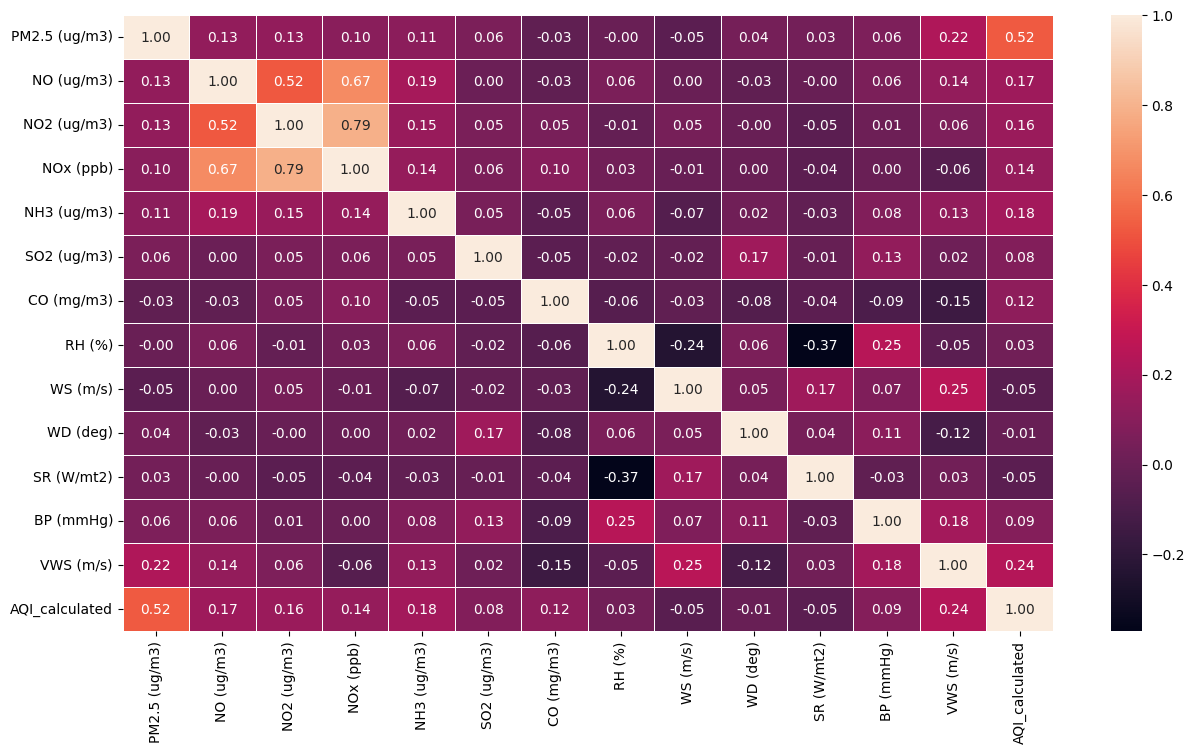

In [ ]:
plt.figure(figsize=(15, 8))
sns.heatmap(m_var.corr(), annot=True, fmt=".2f", linewidths=.5)

# Show the plot
plt.show()

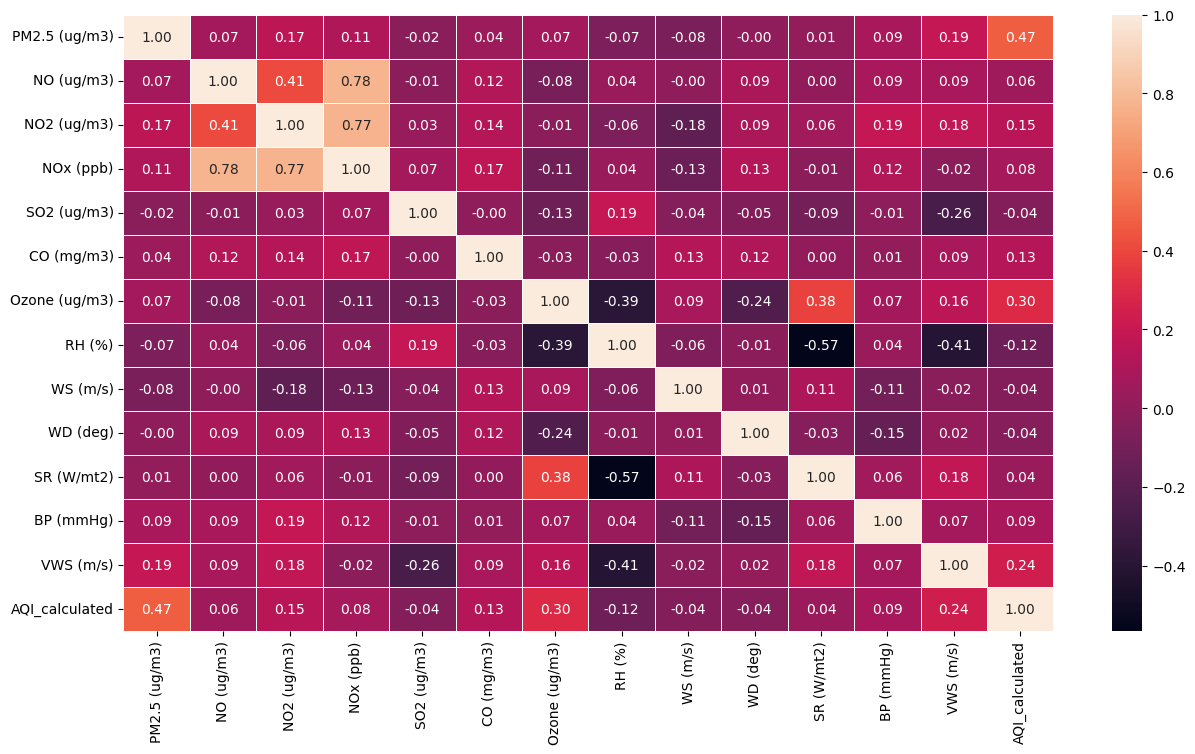

In [ ]:
plt.figure(figsize=(15, 8))
sns.heatmap(v_var.corr(), annot=True, fmt=".2f", linewidths=.5)

# Show the plot
plt.show()

In [ ]:
def print_correlation_above_threshold(df1, df2, target_column, threshold):
    # Extract the subset of the DataFrames
    subset_df1 = df1[[target_column] + list(df1.columns.difference([target_column]))]
    subset_df2 = df2[[target_column] + list(df2.columns.difference([target_column]))]

    # Calculate the correlation matrices
    correlation_matrix1 = subset_df1.corr()
    correlation_matrix2 = subset_df2.corr()

    # Access the correlation coefficients between the target column and other columns
    correlation_values1 = correlation_matrix1.loc[target_column, list(correlation_matrix1.columns != target_column)]
    correlation_values2 = correlation_matrix2.loc[target_column, list(correlation_matrix2.columns != target_column)]

    # Filter based on the threshold value
    correlated_columns1 = correlation_values1[abs(correlation_values1) > threshold].index
    correlated_columns2 = correlation_values2[abs(correlation_values2) > threshold].index

    # Print the results
    print(f"Columns correlated with {target_column} in m_var above the threshold {threshold}:")
    print(correlation_values1[correlated_columns1])

    print(f"\nColumns correlated with {target_column} in v_var above the threshold {threshold}:")
    print(correlation_values2[correlated_columns2])

target_column = 'AQI_calculated'
threshold = 0.15 # Adjust the threshold as needed
print_correlation_above_threshold(m_var, v_var, target_column, threshold)

Columns correlated with AQI_calculated in m_var above the threshold 0.15:
NH3 (ug/m3)      0.182608
NO (ug/m3)       0.166527
NO2 (ug/m3)      0.155087
PM2.5 (ug/m3)    0.524784
VWS (m/s)        0.236966
Name: AQI_calculated, dtype: float64

Columns correlated with AQI_calculated in v_var above the threshold 0.15:
Ozone (ug/m3)    0.295195
PM2.5 (ug/m3)    0.471102
VWS (m/s)        0.236887
Name: AQI_calculated, dtype: float64


The columns mentioned above will be used as features for building the machine learning model

## Time series plots

### Hourly average

#### Single plot all years (Manali and velachery)

This section contains the hourly average ie average AQI for different times of the day for both the dataframes

In [ ]:
def plot_hourly_avg_aqi(df, aqi_column):
    """
    Plot hourly average AQI for each year.

    Parameters:
    - df: DataFrame with datetime index and AQI column
    - aqi_column: Name of the column containing AQI values (default is 'AQI_calculated')
    """
    # Make sure the DataFrame is sorted by the datetime index
    df = df.sort_index()

    # Extract year, month, day, and hour from the datetime index
    df['Year'] = df.index.year
    df['Month'] = df.index.month
    df['Day'] = df.index.day
    df['Hour'] = df.index.hour

    # Group by Year and Hour, calculate the mean AQI
    hourly_avg_aqi = df.groupby(['Year', 'Hour'])[aqi_column].mean().reset_index()

    # Plotting
    fig, ax = plt.subplots(figsize=(12, 6))
    for year, group in hourly_avg_aqi.groupby('Year'):
        ax.plot(group['Hour'], group[aqi_column], marker = "o",  label=str(year))

    ax.set_xlabel('Hour of Day')
    #ax.set_ylabel('Average ' + aqi_column)
    #ax.set_title('Hourly Average ' + aqi_column + ' for Each Year')
    ax.legend(title='Year')

    # Set X-axis ticks to show only hours from 0 to 23
    ax.set_xticks(range(24))
    ax.set_xticklabels([f'{hour:02d}' for hour in range(24)])
    plt.grid(True)
    plt.show()

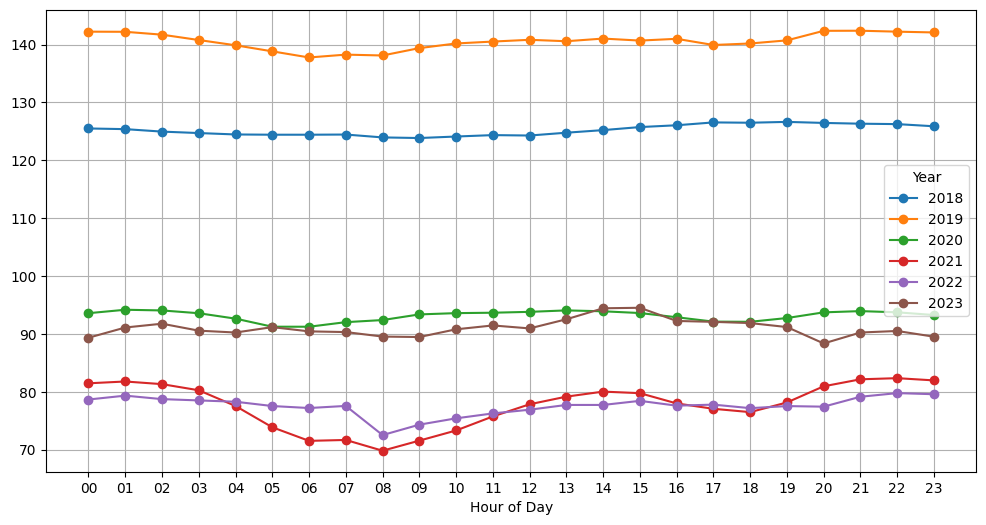

In [ ]:
plot_hourly_avg_aqi(manali_AQI, aqi_column='AQI_calculated')

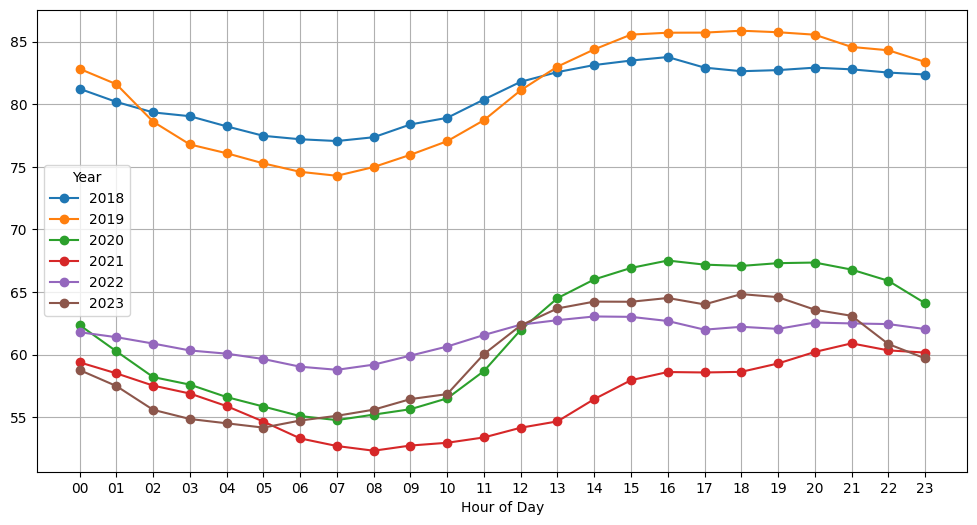

In [ ]:
plot_hourly_avg_aqi(velachery_AQI, aqi_column='AQI_calculated')

#### Separate subplots for each year (Manali and Velachery)

This section contains separate plots for each year. This will help us visualize the data in each year more clearly

In [ ]:
def plot_hourly_avg_aqi_separate_graphs(df, aqi_column='AQI_calculated'):
    """
    Plot hourly average AQI for each year in separate graphs.

    Parameters:
    - df: DataFrame with datetime index and AQI column
    - aqi_column: Name of the column containing AQI values (default is 'AQI_calculated')
    """
    # Make sure the DataFrame is sorted by the datetime index
    df = df.sort_index()

    # Extract year, month, day, and hour from the datetime index
    df['Year'] = df.index.year
    df['Month'] = df.index.month
    df['Day'] = df.index.day
    df['Hour'] = df.index.hour

    # Group by Year and Hour, calculate the mean AQI
    hourly_avg_aqi = df.groupby(['Year', 'Hour'])[aqi_column].mean().reset_index()

    # Plotting in separate graphs for each year
    unique_years = hourly_avg_aqi['Year'].unique()
    num_years = len(unique_years)

    fig, axs = plt.subplots(num_years, 1, figsize=(12, 4 * num_years))
    fig.suptitle('Hourly Average ' + aqi_column + ' for Each Year')

    for i, year in enumerate(unique_years):
        ax = axs[i]
        year_data = hourly_avg_aqi[hourly_avg_aqi['Year'] == year]
        ax.plot(year_data['Hour'], year_data[aqi_column], marker = "o", label=str(year), color = 'b')
        ax.set_ylabel('Average ' + aqi_column)
        ax.legend(title='Year')
        plt.title(f'Hourly Average {aqi_column} - {year}')

        # Set X-axis ticks to show only hours from 0 to 23 for each subplot
        ax.set_xticks(range(24))
        ax.set_xticklabels([f'{hour:02d}' for hour in range(24)])
        ax.set_xlabel('Hour of Day')

    plt.tight_layout()
    plt.show()

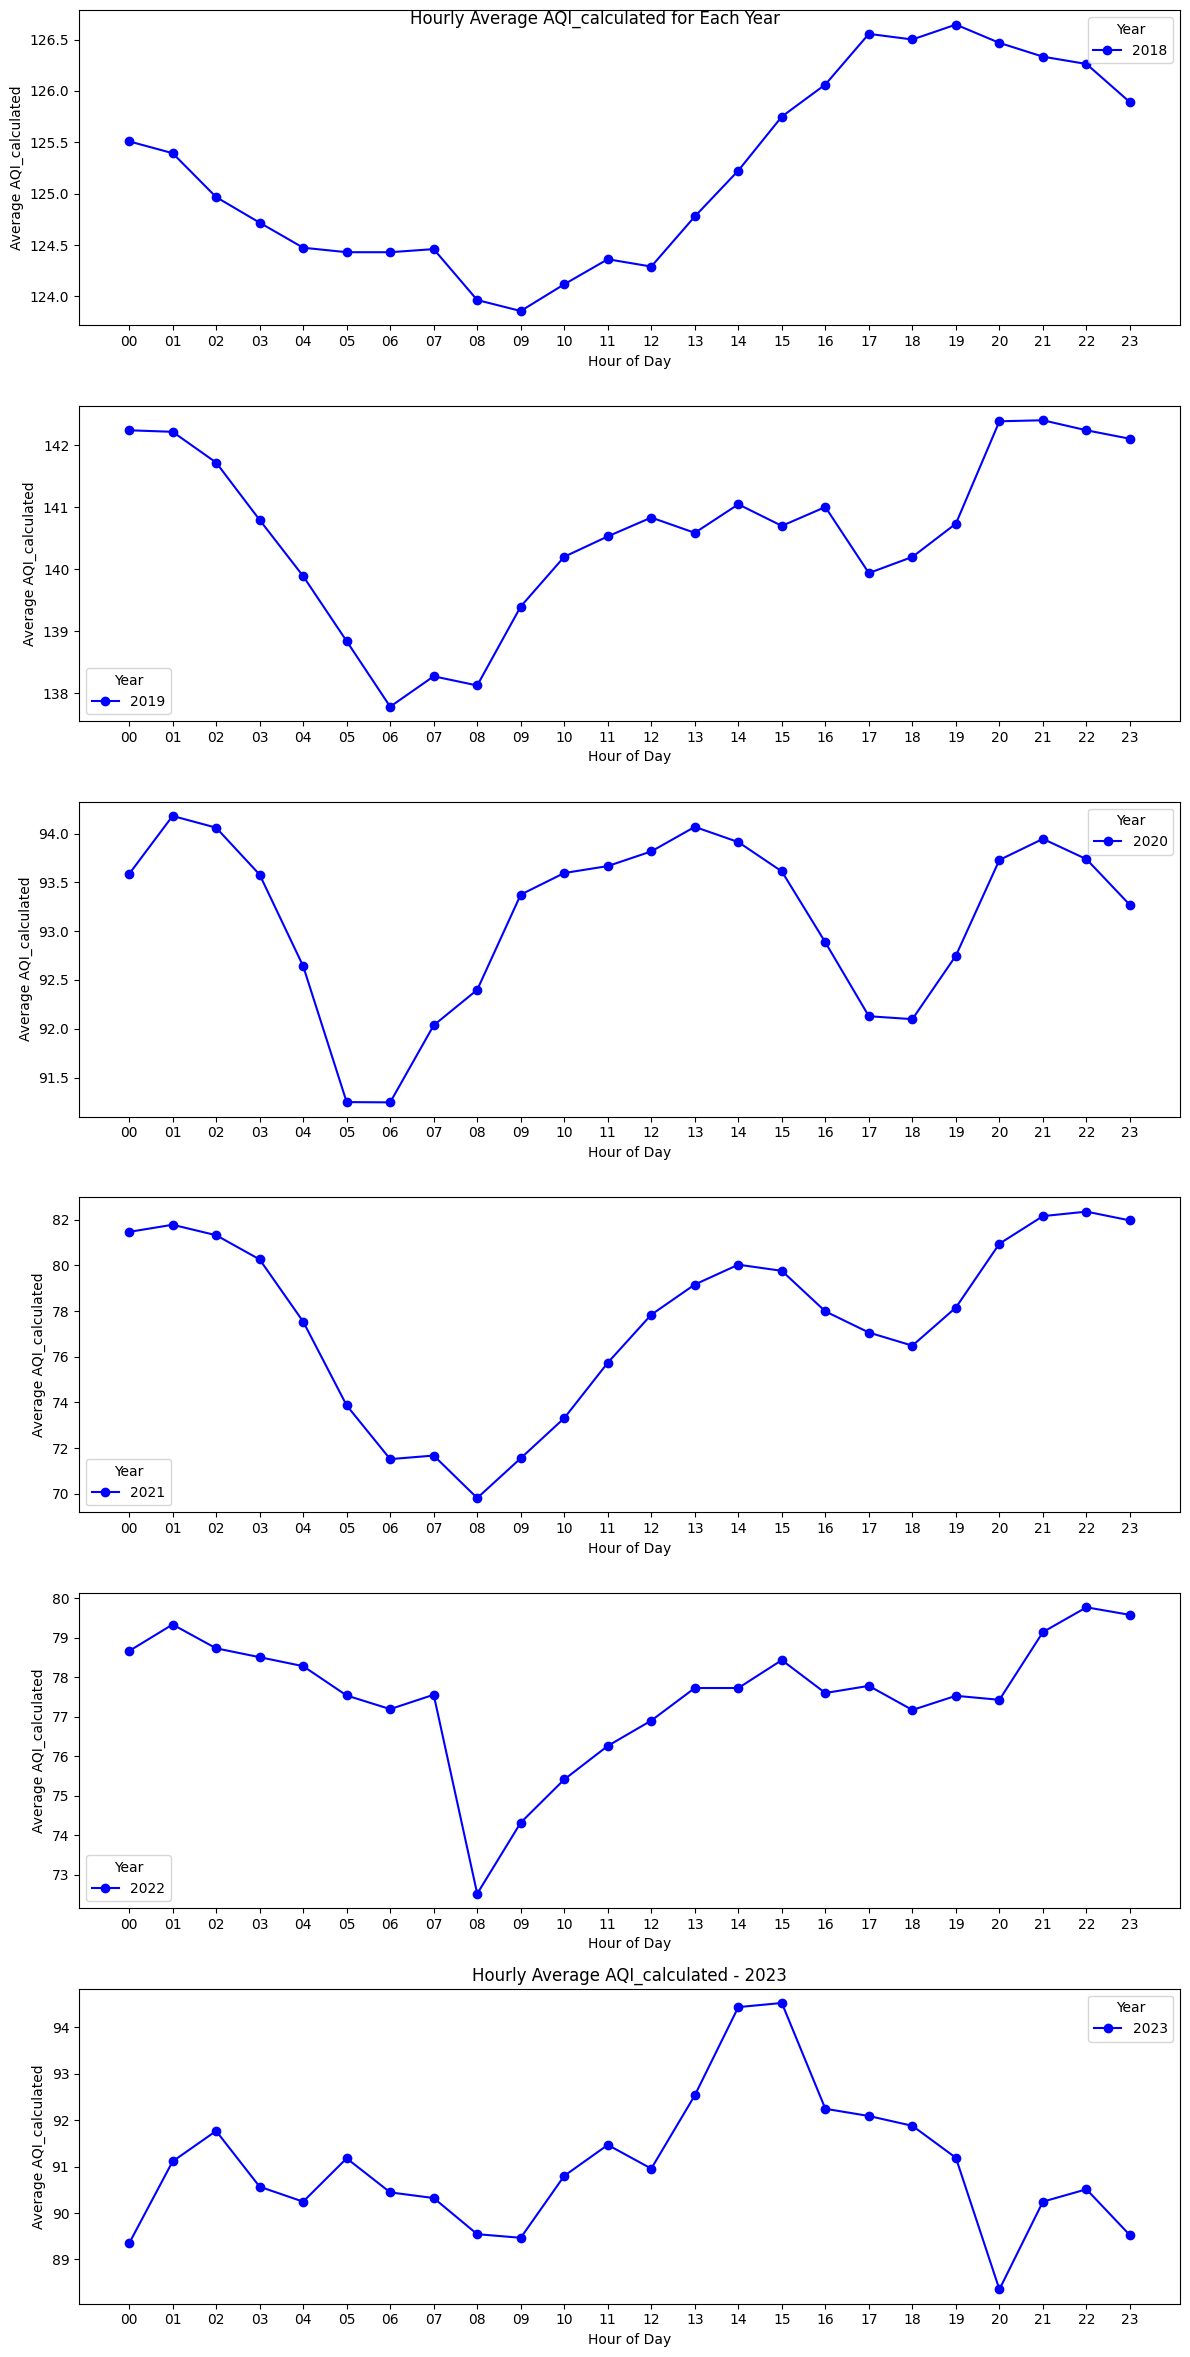

In [ ]:
plot_hourly_avg_aqi_separate_graphs(manali_AQI, aqi_column='AQI_calculated')

The above plots for manali region confirm the following
1. The maximum pollution is said to have happened in the afternoon time that is after 12 noon in the years 2018, 2019, 2023
2. The maximum pollution is said to have happened around midnight time ie. 22:00 hrs to 02:00 hrs Except 2023
So features like morning, noon, evening, night might influence the predictions

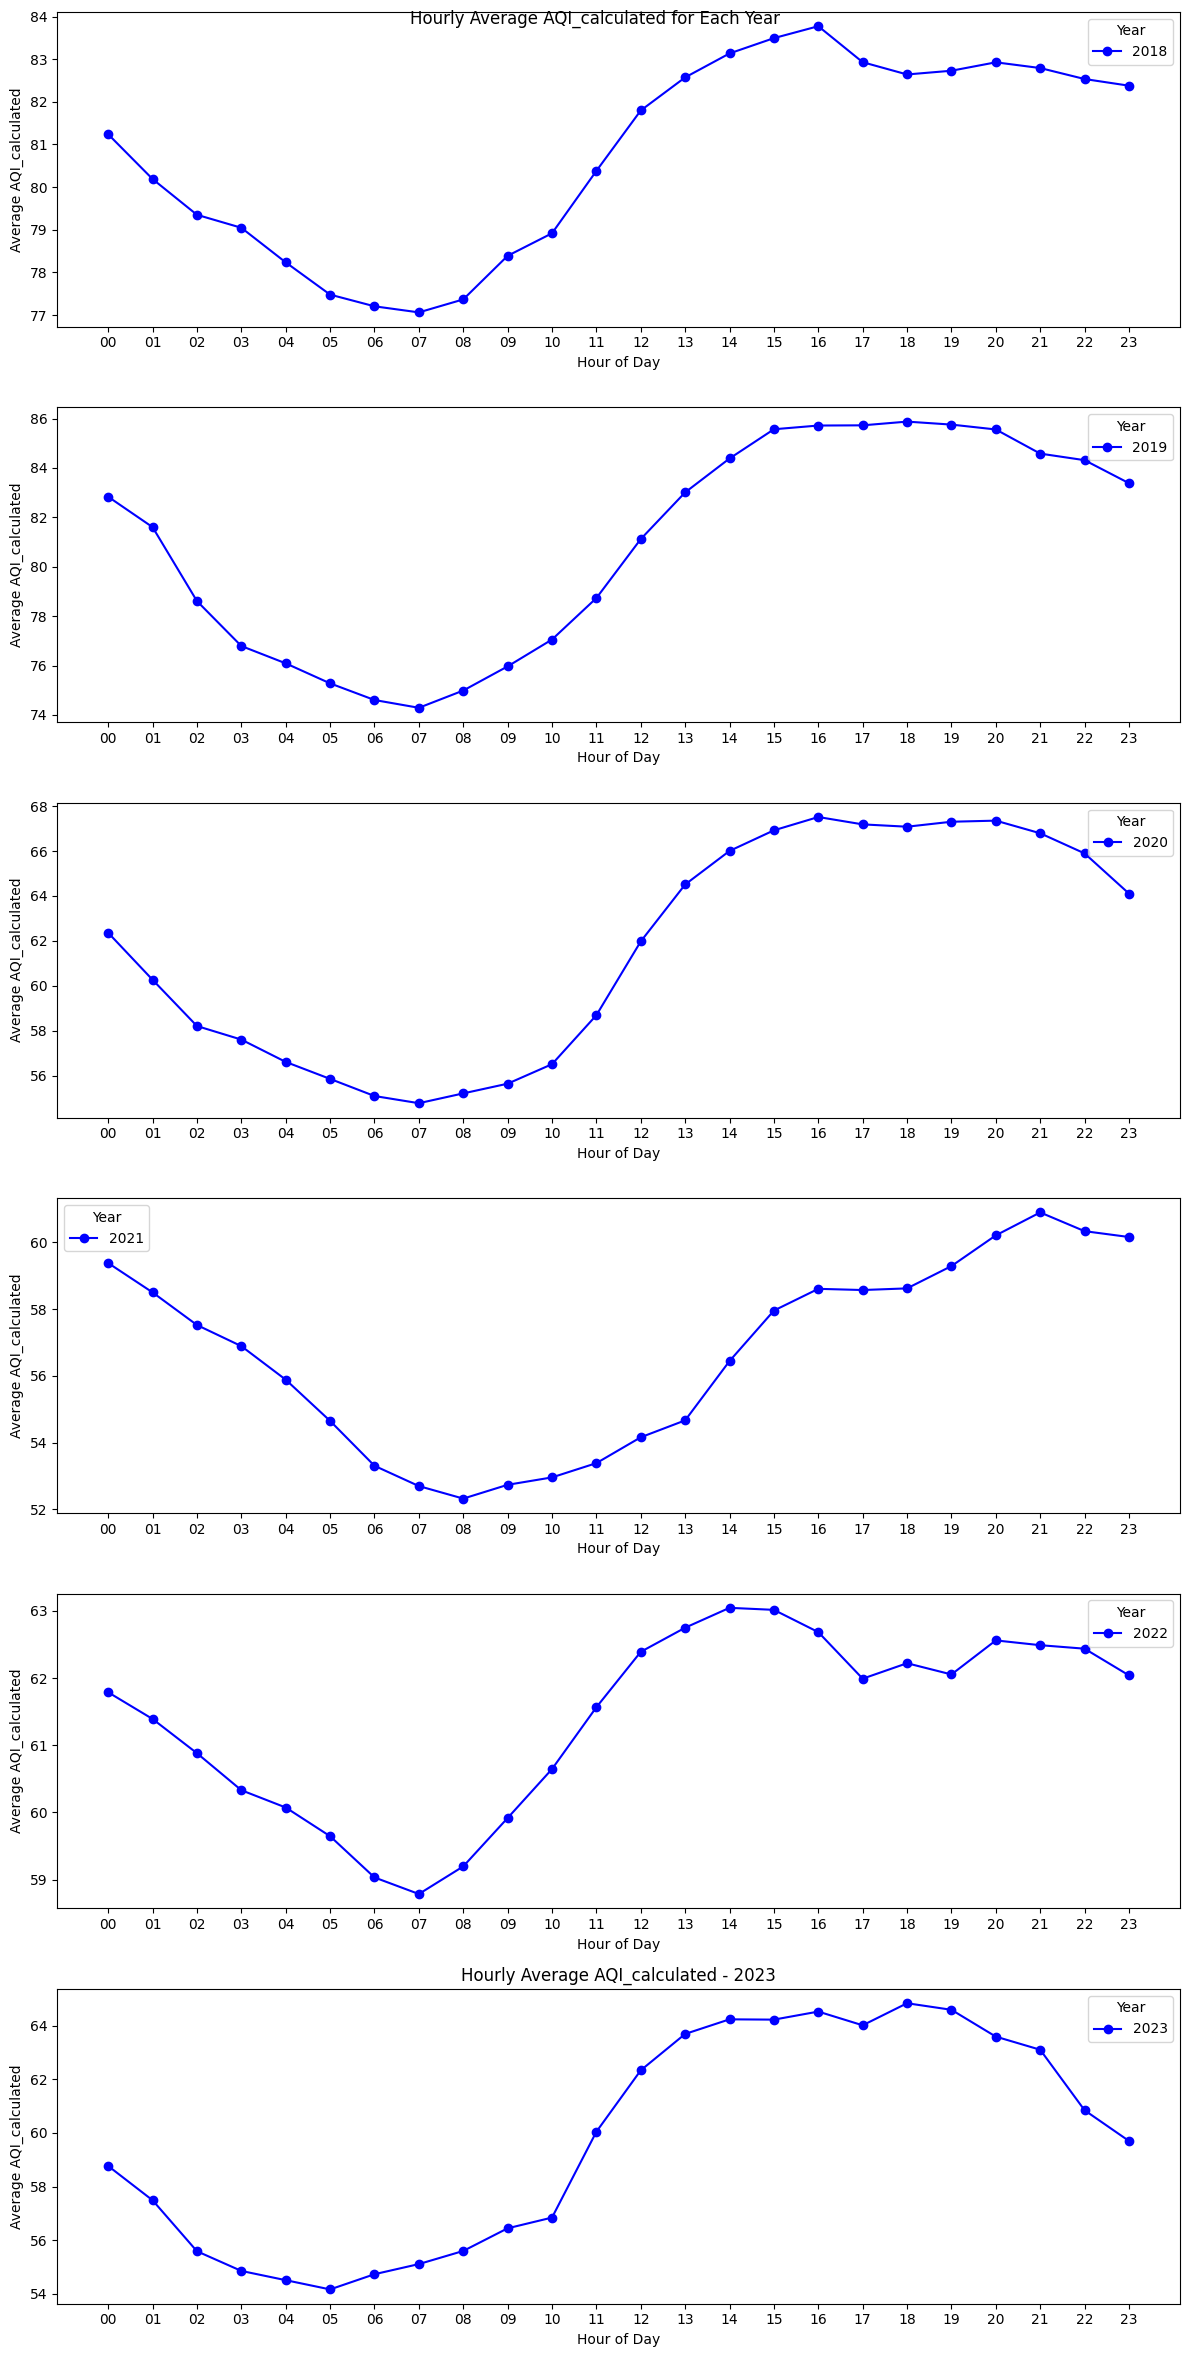

In [ ]:
plot_hourly_avg_aqi_separate_graphs(velachery_AQI, aqi_column='AQI_calculated')

The above plots for velachery region confirm the following
1. The maximum pollution is said to have happened in the afternoon time that is after 12 noon for all the years and the pollution is high mostly in the evening peak hours ie. 17:00 hrs to 22:00 hrs
So features like peak hours, morning, noon, evening, night might influence the predictions

### Monthly average

#### Single plot all year (Manali and Velachery)

This section contains the Monthly average for each year for both the dataframes

In [ ]:
def plot_monthly_avg_aqi(df, aqi_column='AQI_calculated'):
    """
    Plot monthly average AQI for each year in one graph.

    Parameters:
    - df: DataFrame with datetime index and AQI column
    - aqi_column: Name of the column containing AQI values (default is 'AQI_calculated')
    """
    # Make sure the DataFrame is sorted by the datetime index
    df = df.sort_index()

    # Extract year, month, and hour from the datetime index
    df['Year'] = df.index.year
    df['Month'] = df.index.month
    df['Hour'] = df.index.hour

    # Group by Year and Month, calculate the mean AQI
    monthly_avg_aqi = df.groupby(['Year', 'Month'])[aqi_column].mean().reset_index()

    # Mapping month numbers to three-letter abbreviations
    month_abbreviations = {1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun',
                           7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'}

    # Plotting
    fig, ax = plt.subplots(figsize=(12, 6))
    #fig.suptitle('Monthly Average ' + aqi_column + ' for Each Year')

    for year, group in monthly_avg_aqi.groupby('Year'):
        # Replace month numbers with abbreviations
        month_labels = [month_abbreviations[month] for month in group['Month']]
        ax.plot(month_labels, group[aqi_column], marker = "o", label=str(year))

    #ax.set_xlabel('Month')
    ax.set_ylabel('Average AQI')
    ax.legend(title='Year')
    plt.grid(True)
    plt.show()

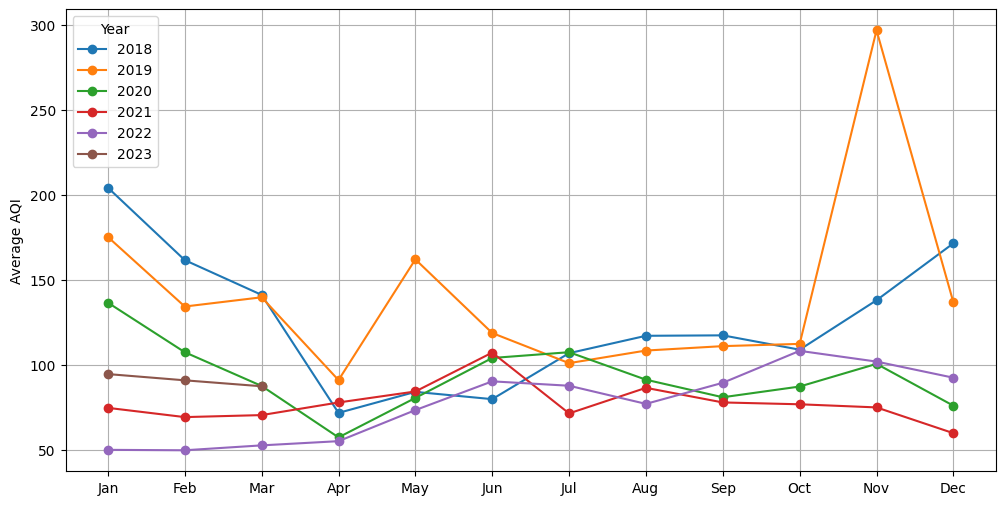

In [ ]:
plot_monthly_avg_aqi(manali_AQI, aqi_column='AQI_calculated')

The AQI in Manali Area seems to be more in months like Oct, Nov, Dec, So month based features will influence the prediction

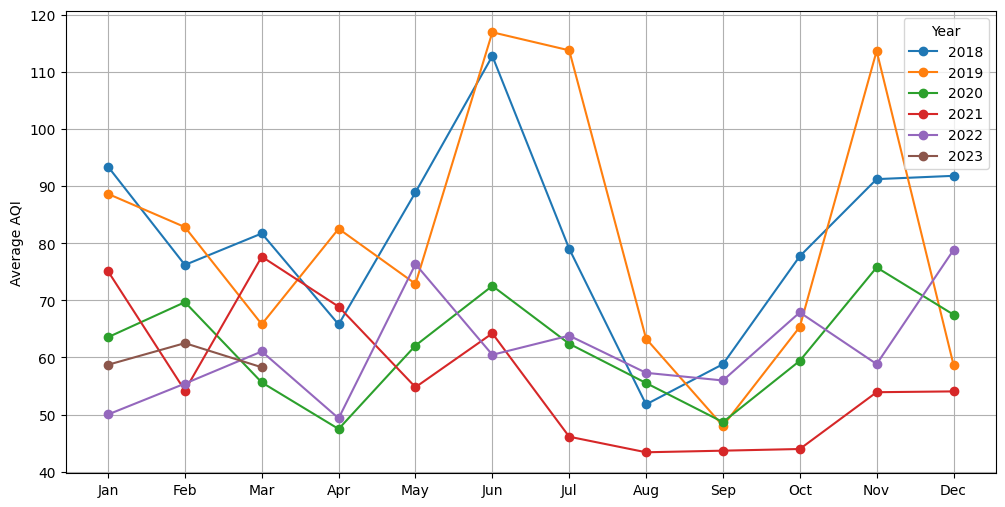

In [ ]:
plot_monthly_avg_aqi(velachery_AQI, aqi_column='AQI_calculated')

The AQI in velachery Area seems to be more in months like Apr - Jun and also Oct, Nov, Dec, So month based features will influence the prediction

#### Separate subplots for each year (Manali and Velachery)

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

def plot_monthly_avg_aqi_subplots(df, aqi_column='AQI_calculated'):
    """
    Plot monthly average AQI for each year in separate graphs.

    Parameters:
    - df: DataFrame with datetime index and AQI column
    - aqi_column: Name of the column containing AQI values (default is 'AQI_calculated')
    """
    # Make sure the DataFrame is sorted by the datetime index
    df = df.sort_index()

    # Extract year, month, and hour from the datetime index
    df['Year'] = df.index.year
    df['Month'] = df.index.month
    df['Hour'] = df.index.hour

    # Group by Year and Month, calculate the mean AQI
    monthly_avg_aqi = df.groupby(['Year', 'Month'])[aqi_column].mean().reset_index()

    # Mapping month numbers to three-letter abbreviations
    month_abbreviations = {1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun',
                           7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'}

    # Create separate subplots for each year
    unique_years = monthly_avg_aqi['Year'].unique()

    for year in unique_years:
        year_data = monthly_avg_aqi[monthly_avg_aqi['Year'] == year]
        plt.figure(figsize=(12, 4))

        # Convert month values to integers
        month_values = year_data['Month'].map(month_abbreviations).map({v: k for k, v in month_abbreviations.items()})

        plt.plot(month_values - 1, year_data[aqi_column], marker='o', linestyle='-', color = 'b')
        plt.title(f'Monthly Average {aqi_column} - {year}')
        plt.xlabel('Month')
        plt.ylabel(f'Average {aqi_column}')
        plt.xticks(range(12), [month_abbreviations[month] for month in range(1, 13)])
        plt.show()



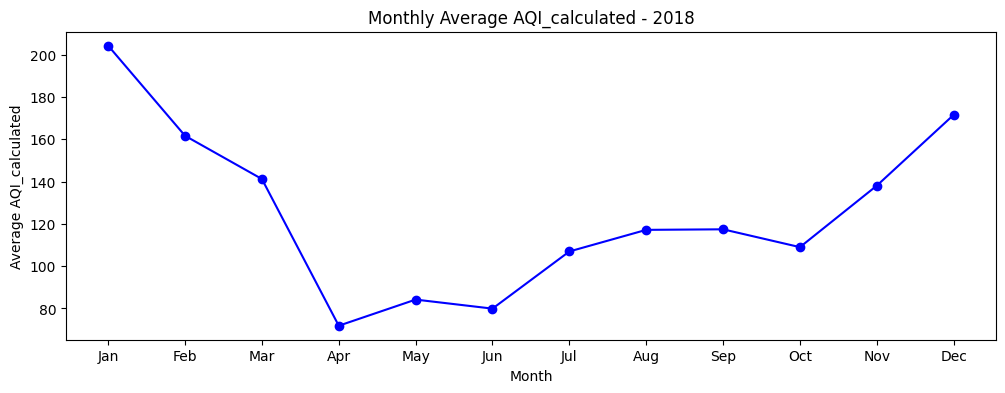

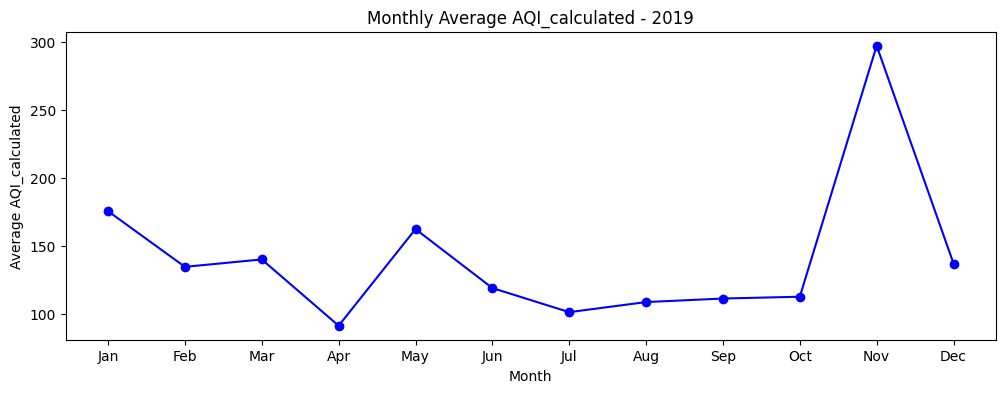

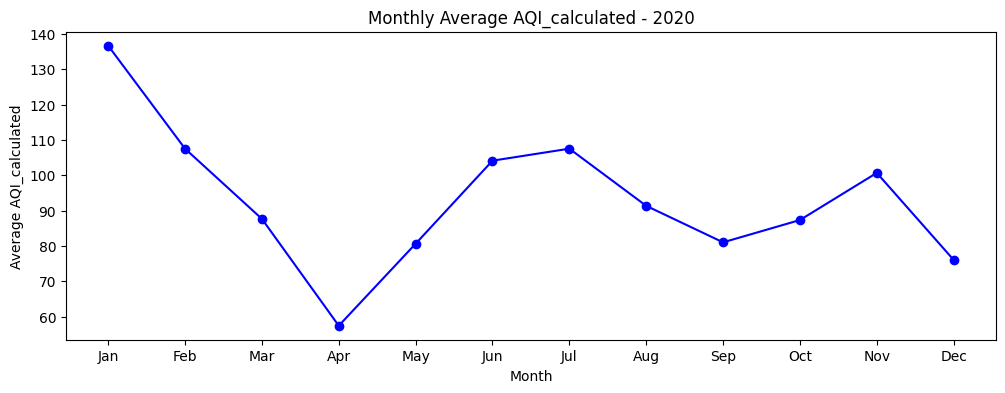

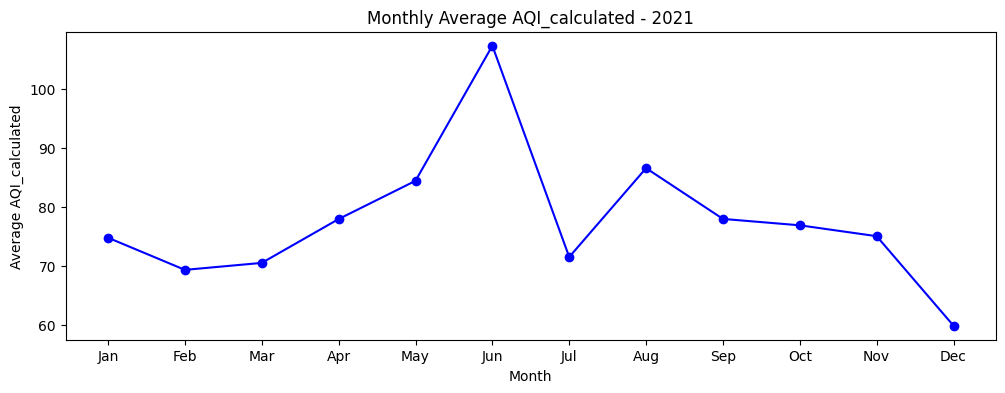

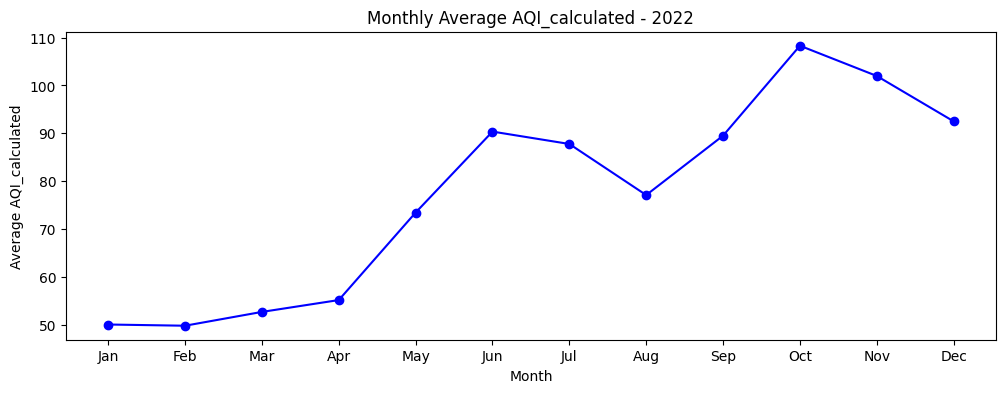

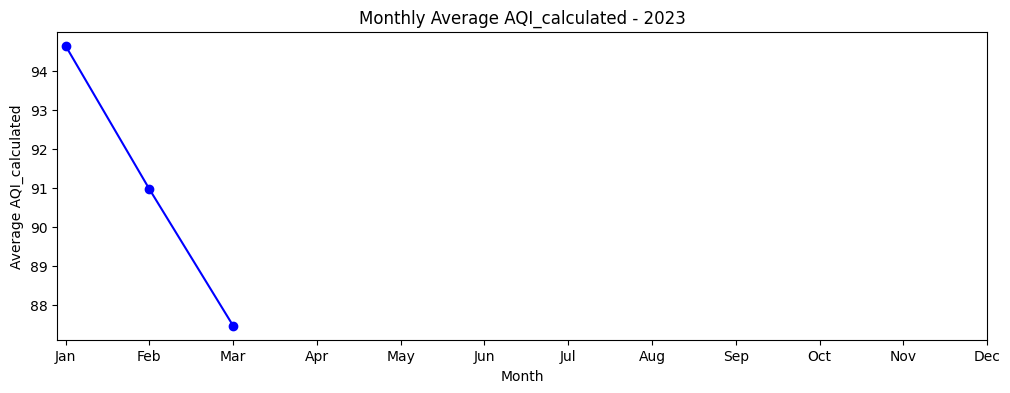

In [ ]:
plot_monthly_avg_aqi_subplots(manali_AQI, aqi_column='AQI_calculated')

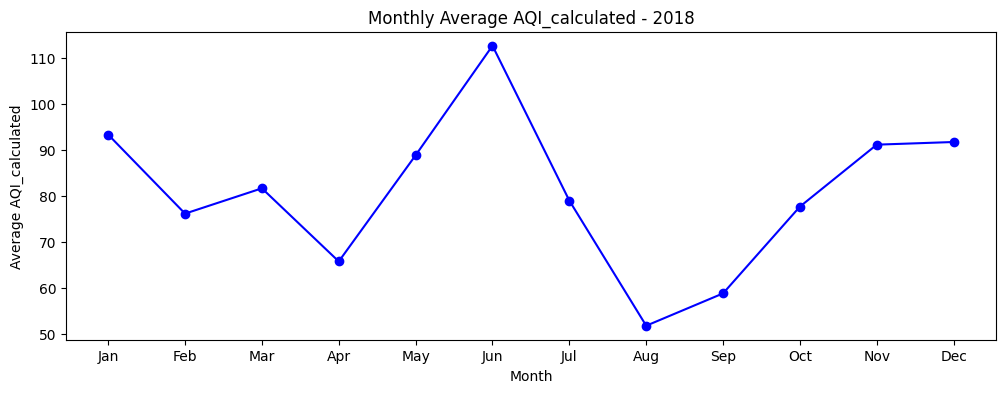

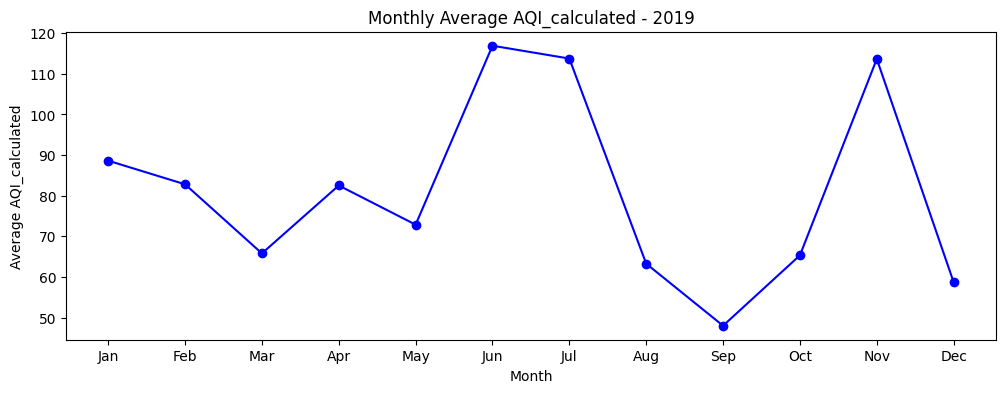

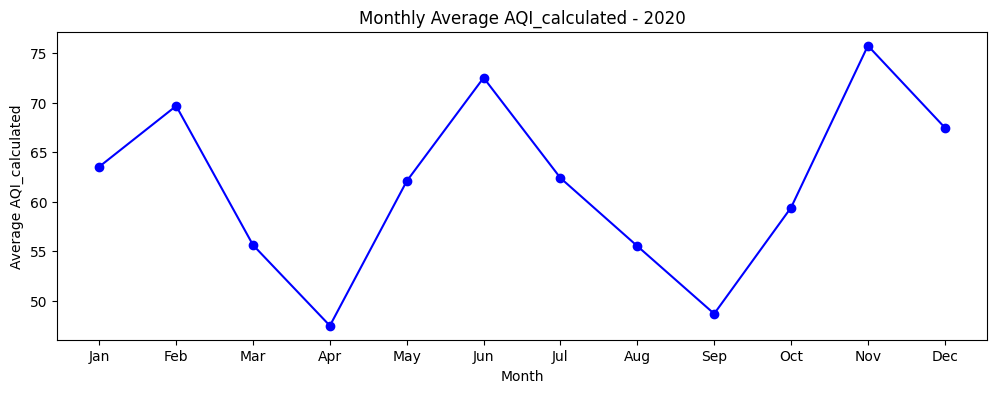

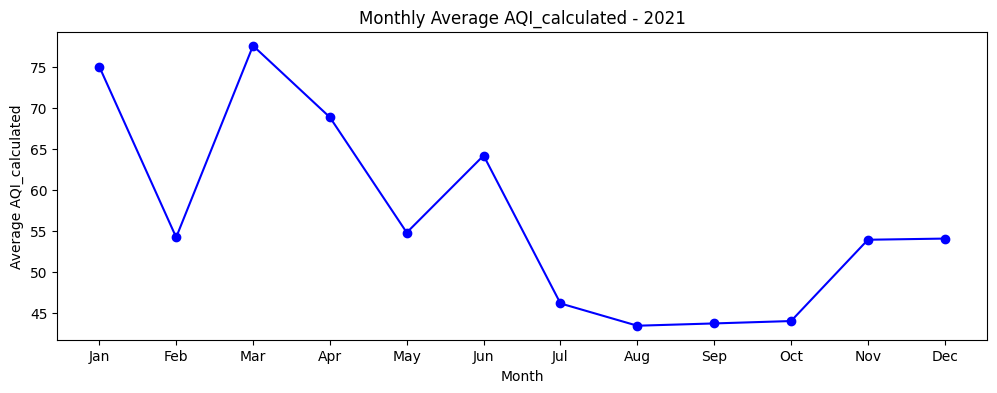

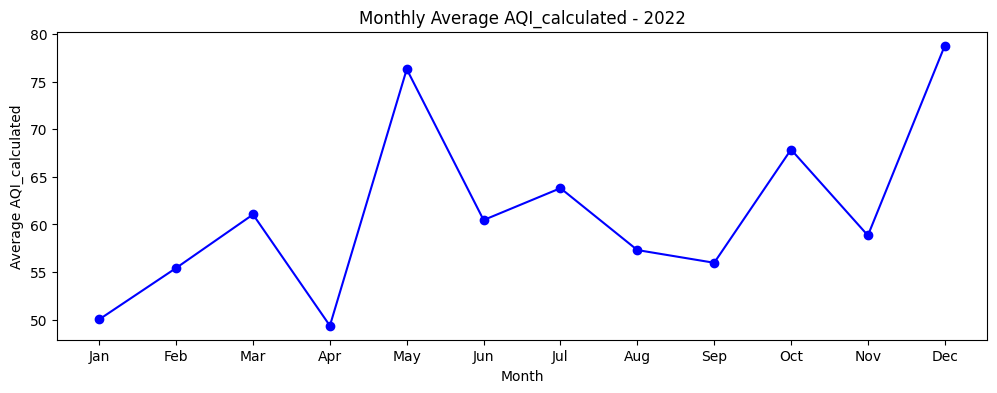

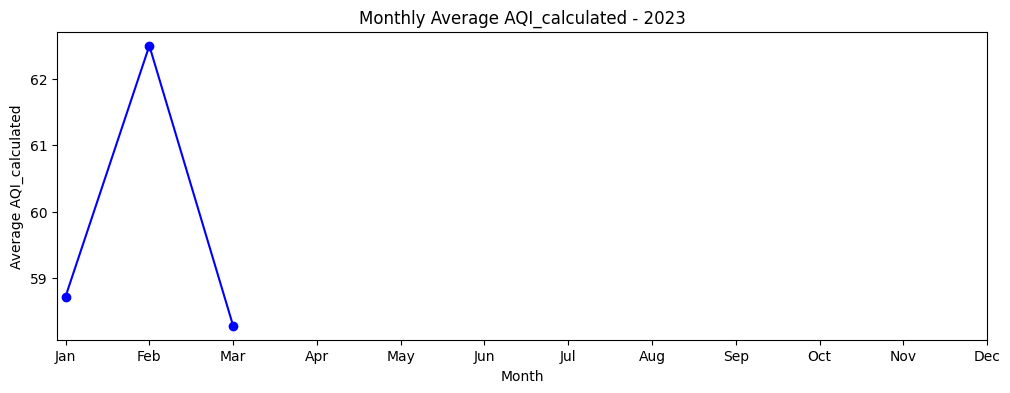

In [ ]:
plot_monthly_avg_aqi_subplots(velachery_AQI, aqi_column='AQI_calculated')

### Days of the week average

This section contains the average for each day of the week each year for both the dataframes

#### Single Plot all year (Manali and Velachery)

In [ ]:
def plot_mean_aqi_by_day_of_week(df, aqi_column='AQI_calculated'):
    """
    Calculate mean AQI based on days of the week for each year and plot as a line graph.

    Parameters:
    - df: DataFrame with datetime index and AQI column
    - aqi_column: Name of the column containing AQI values (default is 'AQI_calculated')
    """
    # Extract year and day of the week from the datetime index
    df['Year'] = df.index.year
    df['DayOfWeek'] = df.index.dayofweek

    # Calculate mean AQI based on days of the week for each year
    mean_aqi_by_day_of_week = df.groupby(['Year', 'DayOfWeek'])[aqi_column].mean().unstack()

    day_names = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
    mean_aqi_by_day_of_week.columns = day_names

    # Plotting
    plt.figure(figsize=(12, 6))
    for year in mean_aqi_by_day_of_week.index:
        plt.plot(mean_aqi_by_day_of_week.columns, mean_aqi_by_day_of_week.loc[year], label=str(year), marker='o')

    #plt.title(f'Mean {aqi_column} by Day of Week for Each Year')
    #plt.xlabel('Day of Week')
    plt.ylabel(f'Mean {aqi_column}')
    plt.legend(title='Year')
    plt.grid(True)
    plt.show()




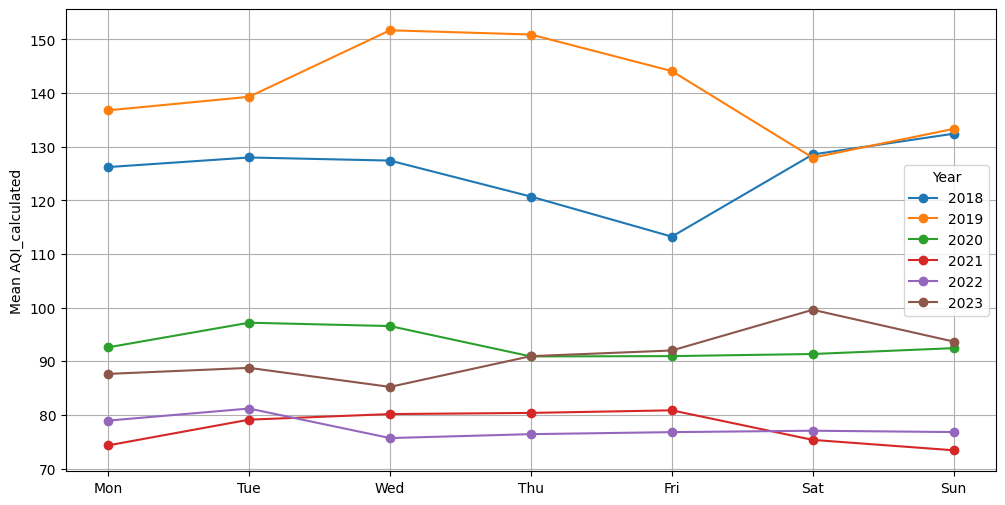

In [ ]:
plot_mean_aqi_by_day_of_week(manali_AQI, aqi_column='AQI_calculated')

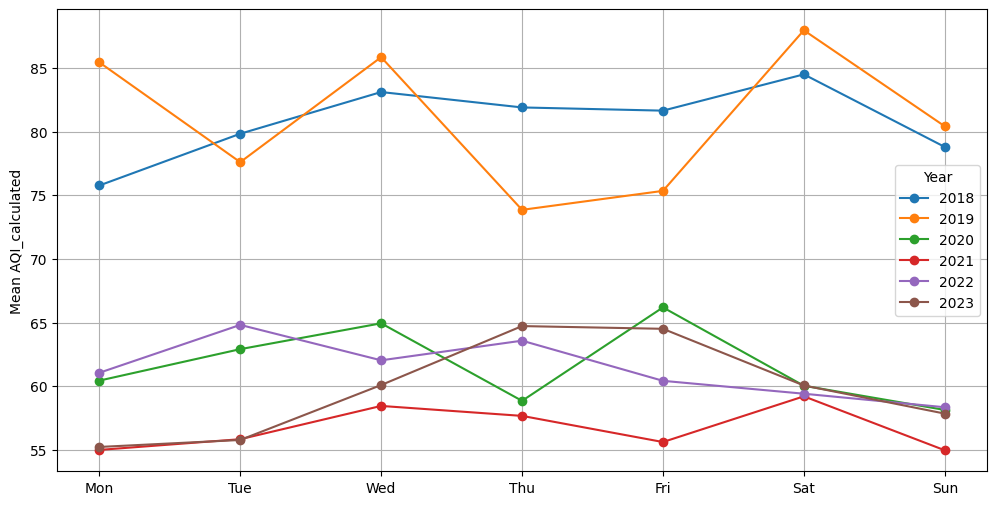

In [ ]:
plot_mean_aqi_by_day_of_week(velachery_AQI, aqi_column='AQI_calculated')

#### Separate plots for each year (Manali and Velachery)

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

def plot_mean_aqi_by_day_of_week(df, aqi_column='AQI_calculated'):
    """
    Calculate mean AQI based on days of the week for each year and plot as a line graph.

    Parameters:
    - df: DataFrame with datetime index and AQI column
    - aqi_column: Name of the column containing AQI values (default is 'AQI_calculated')
    """
    # Extract year and day of the week from the datetime index
    df['Year'] = df.index.year
    df['DayOfWeek'] = df.index.dayofweek

    # Calculate mean AQI based on days of the week for each year
    mean_aqi_by_day_of_week = df.groupby(['Year', 'DayOfWeek'])[aqi_column].mean().unstack()

    # Map day of the week numbers to day names
    day_names = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
    mean_aqi_by_day_of_week.columns = day_names

    # Plotting
    unique_years = df['Year'].unique()
    for year in unique_years:
        plt.figure(figsize=(12, 6))
        data = mean_aqi_by_day_of_week.loc[year]
        plt.plot(data.index, data.values, marker='o', color = 'b')
        plt.title(f'Mean {aqi_column} by Day of Week - {year}')
        plt.xlabel('Day of Week')
        plt.ylabel(f'Mean {aqi_column}')
        plt.grid(True)
        plt.show()

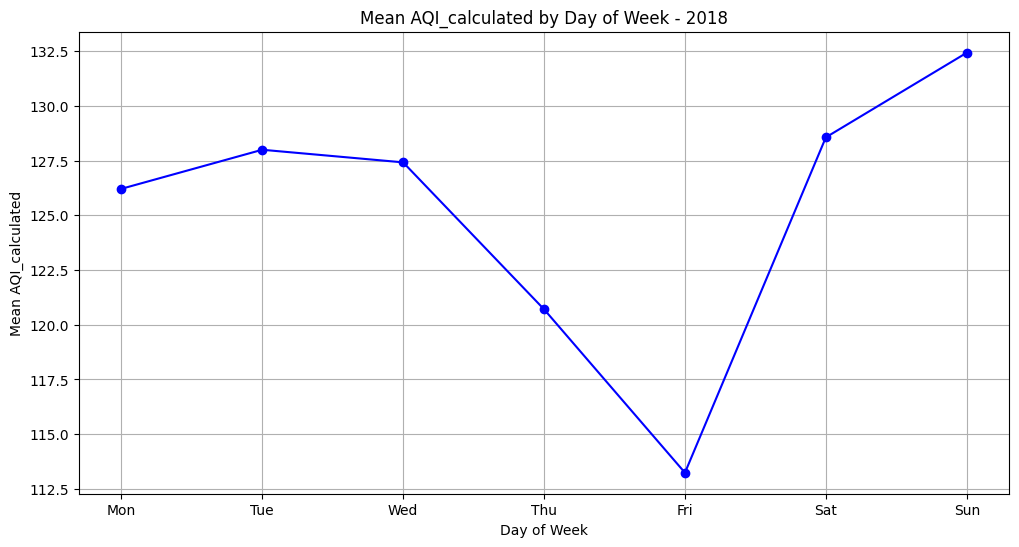

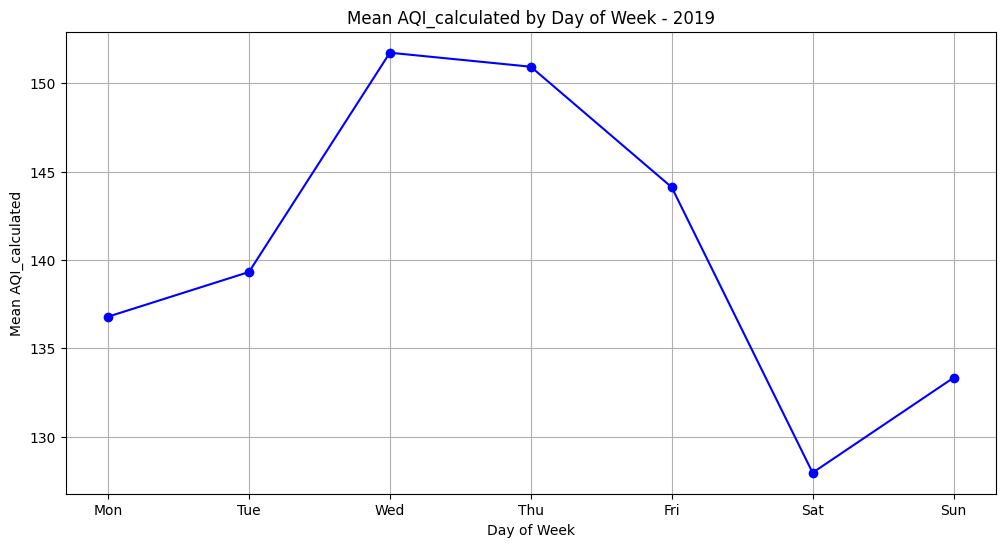

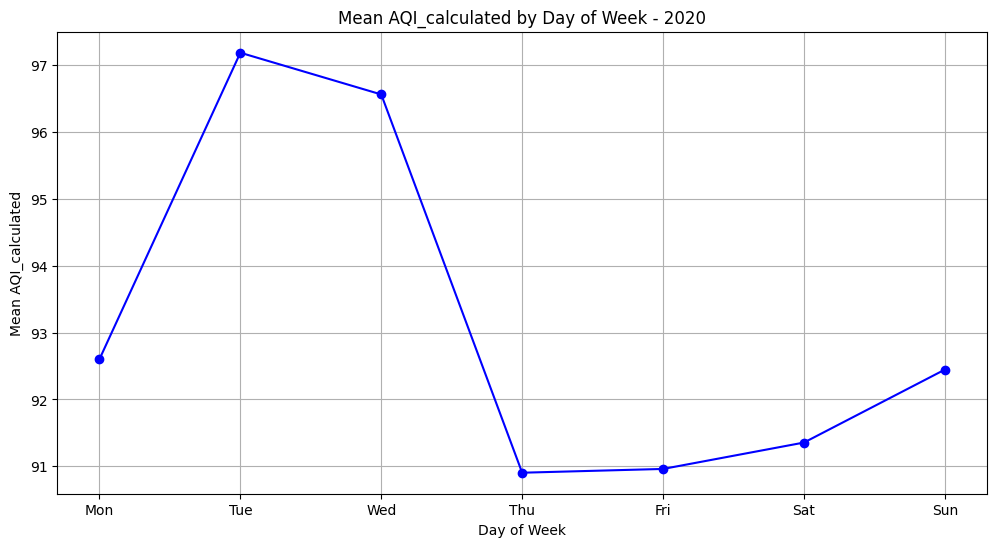

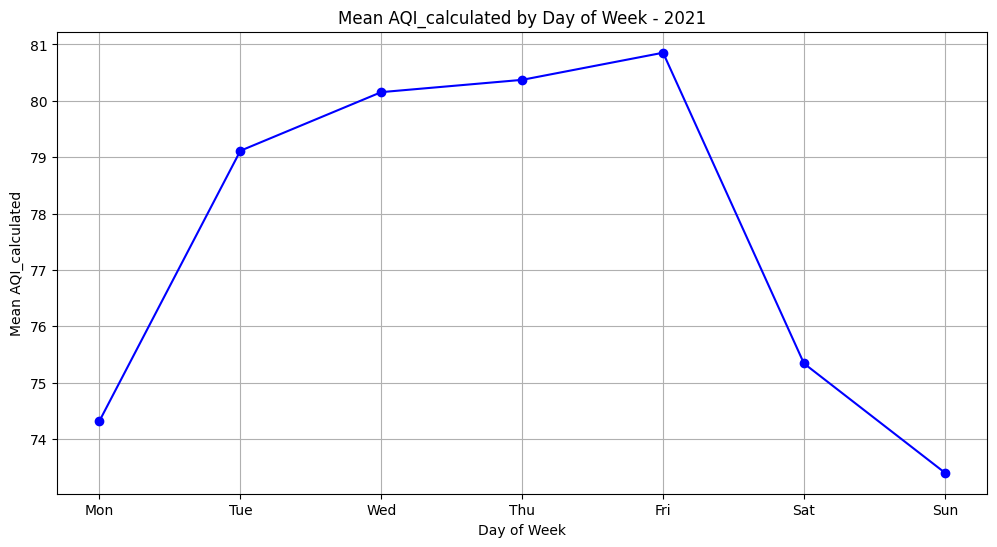

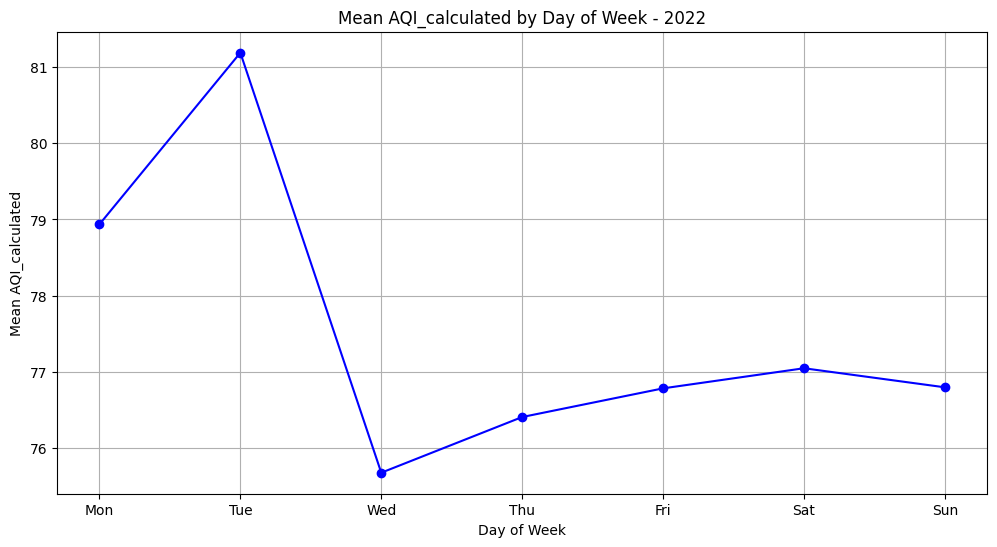

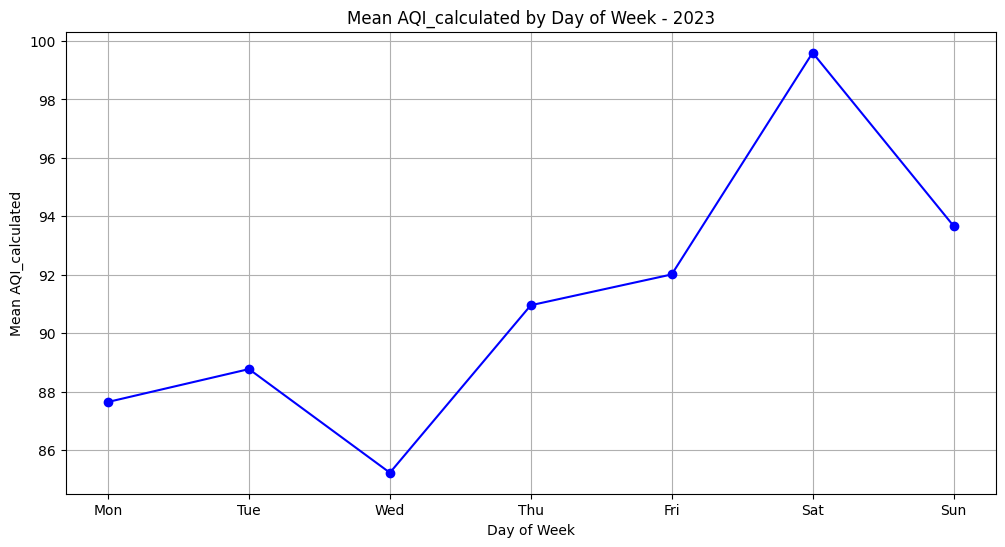

In [ ]:
plot_mean_aqi_by_day_of_week(manali_AQI, aqi_column='AQI_calculated')

Except 2018 the AQI (Manali) in weekdays seem to be higher

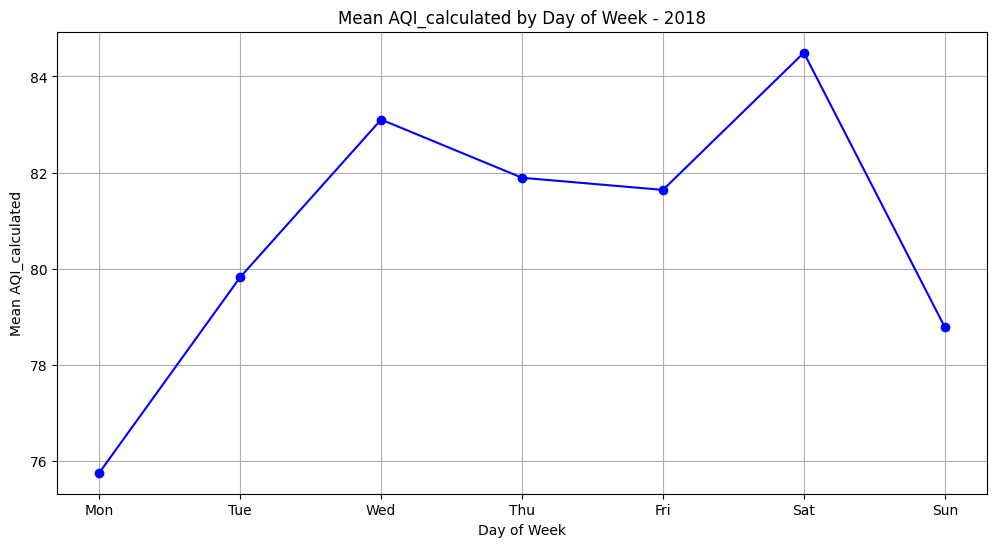

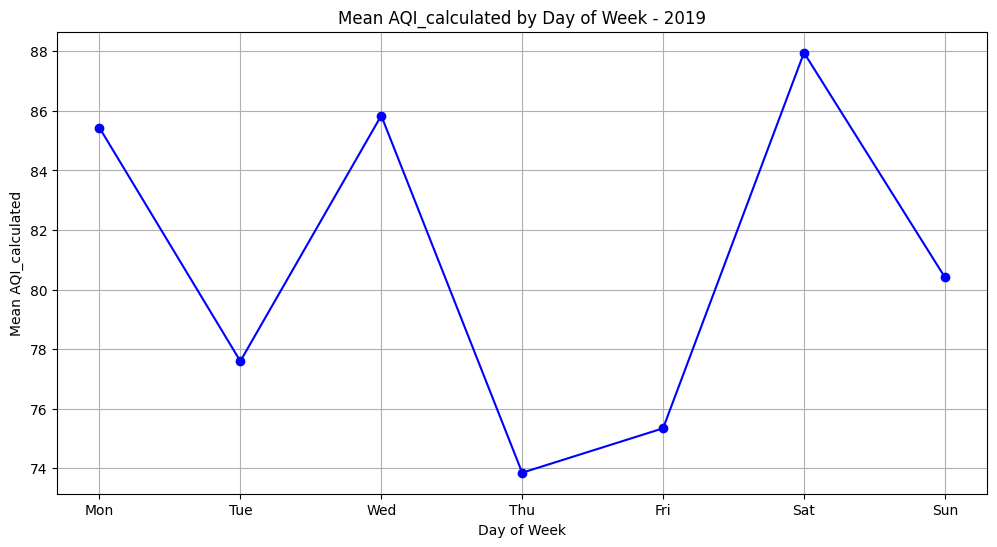

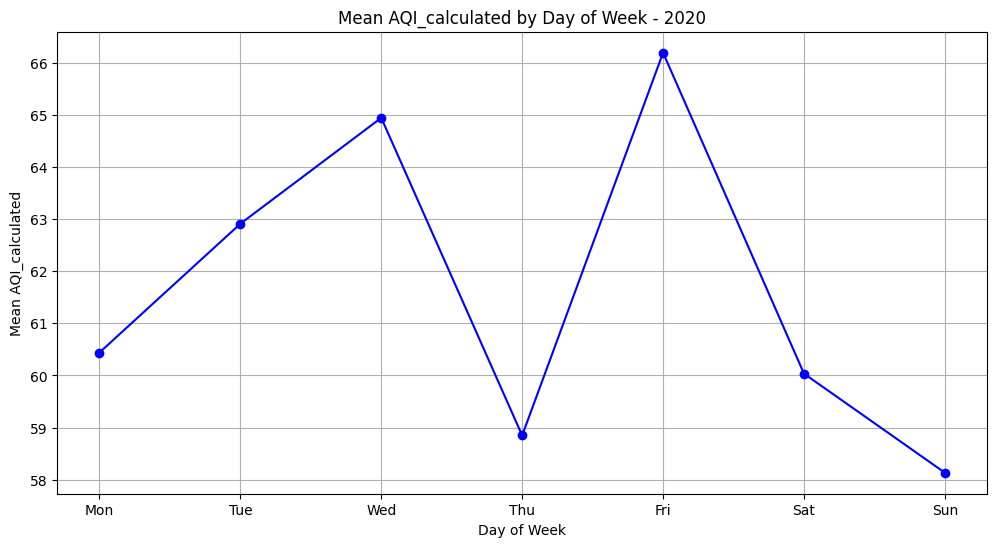

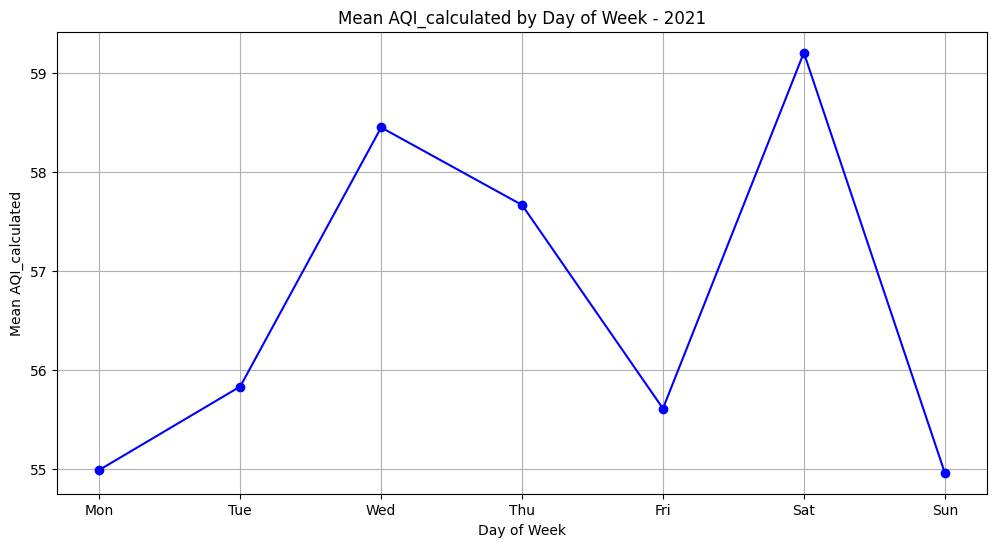

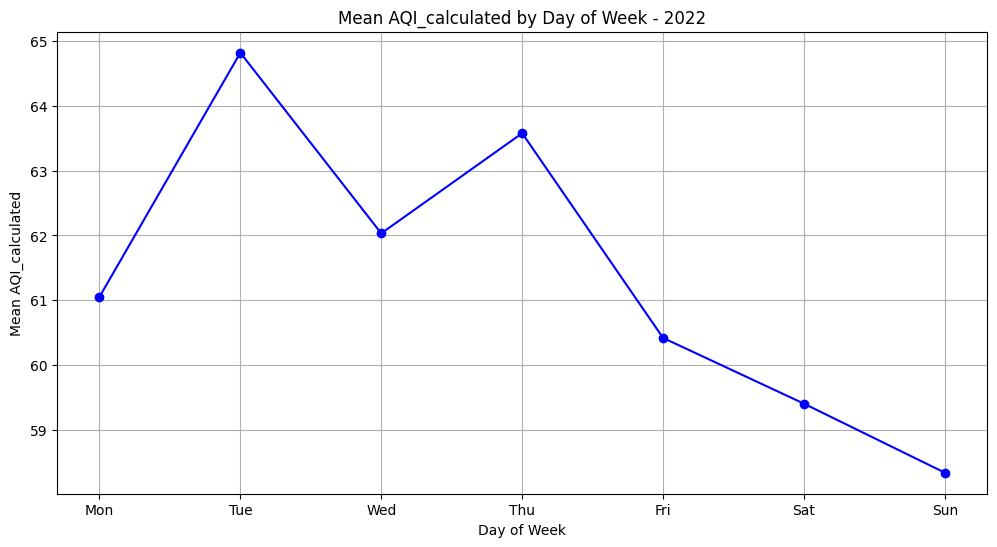

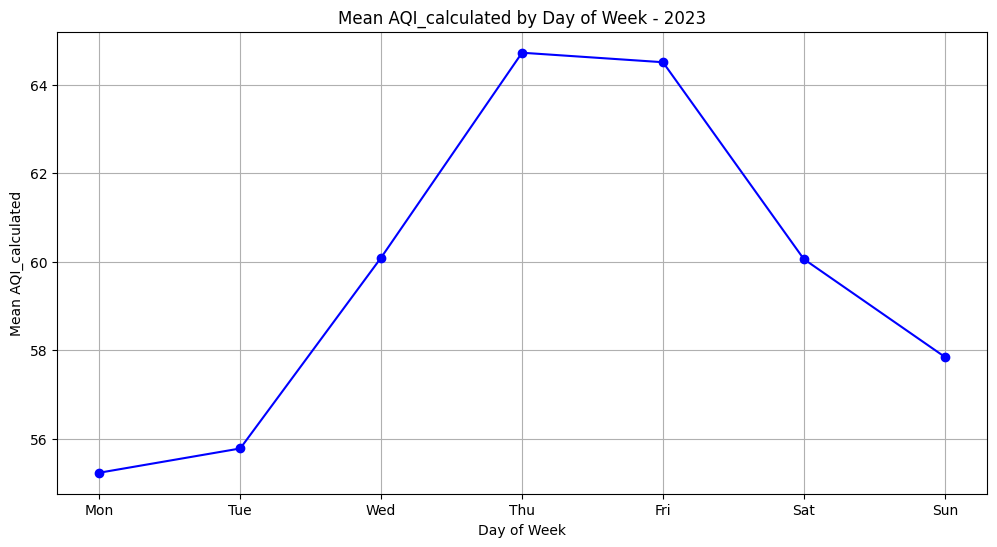

In [ ]:
plot_mean_aqi_by_day_of_week(velachery_AQI, aqi_column='AQI_calculated')

The AQI pattern of velachery seems to be irregular and so the day of the week will not influence the AQI prediction much.

### Yearly average

In [ ]:
def plot_mean_aqi_by_year(df, aqi_column='AQI_calculated'):
    """
    Calculate mean AQI based on years and plot as a line graph.

    Parameters:
    - df: DataFrame with datetime index and AQI column
    - aqi_column: Name of the column containing AQI values (default is 'AQI_calculated')
    """
    # Extract year from the datetime index
    df['Year'] = df.index.year

    # Calculate mean AQI based on years
    mean_aqi_by_year = df.groupby('Year')[aqi_column].mean()

    # Plotting
    plt.figure(figsize=(12, 6))
    plt.plot(mean_aqi_by_year.index, mean_aqi_by_year, marker='o', linestyle='-', color='b')
    #plt.title(f'Mean {aqi_column} by Year')
    #plt.xlabel('Year')
    plt.ylabel(f'Mean {aqi_column}')
    plt.grid(True)
    plt.show()

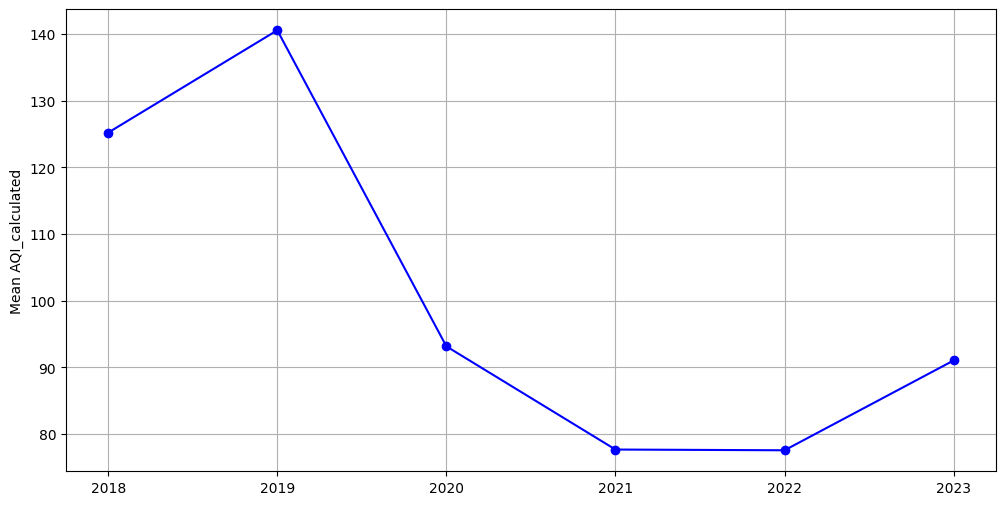

In [ ]:
plot_mean_aqi_by_year(manali_AQI, aqi_column='AQI_calculated')

There is a drasitc drop in the AQI from the year 2020, This might be due the covid pandemic

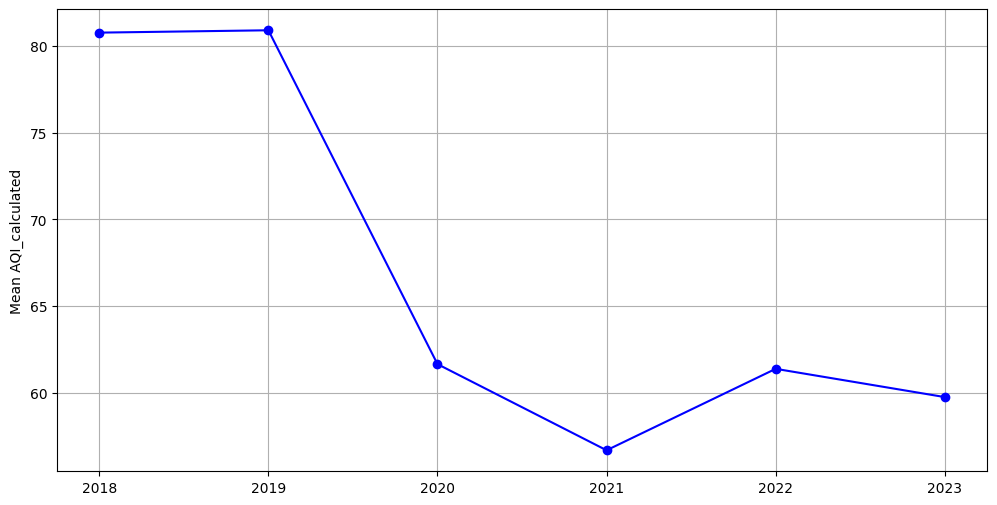

In [ ]:
plot_mean_aqi_by_year(velachery_AQI, aqi_column='AQI_calculated')

There is a drasitc drop in the AQI from the year 2020, This might be due the covid pandemic

### Average based on business and non business day

In [ ]:
def plot_mean_aqi_by_business_day_yearly_bar(df, aqi_column='AQI_calculated'):
    """
    Calculate mean AQI based on business days and non-business days for each year,
    and plot as a bar graph.

    Parameters:
    - df: DataFrame with datetime index and AQI column
    - aqi_column: Name of the column containing AQI values (default is 'AQI_calculated')
    """
    # Extract year, day of the week, and is business day information
    df['Year'] = df.index.year
    df['DayOfWeek'] = df.index.dayofweek
    df['IsBusinessDay'] = df['DayOfWeek'].isin([0, 1, 2, 3, 4])  # Monday to Friday

    # Calculate mean AQI based on business days and non-business days for each year
    mean_aqi_by_day_type_yearly = df.groupby(['Year', 'IsBusinessDay'])[aqi_column].mean().unstack()

    # Plotting as a bar graph
    plt.figure(figsize=(18, 10))
    mean_aqi_by_day_type_yearly.plot(kind='bar', width=0.8)

    plt.xlabel('')
    plt.ylabel(f'Mean {aqi_column}')
    plt.legend(['Non-Business Day', 'Business Day'], loc='upper right')
    plt.grid(axis='y')
    plt.show()



<Figure size 1800x1000 with 0 Axes>

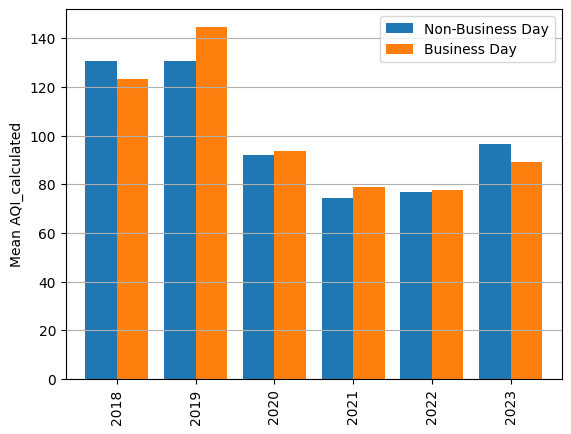

In [ ]:
plot_mean_aqi_by_business_day_yearly_bar(manali_AQI, aqi_column='AQI_calculated')

<Figure size 1800x1000 with 0 Axes>

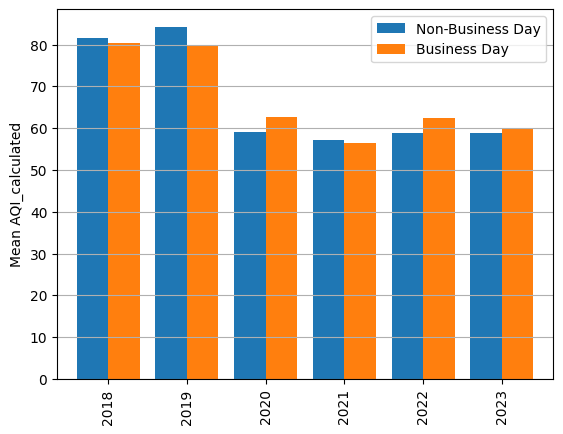

In [ ]:
plot_mean_aqi_by_business_day_yearly_bar(velachery_AQI, aqi_column='AQI_calculated')

In [ ]:
def save_dataframes_to_csv(df1, df2, file1, file2):

    try:
        df1.to_csv(file1, index=True)
        print(f"DataFrame 1 has been saved to {file1}")
    except Exception as e:
        print(f"Error saving DataFrame 1: {e}")

    try:
        df2.to_csv(file2, index=True)
        print(f"DataFrame 2 has been saved to {file2}")
    except Exception as e:
        print(f"Error saving DataFrame 2: {e}")


save_dataframes_to_csv(manali_AQI, velachery_AQI, 'manali_AQI_Pre.csv', 'velachery_AQI_Pre.csv')


DataFrame 1 has been saved to manali_AQI_Pre.csv
DataFrame 2 has been saved to velachery_AQI_Pre.csv


# Feature Engineering

In [ ]:
path_manali_AQI = '/content/drive/MyDrive/Preprocessed AQI data/manali_AQI_Pre.csv'
path_velachery_AQI = '/content/drive/MyDrive/Preprocessed AQI data/velachery_AQI_Pre.csv'
weather_data_path = '/content/drive/MyDrive/Chennai Weather 2018-01-01 to 2023-03-31.csv'

In [ ]:
manali_AQI = pd.read_csv(path_manali_AQI, parse_dates=['Date_time'], dayfirst=True)
velachery_AQI = pd.read_csv(path_velachery_AQI, parse_dates=['Date_time'], dayfirst=True)
weather_csv = pd.read_csv(weather_data_path, parse_dates=['datetime', 'sunrise',	'sunset'], dayfirst=True)

In [ ]:
manali_AQI.shape

(45984, 34)

In [ ]:
manali_AQI.head()

Date_time  PM2.5 (ug/m3)  NO (ug/m3)  NO2 (ug/m3)  NOx (ppb)  \
0 2018-01-01 00:00:00          66.56       12.39        10.46      13.00   
1 2018-01-01 01:00:00          88.01       16.13         8.20      14.66   
2 2018-01-01 02:00:00          75.69       15.25         2.66      11.22   
3 2018-01-01 03:00:00          55.88       14.49         0.76       9.47   
4 2018-01-01 04:00:00          50.68       12.76         1.93       8.95   

   NH3 (ug/m3)  SO2 (ug/m3)  CO (mg/m3)  RH (%)  WS (m/s)  ...  \
0       352.50         2.67         0.0   89.17      0.59  ...   
1       199.36         2.76         0.0   89.18      0.64  ...   
2       355.80         2.82         0.0   89.19      0.61  ...   
3        92.02         2.61         0.0   89.19      0.61  ...   
4       152.52         2.58         0.0   89.19      0.62  ...   

   NO2 (ug/m3)_SubIndex  NO (ug/m3)_SubIndex  NH3 (ug/m3)_SubIndex  \
0             13.431250            18.574479             52.842604   
1             13.039583            18.584375             53.581771   
2             12.269271            18.669271             55.083333   
3             11.285937            18.640625             55.229687   
4             10.532813            18.534375             55.284583   

   CO (mg/m3)_SubIndex  Checks  AQI_calculated  AQI_bucket_calculated  Year  \
0                  0.0       6              93           Satisfactory  2018   
1                  0.0       6              98           Satisfactory  2018   
2                  0.0       6             103               Moderate  2018   
3                  0.0       6             103               Moderate  2018   
4                  0.0       6             100           Satisfactory  2018   

   DayOfWeek  IsBusinessDay  
0          0           True  
1          0           True  
2          0           True  
3          0           True  
4          0           True  

[5 rows x 34 columns]

In [ ]:
velachery_AQI.head()

Date_time  PM2.5 (ug/m3)  NO (ug/m3)  NO2 (ug/m3)  NOx (ppb)  \
0 2018-01-01 00:00:00          71.60        4.89        12.64       7.92   
1 2018-01-01 01:00:00          70.13        4.92        12.77       8.01   
2 2018-01-01 02:00:00          73.47        4.87        12.57       7.86   
3 2018-01-01 03:00:00          76.60        4.94        12.86       8.08   
4 2018-01-01 04:00:00          78.37        4.82        12.38       7.71   

   SO2 (ug/m3)  CO (mg/m3)  Ozone (ug/m3)  RH (%)  WS (m/s)  ...  \
0         4.95         0.0          27.01   95.33      0.92  ...   
1         5.09         0.0          26.30   96.63      0.98  ...   
2         5.31         0.0          30.49   95.81      0.98  ...   
3         5.49         0.0          25.72   95.19      1.14  ...   
4         4.13         0.0          32.28   90.82      1.17  ...   

   NO2 (ug/m3)_SubIndex  NO (ug/m3)_SubIndex  CO (mg/m3)_SubIndex  \
0             19.364583             6.966146                  0.0   
1             19.409896             6.977083                  0.0   
2             19.433333             6.982812                  0.0   
3             19.475521             6.993229                  0.0   
4             19.486458             6.995833                  0.0   

   Ozone (ug/m3)_SubIndex  Checks  AQI_calculated  AQI_bucket_calculated  \
0                   49.34       6            72.0           Satisfactory   
1                   49.34       6            75.0           Satisfactory   
2                   49.34       6            78.0           Satisfactory   
3                   49.34       6            81.0           Satisfactory   
4                   49.34       6            84.0           Satisfactory   

   Year  DayOfWeek  IsBusinessDay  
0  2018          0           True  
1  2018          0           True  
2  2018          0           True  
3  2018          0           True  
4  2018          0           True  

[5 rows x 34 columns]

In [ ]:
weather_csv.head()

datetime  tempmax  tempmin  temp  feelslikemax  feelslikemin  feelslike  \
0 2018-01-01     30.0     23.0  26.3          32.6          23.0       27.4   
1 2018-01-02     31.0     22.8  26.1          34.6          22.8       27.4   
2 2018-01-03     31.0     22.9  26.3          33.0          22.9       27.1   
3 2018-01-04     30.0     22.0  25.8          30.8          22.0       26.0   
4 2018-01-05     30.0     21.0  24.9          29.4          21.0       24.8   

    dew  humidity  precip  ...  sealevelpressure  cloudcover  visibility  \
0  22.0      78.3     0.0  ...            1009.6        50.9         5.3   
1  22.5      81.8     0.0  ...            1009.7        42.6         5.1   
2  21.9      78.8     0.0  ...            1011.4        33.5         5.5   
3  19.0      68.8     0.0  ...            1012.7        19.0         4.5   
4  16.2      61.3     0.0  ...            1011.9        15.2         4.9   

   solarenergy  uvindex             sunrise              sunset moonphase  \
0         19.1        8 2018-01-01 06:31:15 2018-01-01 17:53:25      0.47   
1         19.7        8 2018-01-02 06:31:37 2018-01-02 17:53:59      0.50   
2         20.4        8 2018-01-03 06:31:59 2018-01-03 17:54:33      0.54   
3         19.5        8 2018-01-04 06:32:20 2018-01-04 17:55:07      0.57   
4         19.6        8 2018-01-05 06:32:40 2018-01-05 17:55:41      0.61   

         conditions                           description  
0  Partially cloudy     Partly cloudy throughout the day.  
1  Partially cloudy     Partly cloudy throughout the day.  
2  Partially cloudy     Partly cloudy throughout the day.  
3             Clear  Clear conditions throughout the day.  
4             Clear  Clear conditions throughout the day.  

[5 rows x 22 columns]

In [ ]:
weather_csv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1916 entries, 0 to 1915
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   datetime          1916 non-null   datetime64[ns]
 1   tempmax           1916 non-null   float64       
 2   tempmin           1916 non-null   float64       
 3   temp              1916 non-null   float64       
 4   feelslikemax      1916 non-null   float64       
 5   feelslikemin      1916 non-null   float64       
 6   feelslike         1916 non-null   float64       
 7   dew               1916 non-null   float64       
 8   humidity          1916 non-null   float64       
 9   precip            1916 non-null   float64       
 10  precipprob        1916 non-null   int64         
 11  precipcover       1916 non-null   float64       
 12  sealevelpressure  1916 non-null   float64       
 13  cloudcover        1916 non-null   float64       
 14  visibility        1916 n

In [ ]:
manali_AQI.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45984 entries, 0 to 45983
Data columns (total 34 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Date_time               45984 non-null  datetime64[ns]
 1   PM2.5 (ug/m3)           45984 non-null  float64       
 2   NO (ug/m3)              45984 non-null  float64       
 3   NO2 (ug/m3)             45984 non-null  float64       
 4   NOx (ppb)               45984 non-null  float64       
 5   NH3 (ug/m3)             45984 non-null  float64       
 6   SO2 (ug/m3)             45984 non-null  float64       
 7   CO (mg/m3)              45984 non-null  float64       
 8   RH (%)                  45984 non-null  float64       
 9   WS (m/s)                45984 non-null  float64       
 10  WD (deg)                45984 non-null  float64       
 11  SR (W/mt2)              45984 non-null  float64       
 12  BP (mmHg)               45984 non-null  float6

Merge Weather data and AQI data in a single dataframe

In [ ]:
def merge_dataframes(df_a, df_b, datetime_col_a, datetime_col_b):

    # Extract date component from datetime column in DataFrame A and convert to datetime type
    df_a['date'] = pd.to_datetime(df_a[datetime_col_a].dt.date)

    # Convert the date column in DataFrame B to datetime type
    df_b[datetime_col_b] = pd.to_datetime(df_b[datetime_col_b], format='%d-%m-%Y')

    # Merge the two DataFrames based on the date component in DataFrame A
    merged_df = pd.merge(df_a, df_b, how='left', left_on='date', right_on=datetime_col_b)

    # Drop the extra columns
    merged_df.drop(columns=['date'], inplace=True)

    return merged_df

merged_df_manali = merge_dataframes(manali_AQI, weather_csv, 'Date_time', 'datetime')
merged_df_velachery = merge_dataframes(velachery_AQI, weather_csv, 'Date_time', 'datetime')

In [ ]:
merged_df_manali.head()

Date_time  PM2.5 (ug/m3)  NO (ug/m3)  NO2 (ug/m3)  NOx (ppb)  \
0 2018-01-01 00:00:00          66.56       12.39        10.46      13.00   
1 2018-01-01 01:00:00          88.01       16.13         8.20      14.66   
2 2018-01-01 02:00:00          75.69       15.25         2.66      11.22   
3 2018-01-01 03:00:00          55.88       14.49         0.76       9.47   
4 2018-01-01 04:00:00          50.68       12.76         1.93       8.95   

   NH3 (ug/m3)  SO2 (ug/m3)  CO (mg/m3)  RH (%)  WS (m/s)  ...  \
0       352.50         2.67         0.0   89.17      0.59  ...   
1       199.36         2.76         0.0   89.18      0.64  ...   
2       355.80         2.82         0.0   89.19      0.61  ...   
3        92.02         2.61         0.0   89.19      0.61  ...   
4       152.52         2.58         0.0   89.19      0.62  ...   

   sealevelpressure  cloudcover  visibility  solarenergy  uvindex  \
0            1009.6        50.9         5.3         19.1        8   
1            1009.6        50.9         5.3         19.1        8   
2            1009.6        50.9         5.3         19.1        8   
3            1009.6        50.9         5.3         19.1        8   
4            1009.6        50.9         5.3         19.1        8   

              sunrise              sunset  moonphase        conditions  \
0 2018-01-01 06:31:15 2018-01-01 17:53:25       0.47  Partially cloudy   
1 2018-01-01 06:31:15 2018-01-01 17:53:25       0.47  Partially cloudy   
2 2018-01-01 06:31:15 2018-01-01 17:53:25       0.47  Partially cloudy   
3 2018-01-01 06:31:15 2018-01-01 17:53:25       0.47  Partially cloudy   
4 2018-01-01 06:31:15 2018-01-01 17:53:25       0.47  Partially cloudy   

                         description  
0  Partly cloudy throughout the day.  
1  Partly cloudy throughout the day.  
2  Partly cloudy throughout the day.  
3  Partly cloudy throughout the day.  
4  Partly cloudy throughout the day.  

[5 rows x 56 columns]

In [ ]:
merged_df_velachery.head()

Date_time  PM2.5 (ug/m3)  NO (ug/m3)  NO2 (ug/m3)  NOx (ppb)  \
0 2018-01-01 00:00:00          71.60        4.89        12.64       7.92   
1 2018-01-01 01:00:00          70.13        4.92        12.77       8.01   
2 2018-01-01 02:00:00          73.47        4.87        12.57       7.86   
3 2018-01-01 03:00:00          76.60        4.94        12.86       8.08   
4 2018-01-01 04:00:00          78.37        4.82        12.38       7.71   

   SO2 (ug/m3)  CO (mg/m3)  Ozone (ug/m3)  RH (%)  WS (m/s)  ...  \
0         4.95         0.0          27.01   95.33      0.92  ...   
1         5.09         0.0          26.30   96.63      0.98  ...   
2         5.31         0.0          30.49   95.81      0.98  ...   
3         5.49         0.0          25.72   95.19      1.14  ...   
4         4.13         0.0          32.28   90.82      1.17  ...   

   sealevelpressure  cloudcover  visibility  solarenergy  uvindex  \
0            1009.6        50.9         5.3         19.1        8   
1            1009.6        50.9         5.3         19.1        8   
2            1009.6        50.9         5.3         19.1        8   
3            1009.6        50.9         5.3         19.1        8   
4            1009.6        50.9         5.3         19.1        8   

              sunrise              sunset  moonphase        conditions  \
0 2018-01-01 06:31:15 2018-01-01 17:53:25       0.47  Partially cloudy   
1 2018-01-01 06:31:15 2018-01-01 17:53:25       0.47  Partially cloudy   
2 2018-01-01 06:31:15 2018-01-01 17:53:25       0.47  Partially cloudy   
3 2018-01-01 06:31:15 2018-01-01 17:53:25       0.47  Partially cloudy   
4 2018-01-01 06:31:15 2018-01-01 17:53:25       0.47  Partially cloudy   

                         description  
0  Partly cloudy throughout the day.  
1  Partly cloudy throughout the day.  
2  Partly cloudy throughout the day.  
3  Partly cloudy throughout the day.  
4  Partly cloudy throughout the day.  

[5 rows x 56 columns]

In [ ]:
merged_df_manali.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45984 entries, 0 to 45983
Data columns (total 56 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Date_time               45984 non-null  datetime64[ns]
 1   PM2.5 (ug/m3)           45984 non-null  float64       
 2   NO (ug/m3)              45984 non-null  float64       
 3   NO2 (ug/m3)             45984 non-null  float64       
 4   NOx (ppb)               45984 non-null  float64       
 5   NH3 (ug/m3)             45984 non-null  float64       
 6   SO2 (ug/m3)             45984 non-null  float64       
 7   CO (mg/m3)              45984 non-null  float64       
 8   RH (%)                  45984 non-null  float64       
 9   WS (m/s)                45984 non-null  float64       
 10  WD (deg)                45984 non-null  float64       
 11  SR (W/mt2)              45984 non-null  float64       
 12  BP (mmHg)               45984 non-null  float6

In [ ]:
merged_df_manali = merged_df_manali.set_index('Date_time')
merged_df_velachery = merged_df_velachery.set_index('Date_time')

In [ ]:
merged_df_manali['month'] = merged_df_manali.index.month
merged_df_velachery['month'] = merged_df_velachery.index.month

In [ ]:
merged_df_velachery.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 45984 entries, 2018-01-01 00:00:00 to 2023-03-31 23:00:00
Data columns (total 56 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   PM2.5 (ug/m3)           45984 non-null  float64       
 1   NO (ug/m3)              45984 non-null  float64       
 2   NO2 (ug/m3)             45984 non-null  float64       
 3   NOx (ppb)               45984 non-null  float64       
 4   SO2 (ug/m3)             45984 non-null  float64       
 5   CO (mg/m3)              45984 non-null  float64       
 6   Ozone (ug/m3)           45984 non-null  float64       
 7   RH (%)                  45984 non-null  float64       
 8   WS (m/s)                45984 non-null  float64       
 9   WD (deg)                45984 non-null  float64       
 10  SR (W/mt2)              45984 non-null  float64       
 11  BP (mmHg)               45984 non-null  float64       
 12  VWS (m/s)  

In [ ]:
m_var = merged_df_manali[['tempmax', 'tempmin', 'temp', 'feelslikemax', 'feelslikemin', 'feelslike', 'dew', 'humidity', 'precip', 'precipprob',
       'precipcover', 'sealevelpressure', 'cloudcover', 'visibility', 'PM2.5 (ug/m3)', 'NO (ug/m3)', 'NO2 (ug/m3)', 'NOx (ppb)', 'NH3 (ug/m3)', 'SO2 (ug/m3)', 'CO (mg/m3)',
      'RH (%)', 'WS (m/s)', 'WD (deg)', 'SR (W/mt2)','BP (mmHg)', 'VWS (m/s)', 'solarenergy', 'uvindex','moonphase','AQI_calculated']]

In [ ]:
v_var = merged_df_velachery[['tempmax', 'tempmin', 'temp', 'feelslikemax', 'feelslikemin', 'feelslike', 'dew', 'humidity', 'precip', 'precipprob',
       'precipcover', 'sealevelpressure', 'cloudcover', 'visibility', 'PM2.5 (ug/m3)', 'NO (ug/m3)', 'NO2 (ug/m3)', 'NOx (ppb)', 'SO2 (ug/m3)', 'CO (mg/m3)',
        'Ozone (ug/m3)', 'RH (%)', 'WS (m/s)', 'WD (deg)', 'SR (W/mt2)','BP (mmHg)', 'VWS (m/s)', 'solarenergy', 'uvindex','moonphase','AQI_calculated']]

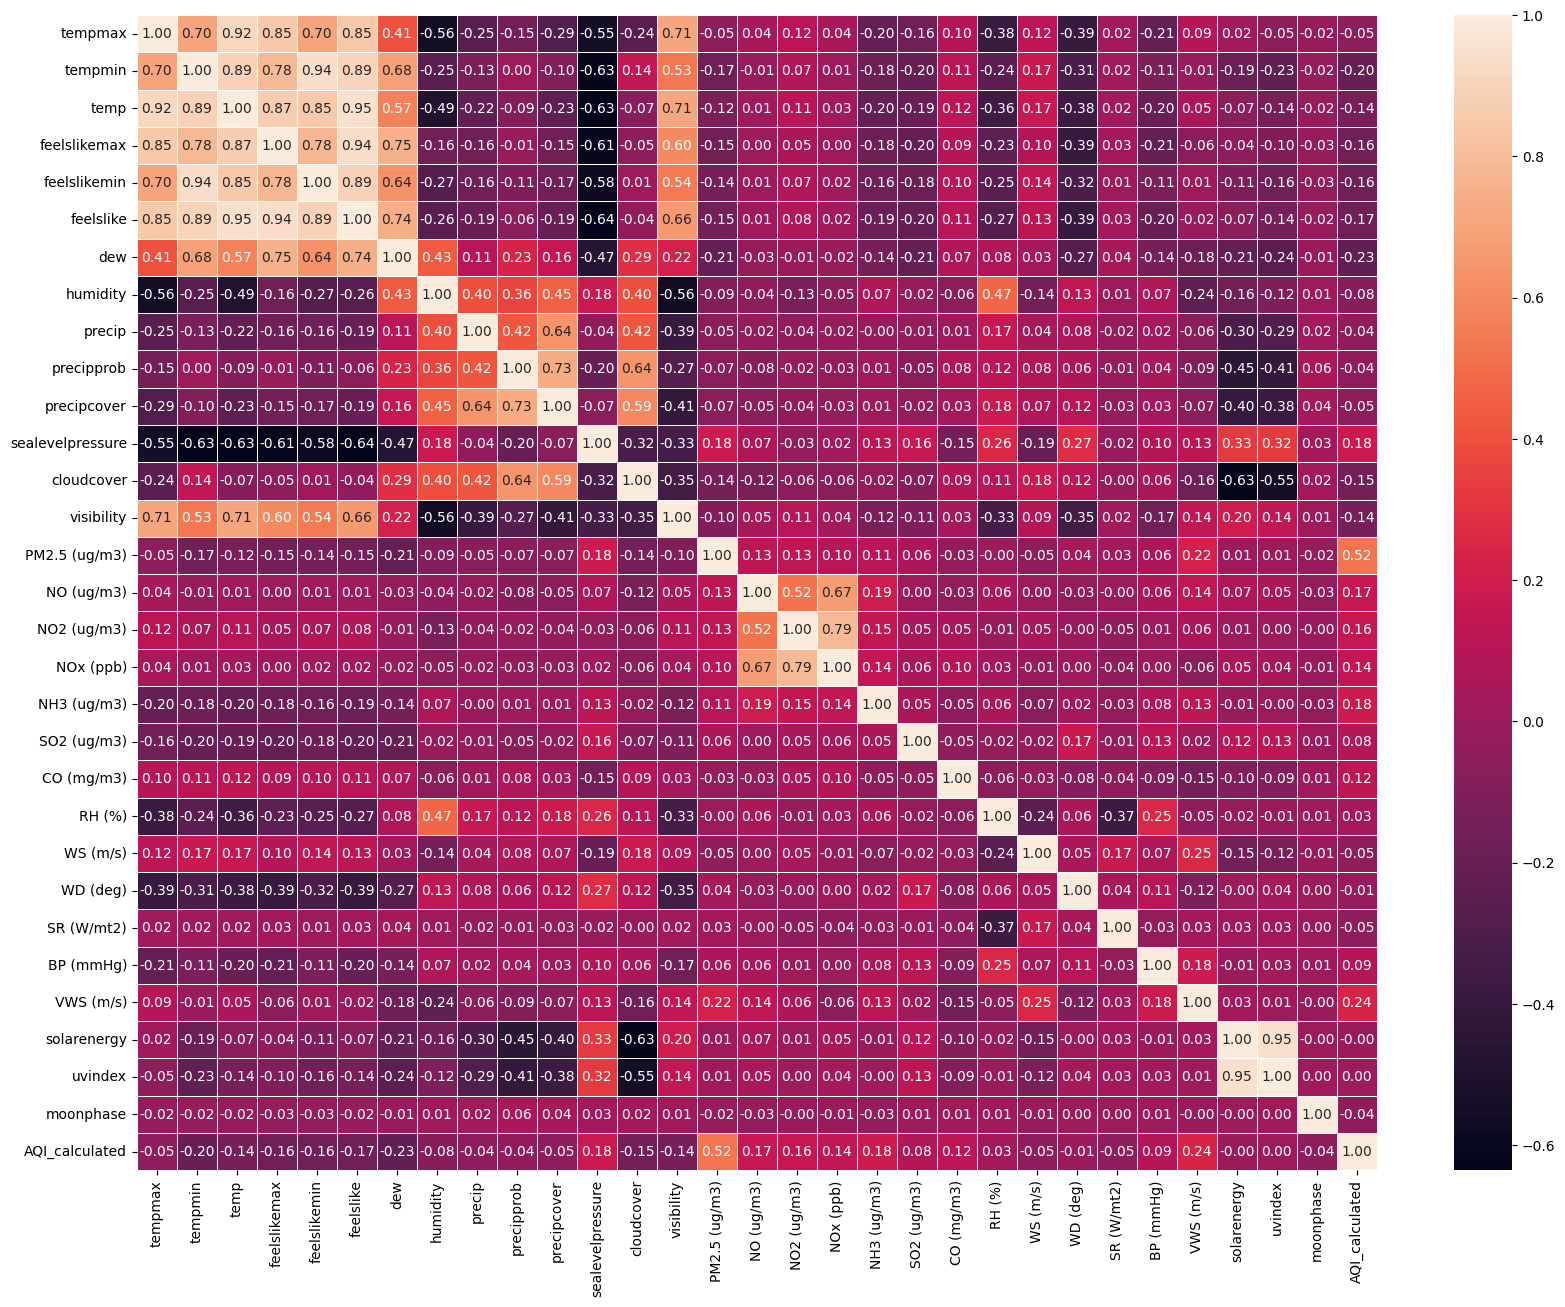

In [ ]:
plt.figure(figsize=(20, 15))
sns.heatmap(m_var.corr(), annot=True, fmt=".2f", linewidths=.5)

# Show the plot
plt.show()

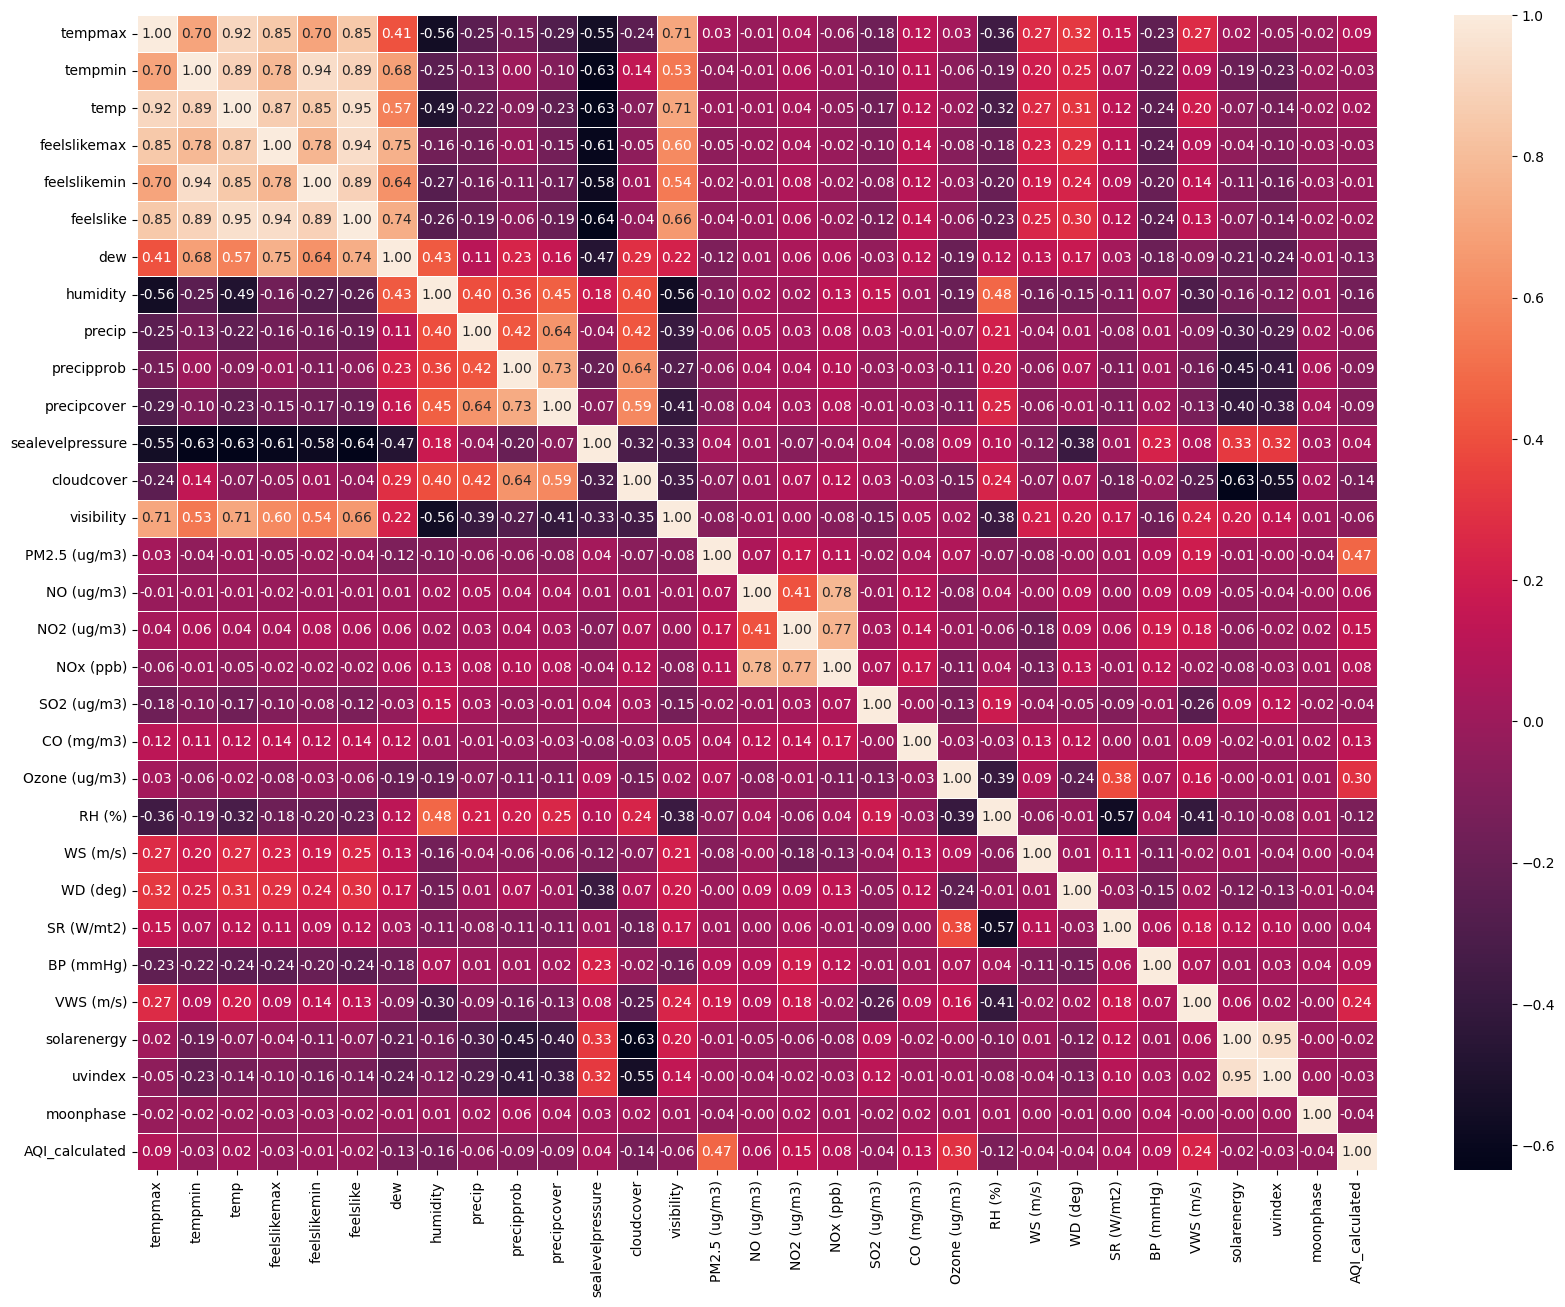

In [ ]:
plt.figure(figsize=(20, 15))
sns.heatmap(v_var.corr(), annot=True, fmt=".2f", linewidths=.5)

# Show the plot
plt.show()

In [ ]:
def print_correlation_above_threshold(df1, df2, target_column, threshold):
    # Extract the subset of the DataFrames
    subset_df1 = df1[[target_column] + list(df1.columns.difference([target_column]))]
    subset_df2 = df2[[target_column] + list(df2.columns.difference([target_column]))]

    # Calculate the correlation matrices
    correlation_matrix1 = subset_df1.corr()
    correlation_matrix2 = subset_df2.corr()

    # Access the correlation coefficients between the target column and other columns
    correlation_values1 = correlation_matrix1.loc[target_column, list(correlation_matrix1.columns != target_column)]
    correlation_values2 = correlation_matrix2.loc[target_column, list(correlation_matrix2.columns != target_column)]

    # Filter based on the threshold value
    correlated_columns1 = correlation_values1[abs(correlation_values1) > threshold].index
    correlated_columns2 = correlation_values2[abs(correlation_values2) > threshold].index

    # Print the results
    print(f"Columns correlated with {target_column} in m_var above the threshold {threshold}:")
    print(correlation_values1[correlated_columns1])

    print(f"\nColumns correlated with {target_column} in v_var above the threshold {threshold}:")
    print(correlation_values2[correlated_columns2])

target_column = 'AQI_calculated'
threshold = 0.125
print_correlation_above_threshold(m_var, v_var, target_column, threshold)

Columns correlated with AQI_calculated in m_var above the threshold 0.125:
NH3 (ug/m3)         0.182608
NO (ug/m3)          0.166527
NO2 (ug/m3)         0.155087
NOx (ppb)           0.140735
PM2.5 (ug/m3)       0.524784
VWS (m/s)           0.236966
cloudcover         -0.149715
dew                -0.225360
feelslike          -0.165627
feelslikemax       -0.158750
feelslikemin       -0.161810
sealevelpressure    0.180285
temp               -0.139251
tempmin            -0.199559
visibility         -0.138077
Name: AQI_calculated, dtype: float64

Columns correlated with AQI_calculated in v_var above the threshold 0.125:
CO (mg/m3)       0.128008
NO2 (ug/m3)      0.145415
Ozone (ug/m3)    0.295195
PM2.5 (ug/m3)    0.471102
VWS (m/s)        0.236887
cloudcover      -0.138098
dew             -0.134384
humidity        -0.155500
Name: AQI_calculated, dtype: float64


In [ ]:
def print_correlation_above_threshold(df1, df2, target_column, threshold):
    # Extract the subset of the DataFrames
    subset_df1 = df1[[target_column] + list(df1.columns.difference([target_column]))]
    subset_df2 = df2[[target_column] + list(df2.columns.difference([target_column]))]

    # Calculate the correlation matrices
    correlation_matrix1 = subset_df1.corr()
    correlation_matrix2 = subset_df2.corr()

    # Access the correlation coefficients between the target column and other columns
    correlation_values1 = correlation_matrix1.loc[target_column, list(correlation_matrix1.columns != target_column)]
    correlation_values2 = correlation_matrix2.loc[target_column, list(correlation_matrix2.columns != target_column)]

    # Filter based on the threshold value
    correlated_columns1 = correlation_values1[abs(correlation_values1) > threshold].to_dict()
    correlated_columns2 = correlation_values2[abs(correlation_values2) > threshold].to_dict()

    # Return the results as dictionaries
    result = {
        f"Columns correlated with {target_column} in m_var above the threshold {threshold}": correlated_columns1,
        f"Columns correlated with {target_column} in v_var above the threshold {threshold}": correlated_columns2
    }
    return result

target_column = 'AQI_calculated'
threshold = 0.125
correlated_columns = print_correlation_above_threshold(m_var, v_var, target_column, threshold)

# Accessing correlated columns for m_var
correlated_columns_m_var = correlated_columns[f"Columns correlated with {target_column} in m_var above the threshold {threshold}"]
print("Correlated columns for m_var:")
for column, correlation_score in correlated_columns_m_var.items():
    print(f"{column}: {correlation_score}")

# Accessing correlated columns for v_var
correlated_columns_v_var = correlated_columns[f"Columns correlated with {target_column} in v_var above the threshold {threshold}"]
print("\nCorrelated columns for v_var:")
for column, correlation_score in correlated_columns_v_var.items():
    print(f"{column}: {correlation_score}")



Correlated columns for m_var:
NH3 (ug/m3): 0.18260782417179883
NO (ug/m3): 0.1665273859902681
NO2 (ug/m3): 0.15508719801584145
NOx (ppb): 0.14073540357345002
PM2.5 (ug/m3): 0.5247844233171083
VWS (m/s): 0.23696550806061448
cloudcover: -0.1497152576037528
dew: -0.22535969389591332
feelslike: -0.16562661747868154
feelslikemax: -0.15874982260266973
feelslikemin: -0.1618099426264758
sealevelpressure: 0.1802853174499412
temp: -0.1392505622755929
tempmin: -0.19955930729892832
visibility: -0.1380766289101167

Correlated columns for v_var:
CO (mg/m3): 0.12800793916956146
NO2 (ug/m3): 0.14541498998372063
Ozone (ug/m3): 0.295195022301329
PM2.5 (ug/m3): 0.4711015794203824
VWS (m/s): 0.23688710975921304
cloudcover: -0.1380976117998129
dew: -0.13438375218721574
humidity: -0.1554997510444685


In [ ]:
merged_df_manali['IsBusinessDay'].value_counts()

True     32880
False    13104
Name: IsBusinessDay, dtype: int64

In [ ]:
merged_df_manali['month'].value_counts()

1     4464
3     4464
2     4056
5     3720
7     3720
8     3720
10    3720
12    3720
4     3600
6     3600
9     3600
11    3600
Name: month, dtype: int64

In [ ]:
merged_df_manali['DayOfWeek'].value_counts()

0    6576
1    6576
2    6576
3    6576
4    6576
5    6552
6    6552
Name: DayOfWeek, dtype: int64

In [ ]:
merged_df_manali['Year'].value_counts()

2020    8784
2018    8760
2019    8760
2021    8760
2022    8760
2023    2160
Name: Year, dtype: int64

In [ ]:
weather_csv['uvindex'].value_counts()

9     410
8     384
10    351
7     210
6     182
5     173
4     133
3      60
2      10
1       2
0       1
Name: uvindex, dtype: int64

In [ ]:
weather_csv['conditions'].value_counts()

Partially cloudy          1288
Rain, Partially cloudy     522
Rain, Overcast              65
Clear                       39
Overcast                     2
Name: conditions, dtype: int64

In [ ]:
weather_csv['description'].value_counts()

Partly cloudy throughout the day.                                             1269
Partly cloudy throughout the day with early morning rain.                      117
Partly cloudy throughout the day with rain.                                    112
Partly cloudy throughout the day with late afternoon rain.                      94
Partly cloudy throughout the day with afternoon rain.                           58
Partly cloudy throughout the day with rain clearing later.                      49
Partly cloudy throughout the day with morning rain.                             43
Clear conditions throughout the day.                                            39
Cloudy skies throughout the day with a chance of rain throughout the day.       28
Partly cloudy throughout the day with a chance of rain throughout the day.      28
Cloudy skies throughout the day with rain.                                      19
Partly cloudy throughout the day with rain in the morning and afternoon.        15
Beco

In [ ]:
merged_df_velachery.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 45984 entries, 2018-01-01 00:00:00 to 2023-03-31 23:00:00
Data columns (total 56 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   PM2.5 (ug/m3)           45984 non-null  float64       
 1   NO (ug/m3)              45984 non-null  float64       
 2   NO2 (ug/m3)             45984 non-null  float64       
 3   NOx (ppb)               45984 non-null  float64       
 4   SO2 (ug/m3)             45984 non-null  float64       
 5   CO (mg/m3)              45984 non-null  float64       
 6   Ozone (ug/m3)           45984 non-null  float64       
 7   RH (%)                  45984 non-null  float64       
 8   WS (m/s)                45984 non-null  float64       
 9   WD (deg)                45984 non-null  float64       
 10  SR (W/mt2)              45984 non-null  float64       
 11  BP (mmHg)               45984 non-null  float64       
 12  VWS (m/s)  

In [ ]:
merged_df_manali = merged_df_manali.reset_index(drop=False)
merged_df_velachery = merged_df_velachery.reset_index(drop=False)

# Model Building and Prediction

## Machine learning model

In [ ]:
ml_var_manali = merged_df_manali[list(correlated_columns_m_var.keys()) + ['AQI_calculated', 'IsBusinessDay', 'DayOfWeek', 'Year', 'conditions', 'month']]
ml_var_velachery = merged_df_velachery[list(correlated_columns_v_var.keys()) + ['AQI_calculated', 'IsBusinessDay', 'DayOfWeek','Year', 'conditions', 'month']]

In [ ]:
X_m = ml_var_manali.drop('AQI_calculated', axis = 'columns')
y_m = ml_var_manali['AQI_calculated']

In [ ]:
X_v = ml_var_velachery.drop('AQI_calculated', axis = 'columns')
y_v = ml_var_velachery['AQI_calculated']

In [ ]:
X_m.head()

NH3 (ug/m3)  NO (ug/m3)  NO2 (ug/m3)  NOx (ppb)  PM2.5 (ug/m3)  VWS (m/s)  \
0       352.50       12.39        10.46      13.00          66.56       0.22   
1       199.36       16.13         8.20      14.66          88.01       0.23   
2       355.80       15.25         2.66      11.22          75.69       0.23   
3        92.02       14.49         0.76       9.47          55.88       0.22   
4       152.52       12.76         1.93       8.95          50.68       0.21   

   cloudcover   dew  feelslike  feelslikemax  feelslikemin  sealevelpressure  \
0        50.9  22.0       27.4          32.6          23.0            1009.6   
1        50.9  22.0       27.4          32.6          23.0            1009.6   
2        50.9  22.0       27.4          32.6          23.0            1009.6   
3        50.9  22.0       27.4          32.6          23.0            1009.6   
4        50.9  22.0       27.4          32.6          23.0            1009.6   

   temp  tempmin  visibility  IsBusinessDay  DayOfWeek  Year  \
0  26.3     23.0         5.3           True          0  2018   
1  26.3     23.0         5.3           True          0  2018   
2  26.3     23.0         5.3           True          0  2018   
3  26.3     23.0         5.3           True          0  2018   
4  26.3     23.0         5.3           True          0  2018   

         conditions  month  
0  Partially cloudy      1  
1  Partially cloudy      1  
2  Partially cloudy      1  
3  Partially cloudy      1  
4  Partially cloudy      1

In [ ]:
X_m.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45984 entries, 0 to 45983
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   NH3 (ug/m3)       45984 non-null  float64
 1   NO (ug/m3)        45984 non-null  float64
 2   NO2 (ug/m3)       45984 non-null  float64
 3   NOx (ppb)         45984 non-null  float64
 4   PM2.5 (ug/m3)     45984 non-null  float64
 5   VWS (m/s)         45984 non-null  float64
 6   cloudcover        45984 non-null  float64
 7   dew               45984 non-null  float64
 8   feelslike         45984 non-null  float64
 9   feelslikemax      45984 non-null  float64
 10  feelslikemin      45984 non-null  float64
 11  sealevelpressure  45984 non-null  float64
 12  temp              45984 non-null  float64
 13  tempmin           45984 non-null  float64
 14  visibility        45984 non-null  float64
 15  IsBusinessDay     45984 non-null  bool   
 16  DayOfWeek         45984 non-null  int64 

In [ ]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder

def encode_categorical_columns(X_m, X_v, categorical_cols_m, categorical_cols_v):
    # Convert categorical columns to object type
    X_m[categorical_cols_m] = X_m[categorical_cols_m].astype(str)
    X_v[categorical_cols_v] = X_v[categorical_cols_v].astype(str)

    # Initialize separate OneHotEncoders for X_m and X_v
    encoder_m = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
    encoder_v = OneHotEncoder(sparse_output=False, handle_unknown='ignore')

    encoded_m = encoder_m.fit_transform(X_m[categorical_cols_m])
    encoded_v = encoder_v.fit_transform(X_v[categorical_cols_v])

    # OneHotEncoder returns a NumPy array, so we need to create DataFrames with appropriate column names
    encoded_m_cols = encoder_m.get_feature_names_out(input_features=categorical_cols_m)
    encoded_v_cols = encoder_v.get_feature_names_out(input_features=categorical_cols_v)

    # Create DataFrames for the encoded columns
    encoded_m_df = pd.DataFrame(encoded_m, columns=encoded_m_cols)
    encoded_v_df = pd.DataFrame(encoded_v, columns=encoded_v_cols)

    # Drop the original categorical columns from both dataframes
    X_m_encoded = X_m.drop(categorical_cols_m, axis=1)
    X_v_encoded = X_v.drop(categorical_cols_v, axis=1)

    # Concatenate the one-hot encoded columns with the original DataFrames for both dataframes
    X_m_encoded = pd.concat([X_m_encoded, encoded_m_df], axis=1)
    X_v_encoded = pd.concat([X_v_encoded, encoded_v_df], axis=1)

    return X_m_encoded, X_v_encoded

# Define categorical columns for X_m and X_v separately
categorical_cols_m = ['IsBusinessDay', 'DayOfWeek', 'Year', 'conditions', 'month']
categorical_cols_v = ['IsBusinessDay', 'DayOfWeek', 'Year', 'conditions', 'month']

# Pass the categorical columns for X_m and X_v separately
X_m_encoded, X_v_encoded = encode_categorical_columns(X_m, X_v, categorical_cols_m, categorical_cols_v)


In [ ]:
X_m_encoded.head()

NH3 (ug/m3)  NO (ug/m3)  NO2 (ug/m3)  NOx (ppb)  PM2.5 (ug/m3)  VWS (m/s)  \
0       352.50       12.39        10.46      13.00          66.56       0.22   
1       199.36       16.13         8.20      14.66          88.01       0.23   
2       355.80       15.25         2.66      11.22          75.69       0.23   
3        92.02       14.49         0.76       9.47          55.88       0.22   
4       152.52       12.76         1.93       8.95          50.68       0.21   

   cloudcover   dew  feelslike  feelslikemax  ...  month_11  month_12  \
0        50.9  22.0       27.4          32.6  ...       0.0       0.0   
1        50.9  22.0       27.4          32.6  ...       0.0       0.0   
2        50.9  22.0       27.4          32.6  ...       0.0       0.0   
3        50.9  22.0       27.4          32.6  ...       0.0       0.0   
4        50.9  22.0       27.4          32.6  ...       0.0       0.0   

   month_2  month_3  month_4  month_5  month_6  month_7  month_8  month_9  
0      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0  
1      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0  
2      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0  
3      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0  
4      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0  

[5 rows x 47 columns]

In [ ]:
X_v_encoded.head()

CO (mg/m3)  NO2 (ug/m3)  Ozone (ug/m3)  PM2.5 (ug/m3)  VWS (m/s)  \
0         0.0        12.64          27.01          71.60       0.14   
1         0.0        12.77          26.30          70.13       0.15   
2         0.0        12.57          30.49          73.47       0.15   
3         0.0        12.86          25.72          76.60       0.17   
4         0.0        12.38          32.28          78.37       0.17   

   cloudcover   dew  humidity  IsBusinessDay_False  IsBusinessDay_True  ...  \
0        50.9  22.0      78.3                  0.0                 1.0  ...   
1        50.9  22.0      78.3                  0.0                 1.0  ...   
2        50.9  22.0      78.3                  0.0                 1.0  ...   
3        50.9  22.0      78.3                  0.0                 1.0  ...   
4        50.9  22.0      78.3                  0.0                 1.0  ...   

   month_11  month_12  month_2  month_3  month_4  month_5  month_6  month_7  \
0       0.0       0.0      0.0      0.0      0.0      0.0      0.0      0.0   
1       0.0       0.0      0.0      0.0      0.0      0.0      0.0      0.0   
2       0.0       0.0      0.0      0.0      0.0      0.0      0.0      0.0   
3       0.0       0.0      0.0      0.0      0.0      0.0      0.0      0.0   
4       0.0       0.0      0.0      0.0      0.0      0.0      0.0      0.0   

   month_8  month_9  
0      0.0      0.0  
1      0.0      0.0  
2      0.0      0.0  
3      0.0      0.0  
4      0.0      0.0  

[5 rows x 40 columns]

### Train test split

In [ ]:
X_m_train, X_m_test, y_m_train, y_m_test = train_test_split(X_m_encoded, y_m, test_size=0.2, random_state=42)
X_v_train, X_v_test, y_v_train, y_v_test = train_test_split(X_v_encoded, y_v, test_size=0.2, random_state=42)

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [ ]:
def test_regression_models(X_train, X_test, y_train, y_test):
    # Scale the features
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Define a list of regression models
    models = [
        LinearRegression(),
        Ridge(),
        Lasso(),
        ElasticNet(),
        DecisionTreeRegressor(),
        RandomForestRegressor(),
        GradientBoostingRegressor(),
        AdaBoostRegressor(),
        XGBRegressor(device ='cuda'),
    ]

    # List to store model performance
    results = []

    # Iterate through each model
    for model in models:
        model_name = model.__class__.__name__
        model.fit(X_train_scaled, y_train)
        y_pred = model.predict(X_test_scaled)

        # Calculate metrics
        mse = mean_squared_error(y_test, y_pred)
        mae = mean_absolute_error(y_test, y_pred)
        rmse = mean_squared_error(y_test, y_pred, squared=False)  # Calculate RMSE by setting squared=False
        r2 = r2_score(y_test, y_pred)

        # Append results
        results.append({'Model': model_name, 'MSE': mse, 'MAE': mae, 'RMSE': rmse, 'R-squared': r2})

    # Create a DataFrame from the list of results
    results_df = pd.concat([pd.DataFrame([result]) for result in results], ignore_index=True)

    return results_df

print("--------------------Manali_AQI results------------------------------")
manali_results = test_regression_models(X_m_train, X_m_test, y_m_train, y_m_test)
print(manali_results)
print("--------------------Velachery_AQI results------------------------------")
velachery_results = test_regression_models(X_v_train, X_v_test, y_v_train, y_v_test)
print(velachery_results)


--------------------Manali_AQI results------------------------------


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:15:07] WARNING: /workspace/src/context.cc:44: No visible GPU is found, setting device to CPU.
  warnings.warn(smsg, UserWarning)


                       Model          MSE        MAE       RMSE  R-squared
0           LinearRegression  2067.158234  31.778779  45.466012   0.434465
1                      Ridge  2067.146909  31.778837  45.465887   0.434468
2                      Lasso  2137.786036  32.278235  46.236198   0.415142
3                 ElasticNet  2229.697779  32.623690  47.219676   0.389997
4      DecisionTreeRegressor   931.586931  15.301838  30.521909   0.745135
5      RandomForestRegressor   506.942389  13.076643  22.515381   0.861310
6  GradientBoostingRegressor  1328.168632  24.392366  36.444048   0.636638
7          AdaBoostRegressor  4177.014554  56.833342  64.629827  -0.142752
8               XGBRegressor   512.651109  15.023963  22.641800   0.859748
--------------------Velachery_AQI results------------------------------


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:16:14] WARNING: /workspace/src/context.cc:44: No visible GPU is found, setting device to CPU.
  warnings.warn(smsg, UserWarning)


                       Model          MSE        MAE       RMSE  R-squared
0           LinearRegression   888.679647  16.121421  29.810730   0.352138
1                      Ridge   888.677143  16.121286  29.810688   0.352139
2                      Lasso   905.239493  16.104391  30.087198   0.340065
3                 ElasticNet   942.385769  16.538339  30.698302   0.312985
4      DecisionTreeRegressor   633.214418  10.350658  25.163752   0.538376
5      RandomForestRegressor   325.943877   8.668461  18.053916   0.762381
6  GradientBoostingRegressor   625.429727  13.473197  25.008593   0.544051
7          AdaBoostRegressor  1606.967535  32.088441  40.087000  -0.171506
8               XGBRegressor   285.031872   9.524972  16.882887   0.792207


In [ ]:
manali_results

Model          MSE        MAE       RMSE  R-squared
0           LinearRegression  2067.158234  31.778779  45.466012   0.434465
1                      Ridge  2067.146909  31.778837  45.465887   0.434468
2                      Lasso  2137.786036  32.278235  46.236198   0.415142
3                 ElasticNet  2229.697779  32.623690  47.219676   0.389997
4      DecisionTreeRegressor   931.586931  15.301838  30.521909   0.745135
5      RandomForestRegressor   506.942389  13.076643  22.515381   0.861310
6  GradientBoostingRegressor  1328.168632  24.392366  36.444048   0.636638
7          AdaBoostRegressor  4177.014554  56.833342  64.629827  -0.142752
8               XGBRegressor   512.651109  15.023963  22.641800   0.859748

### Kfold cross validation

In [ ]:
X_m_test.reset_index(drop=True, inplace=True)
y_m_test.reset_index(drop=True, inplace=True)
X_v_test.reset_index(drop=True, inplace=True)
y_v_test.reset_index(drop=True, inplace=True)
X_m_train.reset_index(drop=True, inplace=True)
y_m_train.reset_index(drop=True, inplace=True)
X_v_train.reset_index(drop=True, inplace=True)
y_v_train.reset_index(drop=True, inplace=True)



In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from xgboost import XGBRegressor
import numpy as np
import pandas as pd

def test_regression_models_kfold(X_train, X_test, y_train, y_test, n_splits=5):
    # Scale the features
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Define a list of regression models
    models = [
        LinearRegression(),
        Ridge(),
        Lasso(),
        ElasticNet(),
        DecisionTreeRegressor(),
        RandomForestRegressor(),
        GradientBoostingRegressor(),
        AdaBoostRegressor(),
        XGBRegressor(device ='cuda'),
    ]

    # List to store model performance
    results_train = []
    results_test = []

    # K-fold cross-validation on the training data
    kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)
    for train_index, val_index in kf.split(X_train_scaled):
        X_train_cv, X_val = X_train_scaled[train_index], X_train_scaled[val_index]
        y_train_cv, y_val = y_train[train_index], y_train[val_index]

        # Iterate through each model
        for model in models:
            model_name = model.__class__.__name__
            # Train the model on the training data
            model.fit(X_train_cv, y_train_cv)

            # Evaluate the model on the validation data
            y_pred_val = model.predict(X_val)
            mse_val = mean_squared_error(y_val, y_pred_val)
            r2_val = r2_score(y_val, y_pred_val)
            rmse_val = mean_squared_error(y_val, y_pred_val, squared = False)
            mae_val = mean_absolute_error(y_val, y_pred_val)
            results_train.append({'Model': model_name, 'Data': 'Validation','MSE': mse_val,  'MAE': mae_val, 'RMSE': rmse_val, 'R-squared': r2_val})

    # Evaluate models on the test data
    for model in models:
        model_name = model.__class__.__name__
        # Train the model on the entire training data
        model.fit(X_train_scaled, y_train)

        # Evaluate the model on the test data
        y_pred_test = model.predict(X_test_scaled)
        mse_test = mean_squared_error(y_test, y_pred_test)
        r2_test = r2_score(y_test, y_pred_test)
        rmse_test = mean_squared_error(y_test, y_pred_test, squared = False)
        mae_test = mean_absolute_error(y_test, y_pred_test)
        results_test.append({'Model': model_name, 'Data': 'Test', 'MSE': mse_test, 'MAE': mae_test, 'RMSE': rmse_test, 'R-squared': r2_test})

    # Create DataFrames from the lists of results
    results_train_df = pd.DataFrame(results_train)
    results_test_df = pd.DataFrame(results_test)

    # Print results for training data
    print("Results for Training Data:")
    print(results_train_df)
    print("\n")

    # Print results for test data
    print("Results for Test Data:")
    print(results_test_df)
    print("\n")

    return results_train_df, results_test_df

print('---------------------------Manali_AQI results----------------------------')
results_train_manali, results_test_manali = test_regression_models_kfold(X_m_train, X_m_test, y_m_train, y_m_test)
print('---------------------------Velachery_AQI results----------------------------')
results_train_velachery, results_test_velachery = test_regression_models_kfold(X_v_train, X_v_test, y_v_train, y_v_test)




---------------------------Manali_AQI results----------------------------


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:17:25] WARNING: /workspace/src/context.cc:44: No visible GPU is found, setting device to CPU.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:18:35] WARNING: /workspace/src/context.cc:44: No visible GPU is found, setting device to CPU.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:19:43] WARNING: /workspace/src/context.cc:44: No visible GPU is found, setting device to CPU.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:20:52] WARNING: /workspace/src/context.cc:44: No visible GPU is found, setting device to CPU.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:22:06] WARNING: /workspace/src/context.cc:44: No visible GPU is found, setting device to CPU.


Results for Training Data:
                        Model        Data          MSE        MAE       RMSE  \
0            LinearRegression  Validation  2093.053014  31.978042  45.749896   
1                       Ridge  Validation  2093.010111  31.980001  45.749427   
2                       Lasso  Validation  2144.417997  32.305692  46.307861   
3                  ElasticNet  Validation  2230.685497  32.530512  47.230133   
4       DecisionTreeRegressor  Validation  1086.749388  16.795868  32.965882   
5       RandomForestRegressor  Validation   559.680463  14.151708  23.657567   
6   GradientBoostingRegressor  Validation  1398.706697  25.222807  37.399287   
7           AdaBoostRegressor  Validation  3503.744058  50.767807  59.192432   
8                XGBRegressor  Validation   531.724739  15.405555  23.059157   
9            LinearRegression  Validation  2020.917691  31.657644  44.954618   
10                      Ridge  Validation  2020.904126  31.658668  44.954467   
11           

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:24:26] WARNING: /workspace/src/context.cc:44: No visible GPU is found, setting device to CPU.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:25:17] WARNING: /workspace/src/context.cc:44: No visible GPU is found, setting device to CPU.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:26:09] WARNING: /workspace/src/context.cc:44: No visible GPU is found, setting device to CPU.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:27:02] WARNING: /workspace/src/context.cc:44: No visible GPU is found, setting device to CPU.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:27:54] WARNING: /workspace/src/context.cc:44: No visible GPU is found, setting device to CPU.


Results for Training Data:
                        Model        Data          MSE        MAE       RMSE  \
0            LinearRegression  Validation   976.921558  16.416705  31.255744   
1                       Ridge  Validation   977.003485  16.485638  31.257055   
2                       Lasso  Validation  1002.113355  16.470977  31.656174   
3                  ElasticNet  Validation  1026.741596  16.908482  32.042809   
4       DecisionTreeRegressor  Validation   766.930959  11.466431  27.693518   
5       RandomForestRegressor  Validation   406.096507   9.442198  20.151836   
6   GradientBoostingRegressor  Validation   739.714677  13.945036  27.197696   
7           AdaBoostRegressor  Validation  1123.639088  23.726541  33.520726   
8                XGBRegressor  Validation   303.630489   9.664486  17.424996   
9            LinearRegression  Validation   947.591614  16.503959  30.782976   
10                      Ridge  Validation   947.572646  16.506217  30.782668   
11           

In [ ]:
# Define a function to calculate the average performance metrics
def calculate_average_results(results_df):
    # Group results by Model and Data (Train/Test), and calculate the mean
    avg_results = results_df.groupby(['Model', 'Data']).mean().reset_index()
    return avg_results

# Calculate average results for Manali_AQI
avg_results_train_manali = calculate_average_results(results_train_manali)

# Calculate average results for Velachery_AQI
avg_results_train_velachery = calculate_average_results(results_train_velachery)

# Print average results for Manali_AQI
print('Average Results for Manali_AQI Training Data:')
print(avg_results_train_manali)
print('\n Results for Manali_AQI Test Data:')
print(results_test_manali)

Average Results for Manali_AQI Training Data:
                       Model        Data          MSE        MAE       RMSE  \
0          AdaBoostRegressor  Validation  3263.959039  48.159423  56.784141   
1      DecisionTreeRegressor  Validation  1030.533246  16.448869  32.085699   
2                 ElasticNet  Validation  2116.102412  32.067666  45.992655   
3  GradientBoostingRegressor  Validation  1299.251706  24.430978  36.035721   
4                      Lasso  Validation  2028.401623  31.782540  45.029693   
5           LinearRegression  Validation  1966.603976  31.386348  44.336450   
6      RandomForestRegressor  Validation   530.946591  13.789366  23.038121   
7                      Ridge  Validation  1966.604765  31.383411  44.336464   
8               XGBRegressor  Validation   512.687145  15.223669  22.641520   

   R-squared  
0   0.060088  
1   0.703916  
2   0.392429  
3   0.626980  
4   0.417598  
5   0.435381  
6   0.847446  
7   0.435381  
8   0.852702  

 Results for

In [ ]:
avg_results_train_manali

Model        Data          MSE        MAE       RMSE  \
0          AdaBoostRegressor  Validation  3263.959039  48.159423  56.784141   
1      DecisionTreeRegressor  Validation  1030.533246  16.448869  32.085699   
2                 ElasticNet  Validation  2116.102412  32.067666  45.992655   
3  GradientBoostingRegressor  Validation  1299.251706  24.430978  36.035721   
4                      Lasso  Validation  2028.401623  31.782540  45.029693   
5           LinearRegression  Validation  1966.603976  31.386348  44.336450   
6      RandomForestRegressor  Validation   530.946591  13.789366  23.038121   
7                      Ridge  Validation  1966.604765  31.383411  44.336464   
8               XGBRegressor  Validation   512.687145  15.223669  22.641520   

   R-squared  
0   0.060088  
1   0.703916  
2   0.392429  
3   0.626980  
4   0.417598  
5   0.435381  
6   0.847446  
7   0.435381  
8   0.852702

In [ ]:
# Print average results for Velachery_AQI
print('Average Results for Velachery_AQI Training Data:')
print(avg_results_train_velachery)
print('\n Results for Velachery_AQI Test Data:')
print(results_test_velachery)

Average Results for Velachery_AQI Training Data:
                       Model        Data          MSE        MAE       RMSE  \
0          AdaBoostRegressor  Validation  1170.145800  25.278052  34.079654   
1      DecisionTreeRegressor  Validation   750.033406  11.352780  27.350843   
2                 ElasticNet  Validation   952.435672  16.688382  30.844351   
3  GradientBoostingRegressor  Validation   642.124889  13.638729  25.313280   
4                      Lasso  Validation   921.532199  16.195137  30.340731   
5           LinearRegression  Validation   904.731914  16.255880  30.064852   
6      RandomForestRegressor  Validation   363.810822   9.275184  19.056425   
7                      Ridge  Validation   904.612419  16.248265  30.062805   
8               XGBRegressor  Validation   292.796840   9.659489  17.097587   

   R-squared  
0   0.155905  
1   0.462136  
2   0.317374  
3   0.539682  
4   0.339388  
5   0.351285  
6   0.738844  
7   0.351377  
8   0.789822  

 Results 

# Hyper Parameter Tuning

## Manali AQI

In [ ]:
import xgboost as xgb
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.model_selection import GridSearchCV

# Define scorers
scorers = {
    'r2': 'r2',
    'neg_rmse': 'neg_root_mean_squared_error',
    'neg_mae': 'neg_mean_absolute_error'
}

# Hyperparameter tuning for Random Forest
rf_param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 5],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2, 3]
}
rf_model = RandomForestRegressor()
rf_grid_search = GridSearchCV(rf_model, rf_param_grid, cv=2, scoring=scorers, refit='r2', n_jobs=-1)
rf_grid_search.fit(X_m_train, y_m_train)

print("Best parameters for Random Forest:")
print(rf_grid_search.best_params_)
print("Best R2 score for Random Forest:", rf_grid_search.best_score_)
print("RMSE for Random Forest:", -rf_grid_search.cv_results_['mean_test_neg_rmse'][rf_grid_search.best_index_])
print("MAE for Random Forest:", -rf_grid_search.cv_results_['mean_test_neg_mae'][rf_grid_search.best_index_])

# Evaluate Random Forest on testing data
rf_best_model = rf_grid_search.best_estimator_
rf_test_predictions = rf_best_model.predict(X_m_test)
rf_r2 = r2_score(y_m_test, rf_test_predictions)
rf_rmse = mean_squared_error(y_m_test, rf_test_predictions, squared=False)
rf_mae = mean_absolute_error(y_m_test, rf_test_predictions)
print("R2 score on testing data for Random Forest:", rf_r2)
print("RMSE on testing data for Random Forest:", rf_rmse)
print("MAE on testing data for Random Forest:", rf_mae)


Best parameters for Random Forest:
{'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Best R2 score for Random Forest: 0.807500268158369
RMSE for Random Forest: 25.891294851798115
MAE for Random Forest: 15.740118413426034
R2 score on testing data for Random Forest: 0.8615546052572882
RMSE on testing data for Random Forest: 22.49552889449399
MAE on testing data for Random Forest: 13.071512993367403


In [ ]:
# Hyperparameter tuning for Decision Tree
dt_param_grid = {
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
dt_model = DecisionTreeRegressor()
dt_grid_search = GridSearchCV(dt_model, dt_param_grid, cv=2, scoring=scorers, refit='r2', n_jobs=-1)
dt_grid_search.fit(X_m_train, y_m_train)

print("Best parameters for Decision Tree:")
print(dt_grid_search.best_params_)
print("Best R2 score for Decision Tree:", dt_grid_search.best_score_)
print("RMSE for Decision Tree:", -dt_grid_search.cv_results_['mean_test_neg_rmse'][dt_grid_search.best_index_])
print("MAE for Decision Tree:", -dt_grid_search.cv_results_['mean_test_neg_mae'][dt_grid_search.best_index_])

# Evaluate Decision Tree on testing data
dt_best_model = dt_grid_search.best_estimator_
dt_test_predictions = dt_best_model.predict(X_m_test)
dt_r2 = r2_score(y_m_test, dt_test_predictions)
dt_rmse = mean_squared_error(y_m_test, dt_test_predictions, squared = False)
dt_mae = mean_absolute_error(y_m_test, dt_test_predictions)
print("R2 score on testing data for Decision Tree:", dt_r2)
print("RMSE on testing data for Decision Tree:", dt_rmse)
print("MAE on testing data for Decision Tree:", dt_mae)




Best parameters for Decision Tree:
{'max_depth': 20, 'min_samples_leaf': 4, 'min_samples_split': 10}
Best R2 score for Decision Tree: 0.6581484002147742
RMSE for Decision Tree: 34.50345513880228
MAE for Decision Tree: 19.835231282464903
R2 score on testing data for Decision Tree: 0.748980242015099
RMSE on testing data for Decision Tree: 30.290811241482462
MAE on testing data for Decision Tree: 16.6997754083973


In [ ]:
import xgboost as xgb
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.model_selection import GridSearchCV

# Define scorers
scorers = {
    'r2': 'r2',
    'neg_rmse': 'neg_root_mean_squared_error',
    'neg_mae': 'neg_mean_absolute_error'
}

# Hyperparameter tuning for XGBoost
xgb_param_grid = {
    'n_estimators': [100, 200, 300, 400],
    'max_depth': [5, 7, 9],
    'learning_rate': [0.05, 0.1, 0.3]
}
xgb_model_manali = xgb.XGBRegressor(device ='cuda')
xgb_grid_search = GridSearchCV(xgb_model_manali, xgb_param_grid, cv=5, scoring=scorers, refit='r2')
xgb_grid_search.fit(X_m_train, y_m_train)

print("Best parameters for XGBoost:")
print(xgb_grid_search.best_params_)
print("Best R2 score for XGBoost:", xgb_grid_search.best_score_)
print("RMSE for XGBoost:", np.sqrt(-xgb_grid_search.cv_results_['mean_test_neg_rmse'][xgb_grid_search.best_index_]))
print("MAE for XGBoost:", -xgb_grid_search.cv_results_['mean_test_neg_mae'][xgb_grid_search.best_index_])

# Evaluate XGBoost on testing data
xgb_best_model_manali = xgb_grid_search.best_estimator_
xgb_test_predictions_manali = xgb_best_model_manali.predict(X_m_test)
xgb_r2 = r2_score(y_m_test, xgb_test_predictions_manali)
xgb_rmse = np.sqrt(mean_squared_error(y_m_test, xgb_test_predictions_manali))
xgb_mae = mean_absolute_error(y_m_test, xgb_test_predictions_manali)
print("R2 score on testing data for XGBoost:", xgb_r2)
print("RMSE on testing data for XGBoost:", xgb_rmse)
print("MAE on testing data for XGBoost:", xgb_mae)


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:50:09] WARNING: /workspace/src/context.cc:44: No visible GPU is found, setting device to CPU.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:50:10] WARNING: /workspace/src/context.cc:44: No visible GPU is found, setting device to CPU.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:50:11] WARNING: /workspace/src/context.cc:44: No visible GPU is found, setting device to CPU.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:50:12] WARNING: /workspace/src/context.cc:44: No visible GPU is found, setting device to CPU.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:50:12] WARNING: /workspace/src/context.cc:44: No visible GPU is found, setting device to CPU.


Best parameters for XGBoost:
{'learning_rate': 0.1, 'max_depth': 9, 'n_estimators': 400}
Best R2 score for XGBoost: 0.878240393094082
RMSE for XGBoost: 4.537511926630962
MAE for XGBoost: 12.772726325826195
R2 score on testing data for XGBoost: 0.8874349213382222
RMSE on testing data for XGBoost: 20.28424236224482
MAE on testing data for XGBoost: 12.307202611161896


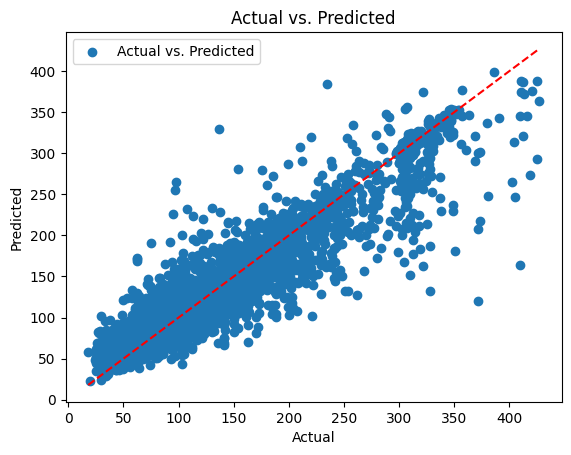

In [ ]:
# Plot actual vs predicted
plt.scatter(y_m_test, xgb_test_predictions_manali, label='Actual vs. Predicted')
plt.plot([min(y_m_test), max(y_m_test)], [min(y_m_test), max(y_m_test)], '--', color='red')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs. Predicted')
plt.legend()
plt.show()


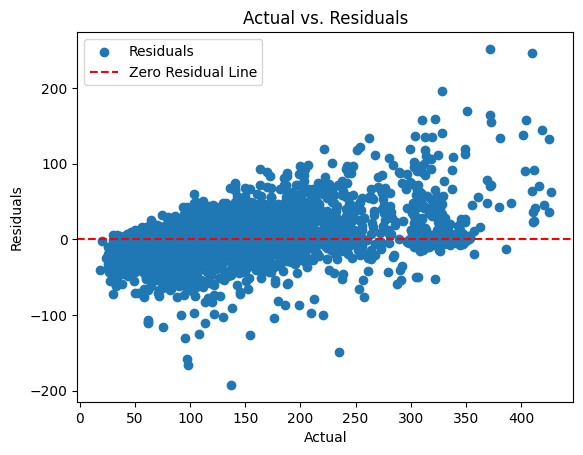

In [ ]:
# Calculate residuals
residuals = y_m_test - xgb_test_predictions_manali

# Plot actual vs predicted
plt.scatter(y_m_test, residuals, label='Residuals')
plt.axhline(y=0, color='red', linestyle='--', label='Zero Residual Line')
plt.xlabel('Actual')
plt.ylabel('Residuals')
plt.title('Actual vs. Residuals')
plt.legend()
plt.show()


## Velachery AQI

In [ ]:
# Hyperparameter tuning for Random Forest
rf_param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 5],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2, 3]
}
rf_model = RandomForestRegressor()
rf_grid_search = GridSearchCV(rf_model, rf_param_grid, cv=2, scoring=scorers, refit='r2', n_jobs=-1)
rf_grid_search.fit(X_v_train, y_v_train)

print("Best parameters for Random Forest:")
print(rf_grid_search.best_params_)
print("Best R2 score for Random Forest:", rf_grid_search.best_score_)
print("RMSE for Random Forest:", -rf_grid_search.cv_results_['mean_test_neg_rmse'][rf_grid_search.best_index_])
print("MAE for Random Forest:", -rf_grid_search.cv_results_['mean_test_neg_mae'][rf_grid_search.best_index_])

# Evaluate Random Forest on testing data
rf_best_model = rf_grid_search.best_estimator_
rf_test_predictions = rf_best_model.predict(X_v_test)
rf_r2 = r2_score(y_v_test, rf_test_predictions)
rf_rmse = mean_squared_error(y_v_test, rf_test_predictions, squared=False)
rf_mae = mean_absolute_error(y_v_test, rf_test_predictions)
print("R2 score on testing data for Random Forest:", rf_r2)
print("RMSE on testing data for Random Forest:", rf_rmse)
print("MAE on testing data for Random Forest:", rf_mae)


Best parameters for Random Forest:
{'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Best R2 score for Random Forest: 0.685326591244727
RMSE for Random Forest: 20.94779881571699
MAE for Random Forest: 10.343486962709793
R2 score on testing data for Random Forest: 0.7642178696649468
RMSE on testing data for Random Forest: 17.984015469547884
MAE on testing data for Random Forest: 8.607200717625313


In [ ]:
scorers = {
    'r2': 'r2',
    'neg_rmse': 'neg_root_mean_squared_error',
    'neg_mae': 'neg_mean_absolute_error'
}

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for Gradient Boosting Regression
gb_param_grid = {
    'n_estimators': [200, 300],
    'learning_rate': [0.05, 0.1, 0.3],
    'max_depth': [3, 7],
    'min_samples_split': [2, 5],
}

# Initialize Gradient Boosting Regression model
gb_model = GradientBoostingRegressor()

# Perform Grid Search Cross-Validation
gb_grid_search = GridSearchCV(gb_model, gb_param_grid, cv=2, scoring=scorers, refit='r2', n_jobs=-1)
gb_grid_search.fit(X_v_train, y_v_train)

# Print best parameters and scores for Gradient Boosting Regression
print("Best parameters for Gradient Boosting Regression:")
print(gb_grid_search.best_params_)
print("Best R2 score for Gradient Boosting Regression:", gb_grid_search.best_score_)
print("RMSE for Gradient Boosting Regression:", -gb_grid_search.cv_results_['mean_test_neg_rmse'][gb_grid_search.best_index_])
print("MAE for Gradient Boosting Regression:", -gb_grid_search.cv_results_['mean_test_neg_mae'][gb_grid_search.best_index_])

# Evaluate Gradient Boosting Regression on testing data
gb_best_model = gb_grid_search.best_estimator_
gb_test_predictions = gb_best_model.predict(X_v_test)
gb_r2 = r2_score(y_v_test, gb_test_predictions)
gb_rmse = mean_squared_error(y_v_test, gb_test_predictions, squared=False)
gb_mae = mean_absolute_error(y_v_test, gb_test_predictions)
print("R2 score on testing data for Gradient Boosting Regression:", gb_r2)
print("RMSE on testing data for Gradient Boosting Regression:", gb_rmse)
print("MAE on testing data for Gradient Boosting Regression:", gb_mae)


Best parameters for Gradient Boosting Regression:
{'learning_rate': 0.1, 'max_depth': 7, 'min_samples_split': 2, 'n_estimators': 300}
Best R2 score for Gradient Boosting Regression: 0.7574583301141349
RMSE for Gradient Boosting Regression: 18.38825168350741
MAE for Gradient Boosting Regression: 9.851068176766983
R2 score on testing data for Gradient Boosting Regression: 0.8124953228749037
RMSE on testing data for Gradient Boosting Regression: 16.037522417100046
MAE on testing data for Gradient Boosting Regression: 8.814397652877954


In [ ]:
# Hyperparameter tuning for XGBoost
xgb_param_grid = {
    'n_estimators': [50, 100, 200, 300, 400],
    'max_depth': [3, 5, 7, 9],
    'learning_rate': [0.01, 0.05, 0.1, 0.3]
}
xgb_model = xgb.XGBRegressor()
xgb_grid_search = GridSearchCV(xgb_model, xgb_param_grid, cv=5, scoring=scorers, refit='r2')
xgb_grid_search.fit(X_v_train, y_v_train)

print("Best parameters for XGBoost:")
print(xgb_grid_search.best_params_)
print("Best R2 score for XGBoost:", xgb_grid_search.best_score_)
print("RMSE for XGBoost:", np.sqrt(-xgb_grid_search.cv_results_['mean_test_neg_rmse'][xgb_grid_search.best_index_]))
print("MAE for XGBoost:", -xgb_grid_search.cv_results_['mean_test_neg_mae'][xgb_grid_search.best_index_])

# Evaluate XGBoost on testing data
xgb_best_model_velachery = xgb_grid_search.best_estimator_
xgb_test_predictions_velachery = xgb_best_model_velachery.predict(X_v_test)
xgb_r2 = r2_score(y_v_test, xgb_test_predictions_velachery)
xgb_rmse = np.sqrt(mean_squared_error(y_v_test, xgb_test_predictions_velachery))
xgb_mae = mean_absolute_error(y_v_test, xgb_test_predictions_velachery)
print("R2 score on testing data for XGBoost:", xgb_r2)
print("RMSE on testing data for XGBoost:", xgb_rmse)
print("MAE on testing data for XGBoost:", xgb_mae)


Best parameters for XGBoost:
{'learning_rate': 0.3, 'max_depth': 7, 'n_estimators': 400}
Best R2 score for XGBoost: 0.8294953423621323
RMSE for XGBoost: 3.925435149659653
MAE for XGBoost: 8.10846233587495
R2 score on testing data for XGBoost: 0.8521178031736337
RMSE on testing data for XGBoost: 14.242596495970497
MAE on testing data for XGBoost: 7.631929930777891


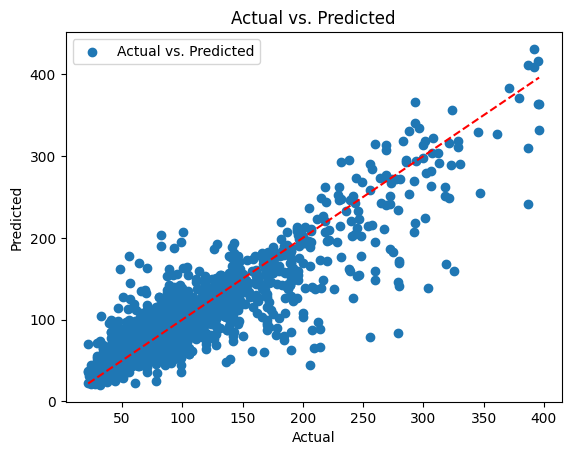

In [ ]:
# Plot actual vs predicted
plt.scatter(y_v_test, xgb_test_predictions_velachery, label='Actual vs. Predicted')
plt.plot([min(y_v_test), max(y_v_test)], [min(y_v_test), max(y_v_test)], '--', color='red')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs. Predicted')
plt.legend()
plt.show()

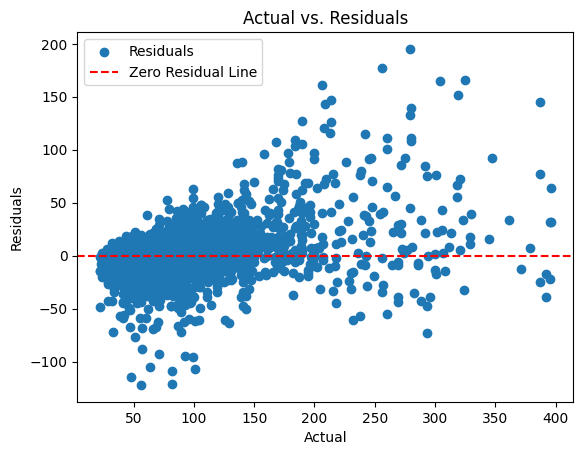

In [ ]:
# Calculate residuals
residuals = y_v_test - xgb_test_predictions_velachery

# Plot actual vs predicted
plt.scatter(y_v_test, residuals, label='Residuals')
plt.axhline(y=0, color='red', linestyle='--', label='Zero Residual Line')
plt.xlabel('Actual')
plt.ylabel('Residuals')
plt.title('Actual vs. Residuals')
plt.legend()
plt.show()